---

# <center> Ожидаемый риск неплательщика по кредиту

---

### Цель:
- Изучить набор данных и очистить его.
- Создайте модель классификации, чтобы предсказания перехода, заёмщика в дефолт по кредиту.
- Настройка гиперпараметров и сравнение показателей оценки различных алгоритмов классификации.

---

## <center> Описание столбцов

| Variable | Description |
|:------------- | :-------------|
| ID | идентификатор заявки клиента на получение кредита |
| year | год подачи заявки на получение кредита |
| loan_limit | указывает, является ли ссуда соответствующей (`cf` - соответствующая, `ncf` - несоответствующая) |
| Gender | пол заявителя (`male` - мужчина, `female` - женщина, `joint` - совместное проживание, `sex not available` - пол недоступен) |
| approv_in_adv | указывает, был ли кредит одобрен заранее (`pre` - одобрен заранее, `nopre` - не одобрен заранее) |
| loan_type | тип кредита (`type1` - жилищный кредит, `type2` - рефинансирование, `type3` - другой вид кредита) |
| loan_purpose | цель кредита (`p1` - покупка жилья, `p2` - рефинансирование, `p3` - строительство, `p4` - другие цели) |
| Credit_Worthiness | кредитоспособность (`l1` - высокая, `l2` - низкая) |
| open_credit | указывает, есть ли у заявителя открытые кредитные счета (`opc` - есть, `nopc` - нет) |
| business_or_commercial | указывает, предназначен ли заем для деловых/коммерческих целей (`ob/c` - деловой/коммерческий, `nob/c` - личный) |
| loan_amount | сумма денег, взятых взаймы |
| rate_of_interest | процентная ставка, взимаемая по кредиту |
| Interest_rate_spread | разница между процентной ставкой по кредиту и базовой процентной ставкой |
| Upfront_charges | первоначальные расходы, связанные с обеспечением кредита |
| term | срок действия кредита в месяцах |
| Neg_ammortization | указывает, допускает ли кредит отрицательную амортизацию (`neg_amm` - допускает, `not_neg` - не допускает) |
| interest_only | указывает, предусмотрен ли вариант выплаты только процентов (`int_only` - предусмотрен, `not_int` - не предусмотрен) |
| lump_sum_payment | указывает, требуется ли единовременная выплата в конце срока кредита (`lpsm` - требуется, `not_lpsm` - не требуется) |
| property_value | стоимость финансируемого имущества |
| construction_type | тип строительства (`sb` - построенный на месте, `mh` - изготовленный дом) |
| occupancy_type | тип размещения (`pr` - первичное место жительства, `sr` - вторичное место жительства, `ir` - инвестиционная недвижимость) |
| Secured_by | определяет тип обеспечения кредита (`home` - жилье, `land` - земля) |
| total_units | количество единиц в финансируемом объекте (`1U` - одна, `2U` - две, `3U` - три, `4U` - четыре) |
| income | годовой доход заявителя |
| credit_type | тип кредитного отчета заявителя (`CIB` - бюро кредитной информации, `CRIF` - бюро CRIF, `EXP` - Experian, `EQUI` - Equifax) |
| Credit_Score | кредитный рейтинг заявителя |
| co-applicant_credit_type | тип кредита соавтора (`CIB` - бюро кредитной информации, `EXP` - Experian) |
| age | возраст заявителя |
| submission_of_application | способ подачи заявления (`to_inst` - в учреждение, `not_inst` - не в учреждение) |
| LTV | соотношение кредита к стоимости недвижимости |
| Region | географический регион (`North` - север, `South` - юг, `Central` - центральный, `North-East` - северо-восточный) |
| Security_Type | тип обеспечения кредита (`direct` - прямой залог, `indirect` - косвенный залог) |
| Status | указывает, был ли просрочен кредит (`1` - просрочен, `0` - не просрочен) |
| dtir1 | соотношение долга к доходу |


---

# <center>1. Описание данных

In [1]:
# Импорт базовых библиотек

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import mannwhitneyu, spearmanr
import matplotlib.pyplot as plt
import missingno as msno
from typing import Callable, Self
from tqdm import tqdm
from sklearn import tree
import statsmodels.api as sm
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

python(87298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [2]:
# Импорт набора данных

df = pd.read_csv('Loan_Default.csv')
df.drop(['ID','year'],axis=1, inplace=True)

target = 'Status'
labels = ['Defaulter','Not-Defaulter']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mВывод:\033[0m Набор данных состоит из {} объектов и {} выборок.'.format(df.shape[1], df.shape[0]))

loan_limit             Gender approv_in_adv loan_type loan_purpose  \
0         cf  Sex Not Available         nopre     type1           p1   
1         cf               Male         nopre     type2           p1   
2         cf               Male           pre     type1           p1   
3         cf               Male         nopre     type1           p4   
4         cf              Joint           pre     type1           p1   

  Credit_Worthiness open_credit business_or_commercial  loan_amount  \
0                l1        nopc                  nob/c       116500   
1                l1        nopc                    b/c       206500   
2                l1        nopc                  nob/c       406500   
3                l1        nopc                  nob/c       456500   
4                l1        nopc                  nob/c       696500   

   rate_of_interest  Interest_rate_spread  Upfront_charges   term  \
0               NaN                   NaN              NaN  360.0   
1               NaN                   NaN              NaN  360.0   
2              4.56                0.2000            595.0  360.0   
3              4.25                0.6810              NaN  360.0   
4              4.00                0.3042              0.0  360.0   

  Neg_ammortization interest_only lump_sum_payment  property_value  \
0           not_neg       not_int         not_lpsm        118000.0   
1           not_neg       not_int             lpsm             NaN   
2           neg_amm       not_int         not_lpsm        508000.0   
3           not_neg       not_int         not_lpsm        658000.0   
4           not_neg       not_int         not_lpsm        758000.0   

  construction_type occupancy_type Secured_by total_units   income  \
0                sb             pr       home          1U   1740.0   
1                sb             pr       home          1U   4980.0   
2                sb             pr       home          1U   9480.0   
3                sb             pr       home          1U  11880.0   
4                sb             pr       home          1U  10440.0   

  credit_type  Credit_Score co-applicant_credit_type    age  \
0         EXP           758                      CIB  25-34   
1        EQUI           552                      EXP  55-64   
2         EXP           834                      CIB  35-44   
3         EXP           587                      CIB  45-54   
4        CRIF           602                      EXP  25-34   

  submission_of_application        LTV Region Security_Type  Status  dtir1  
0                   to_inst  98.728814  south        direct       1   45.0  
1                   to_inst        NaN  North        direct       1    NaN  
2                   to_inst  80.019685  south        direct       0   46.0  
3                  not_inst  69.376900  North        direct       0   42.0  
4                  not_inst  91.886544  North        direct       0   39.0


Вывод: Набор данных состоит из 32 объектов и 148670 выборок.


In [3]:
# Проверка количества уникальных строк в каждом объекте

df.nunique().sort_values().reset_index().T

0              1                          2   \
index  loan_limit  Security_Type  submission_of_application   
0               2              2                          2   

                             3           4                  5       6   \
index  co-applicant_credit_type  Secured_by  construction_type  Status   
0                             2           2                  2       2   

                  7                  8                 9   \
index  interest_only  Neg_ammortization  lump_sum_payment   
0                  2                  2                 2   

                           10           11             12                 13  \
index  business_or_commercial  open_credit  approv_in_adv  Credit_Worthiness   
0                           2            2              2                  2   

                   14         15           16      17      18            19  \
index  occupancy_type  loan_type  total_units  Gender  Region  loan_purpose   
0                   3          3            4       4       4             4   

                20   21    22     23                24           25  \
index  credit_type  age  term  dtir1  rate_of_interest  loan_amount   
0                4    7    26     57               131          211   

                   26            27      28    29                    30  \
index  property_value  Credit_Score  income   LTV  Interest_rate_spread   
0                 385           401    1001  8484                 22516   

                    31  
index  Upfront_charges  
0                58271

In [4]:
# Проверка количества уникальных строк в каждом объекте

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; # числовые и категориальные характеристики

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mВывод:\033[0m Набор данных имеет {} числовых и {} категориальных признаков.'.format(len(nf),len(cf)))


Вывод: Набор данных имеет 10 числовых и 21 категориальных признаков.


In [5]:
# Проверка статистики по всем столбцам

display(df.describe().T)

count           mean            std           min  \
loan_amount           148670.0  331117.743997  183909.310127  16500.000000   
rate_of_interest      112231.0       4.045476       0.561391      0.000000   
Interest_rate_spread  112031.0       0.441656       0.513043     -3.638000   
Upfront_charges       109028.0    3224.996127    3251.121510      0.000000   
term                  148629.0     335.136582      58.409084     96.000000   
property_value        133572.0  497893.465696  359935.315562   8000.000000   
income                139520.0    6957.338876    6496.586382      0.000000   
Credit_Score          148670.0     699.789103     115.875857    500.000000   
LTV                   133572.0      72.746457      39.967603      0.967478   
Status                148670.0       0.246445       0.430942      0.000000   
dtir1                 124549.0      37.732932      10.545435      5.000000   

                               25%           50%            75%           max  
loan_amount           196500.00000  296500.00000  436500.000000  3.576500e+06  
rate_of_interest           3.62500       3.99000       4.375000  8.000000e+00  
Interest_rate_spread       0.07600       0.39040       0.775400  3.357000e+00  
Upfront_charges          581.49000    2596.45000    4812.500000  6.000000e+04  
term                     360.00000     360.00000     360.000000  3.600000e+02  
property_value        268000.00000  418000.00000  628000.000000  1.650800e+07  
income                  3720.00000    5760.00000    8520.000000  5.785800e+05  
Credit_Score             599.00000     699.00000     800.000000  9.000000e+02  
LTV                       60.47486      75.13587      86.184211  7.831250e+03  
Status                     0.00000       0.00000       0.000000  1.000000e+00  
dtir1                     31.00000      39.00000      45.000000  6.100000e+01

**Вывод:** статистика, кажется, в порядке, давайте углубимся в понимание, визуализировав набор данных.

---

# <center> 2. Разведывательный анализ данных (EDA)

# <center> Одномерный анализ

                             Визуализация категориальных признаков:                             


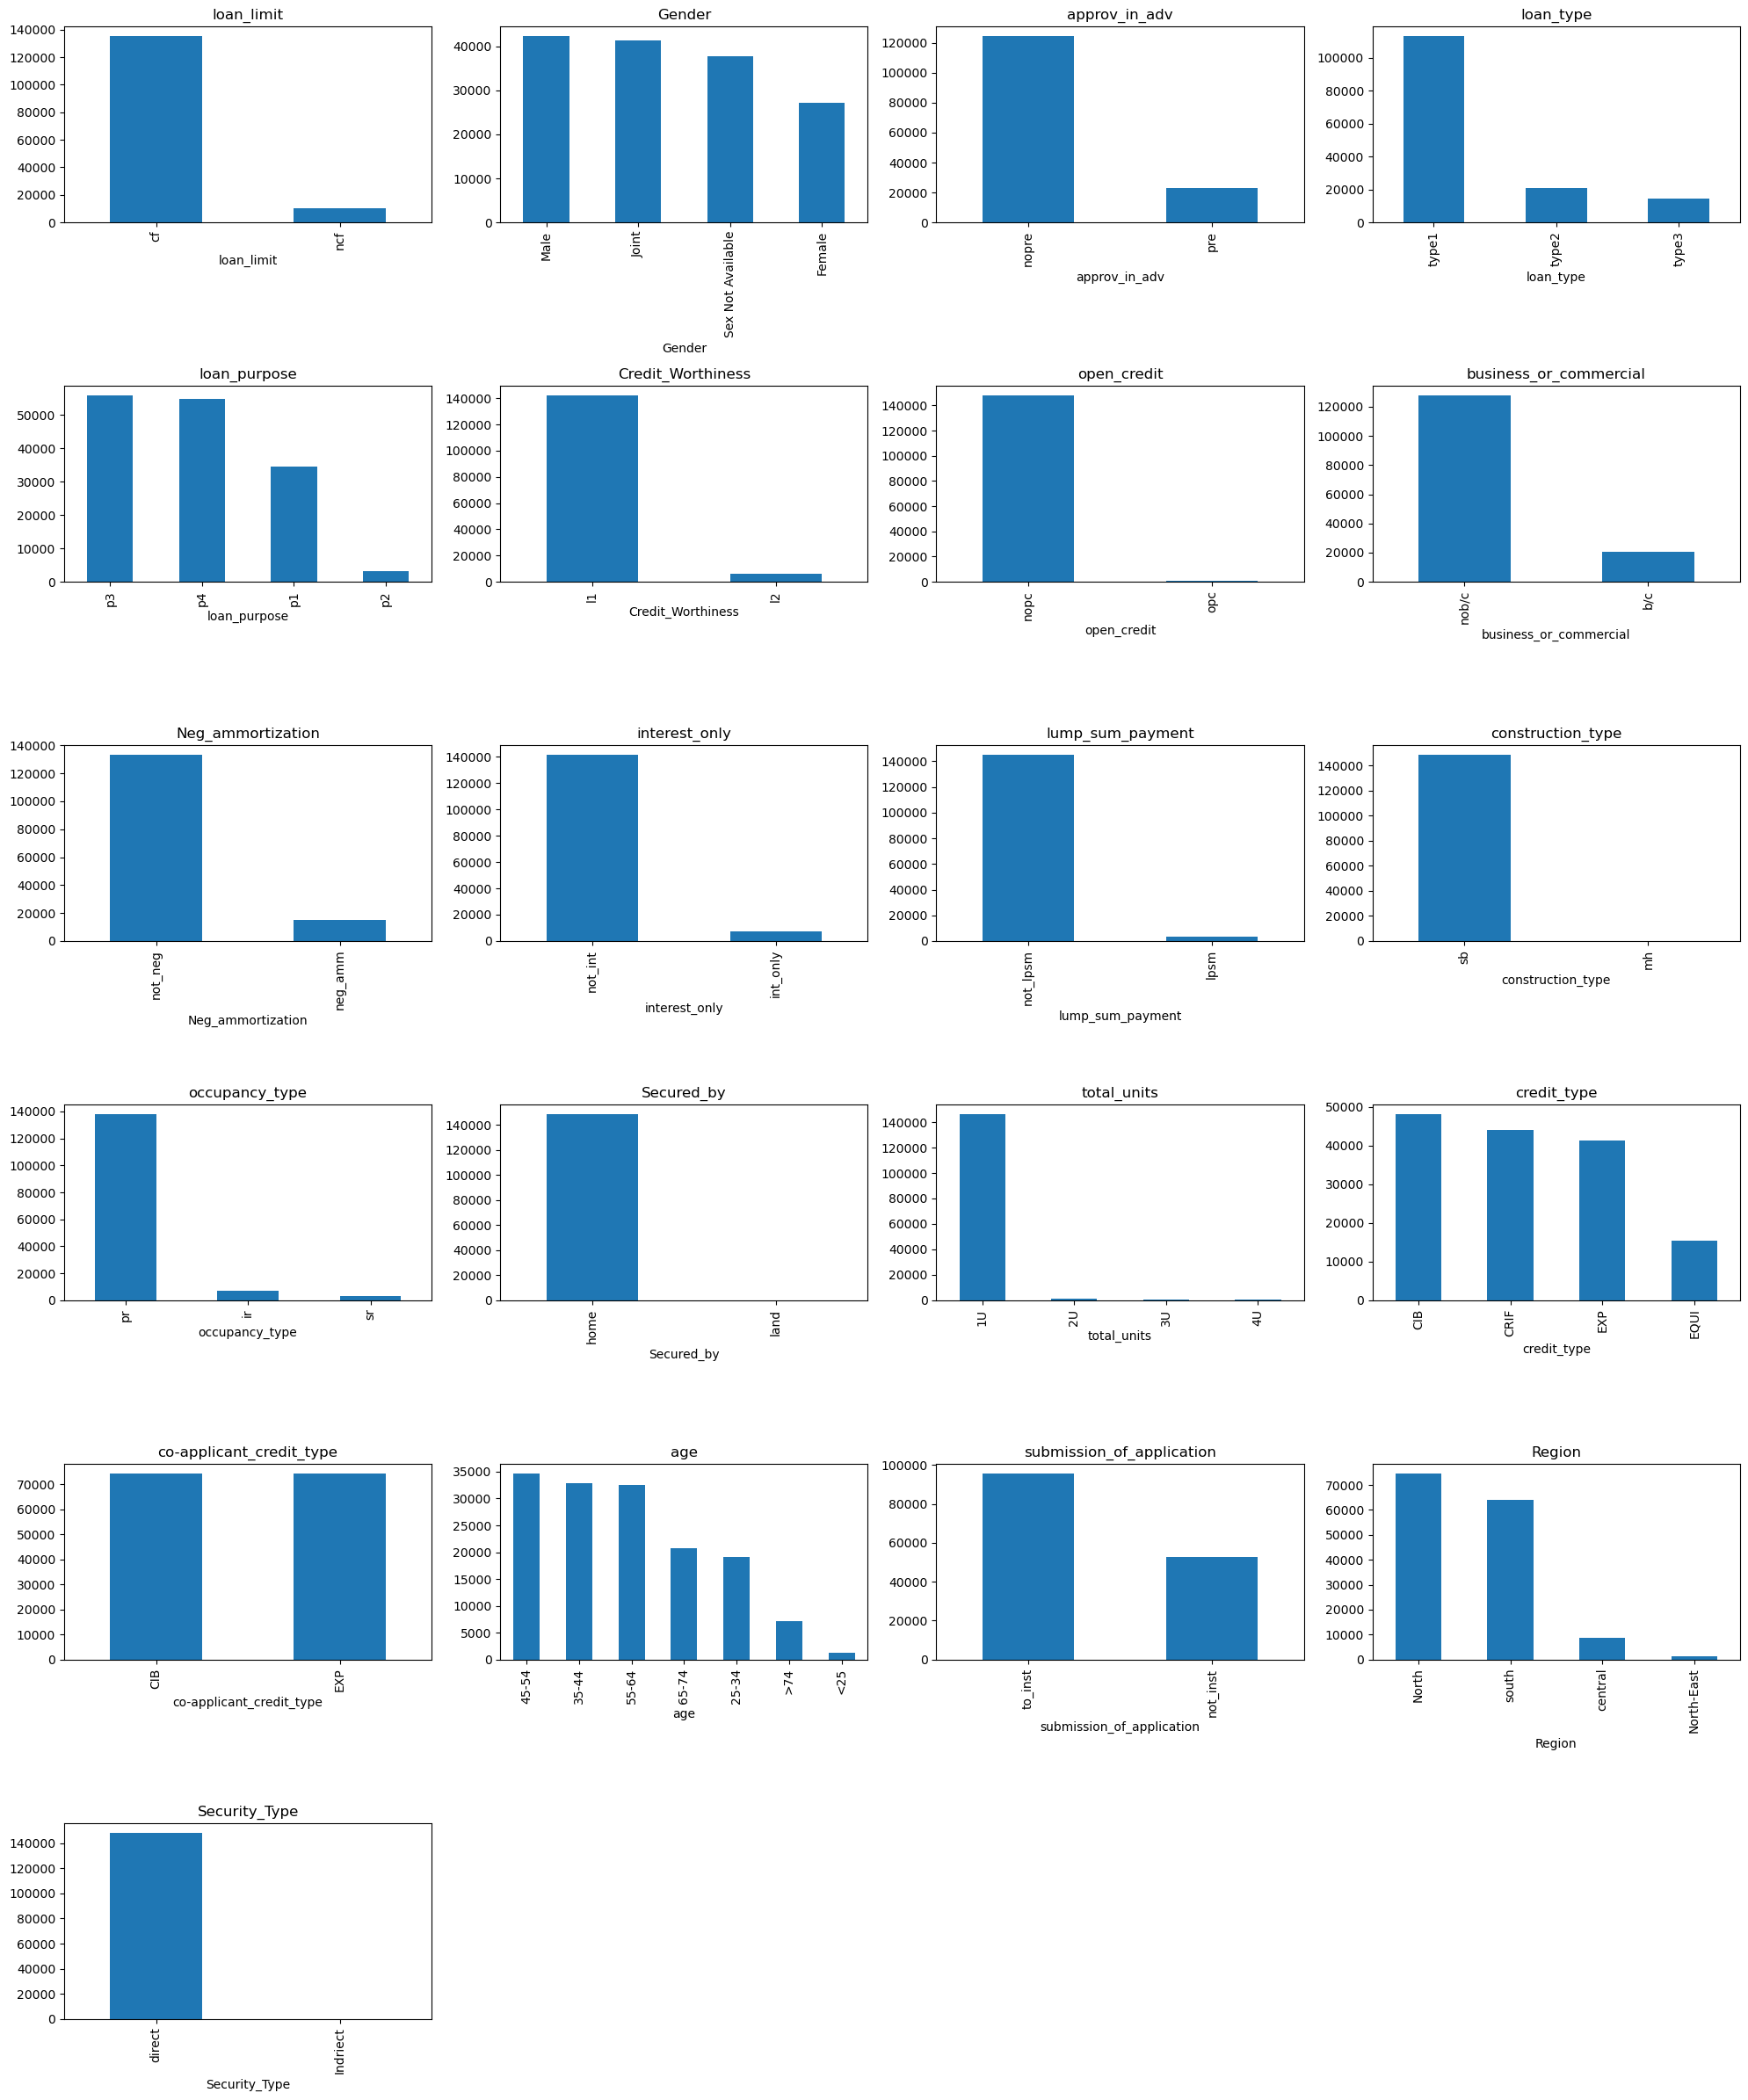

In [6]:
# Визуализация категориальных признаков

print('\033[1mВизуализация категориальных признаков:'.center(100))

# Выбираем все категориальные столбцы (типа object)
cat_cols = df.select_dtypes(include='object').columns
n_plots = len(cat_cols)
n_cols = 4
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Построение графиков для каждого категориального столбца
for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)

# Оставшиеся пустые subplot'ы убираем
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

                                Распределение числовых признаков                                


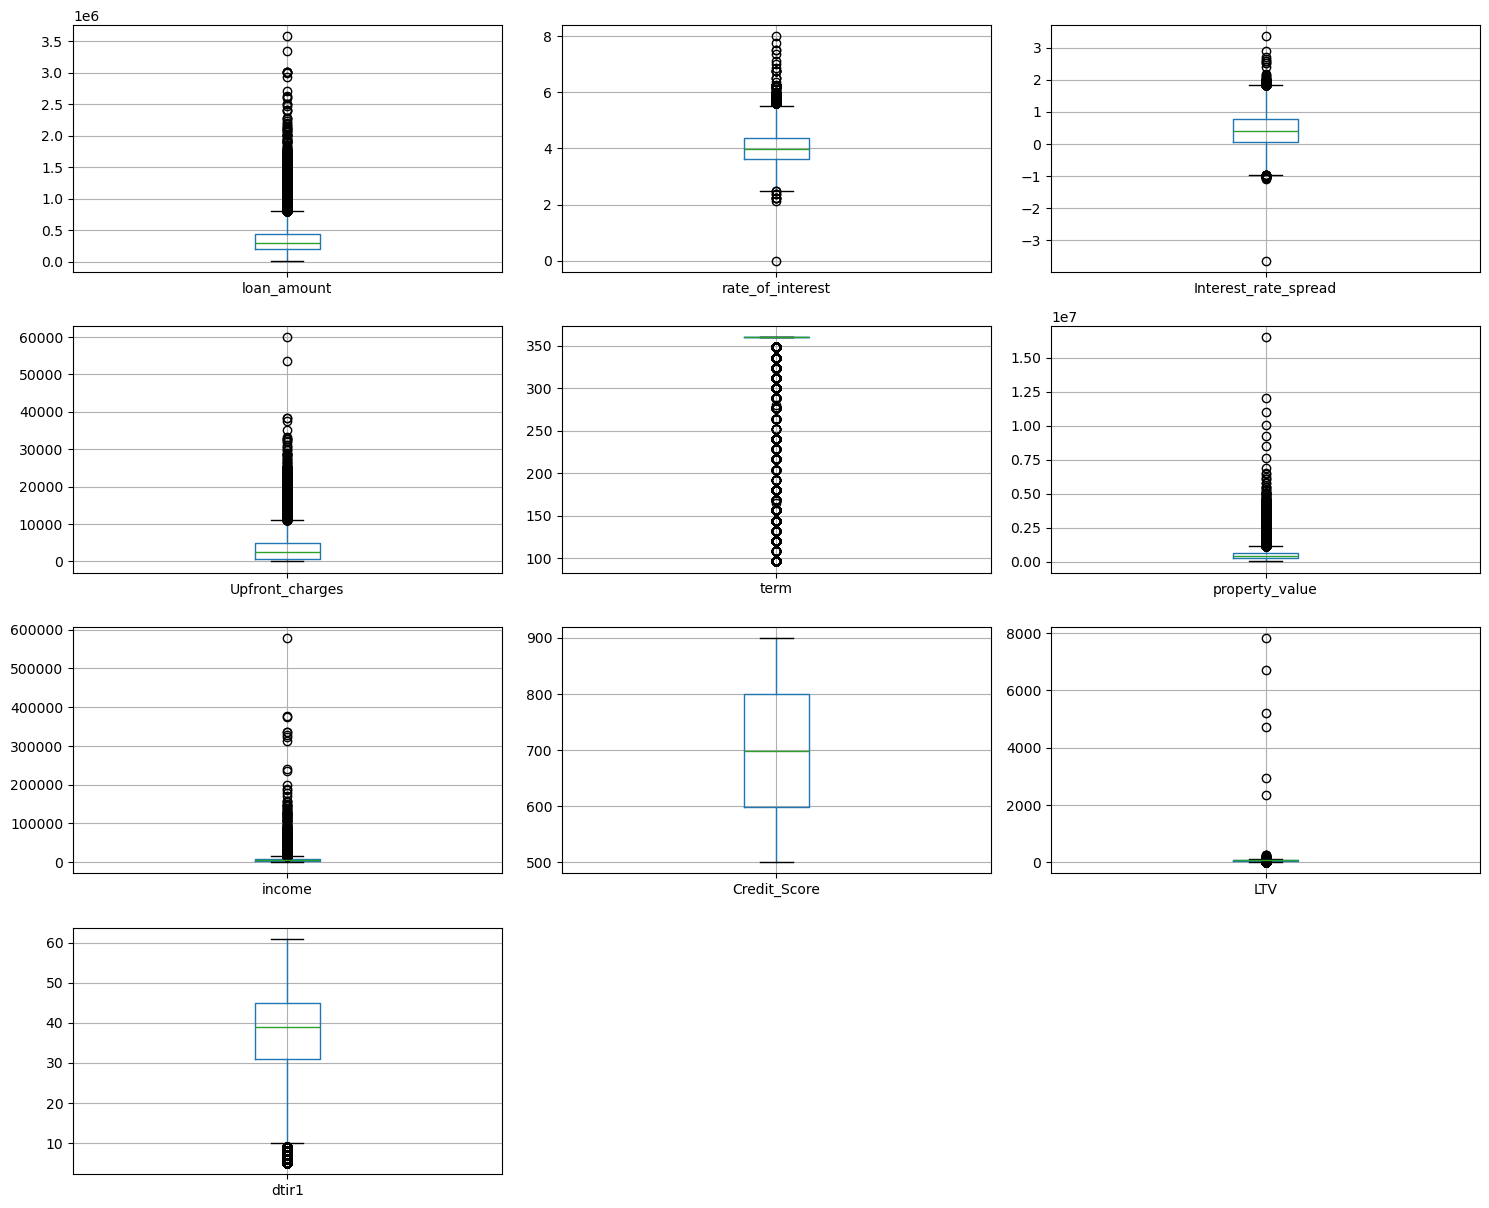

In [7]:
print('\033[1mРаспределение числовых признаков'.center(100))

nf = [i for i in features if i not in cf]

# plt.figure(figsize=[15, 3 * math.ceil(len(features) / 3)])
# for c in range(len(nf)):
#     plt.subplot(math.ceil(len(features) / 3), 3, c + 1)
#     sns.distplot(df[nf[c]])
# plt.tight_layout()
# plt.show()

plt.figure(figsize=[15,3 * math.ceil(len(features) / 3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features) / 3), 3 , c + 1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

`Gender`

Мужчины-получатели являются самой многочисленной группой, их количество чуть превышает 30 000.
Совместные получатели являются вторыми по величине, их количество близко к 30 000.
Получатели с неопределенным полом ("Пол недоступен") занимают третье место с количеством чуть менее 30 000.
Женщины-получатели - самая маленькая группа, их количество чуть превышает 20 000.

`approv_in_adv`

"Nopre" (займы без предварительного одобрения): примерно 100 000 получателей.
"Pre" (займы с предварительным одобрением): примерно 20 000 получателей.
Ключевой момент: большинство займов не были предварительно одобрены.

`open_credit`

Только у 35 участников остались открытые кредитные линии

`business_or_commercial`

"nob / c" (не коммерческий): приблизительно 100 000 получателей, что указывает на преобладание этой категории в распределении.
"b / c" (деловые или коммерческие): примерно 20 000 получателей, что составляет гораздо меньшую часть.
Ключевой момент: Большинство получателей займов не относятся к категории коммерческих.

`loan_amount`

Гистограмма иллюстрирует распределение сумм займов между получателями. Ключевые наблюдения::

Пиковое распределение: большинство сумм займов группируются в диапазоне от 200 000 до 300 000 долларов, с наибольшей частотой в этом диапазоне.
Неравномерное распределение: Распределение имеет перекос вправо, что указывает на меньшее количество кредитов в более высоких диапазонах сумм.
Более низкая частота: По мере того, как сумма кредита превышает 300 000 долларов, частота выдачи кредитов неуклонно снижается, и лишь немногие кредиты превышают 600 000 долларов.
Это говорит о том, что большинству получателей кредитов одобряются суммы в пределах среднего диапазона, при этом выдается меньше крупных кредитов.

`rate_of_interest`

Гистограмма показывает распределение процентных ставок среди получателей кредита. Основные наблюдения следующие:

Пиковое распределение: Наиболее распространенная процентная ставка составляет около 4,00% с резким скачком частоты, что указывает на то, что многие кредиты выдаются по этой ставке.
Диапазон процентных ставок: Процентные ставки в основном варьируются от 3,00% до 5,00%, с заметной концентрацией кредитов в диапазоне от 3,50% до 4,25%.
Более низкие частоты: За пределами пика в 4,00% процентные ставки выше 4,25% и ниже 3,50% встречаются реже, с постепенно снижающейся частотой.
Это говорит о том, что для большинства получателей кредита процентная ставка составляет около 4,00%, при этом меньшее количество кредитов имеют либо значительно более высокие, либо более низкие ставки.

`Upfront_charges`

Гистограмма показывает распределение авансовых платежей среди получателей кредита. Основные наблюдения следующие:

Два основных пика: В распределении наблюдается два заметных пика — один около 0 долларов, а другой около 2000 долларов — что указывает на то, что большое количество кредитов имеют либо минимальные первоначальные платежи, либо стандартную плату в размере около 2000 долларов.
Неравномерное распределение: Распределение неравномерно с постепенным снижением частоты, поскольку первоначальные платежи превышают 2000 долларов.
Более низкая частота: После 4000 долларов частота займов с более высокими первоначальными взносами значительно снижается, и очень немногие займы имеют первоначальную плату выше 8000 долларов.
Это говорит о том, что большинство получателей кредита сталкиваются либо с минимальными первоначальными сборами, либо с обычно применяемыми сборами в размере около 2000 долларов, при этом меньшее количество кредитов предполагает более высокие первоначальные сборы.

`term`

Гистограмма показывает распределение количества месяцев, необходимых для возврата кредита, среди получателей. Основные наблюдения следующие:

Доминирующий пик: Наиболее распространенный срок кредитования составляет 360 месяцев (30 лет), со значительно более высокой частотой по сравнению с другими условиями.
Минимальные различия: Существует несколько других условий кредитования (около 180 месяцев, 240 месяцев, 300 месяцев и 324 месяца) с гораздо более низкой частотой.
Сильно искаженный: Распределение сильно искажено в сторону 360-месячного срока, что указывает на то, что это стандартный или наиболее предпочтительный срок кредита среди получателей.
Это говорит о том, что подавляющее большинство получателей займов предпочитают долгосрочные займы, в частности 360 месяцев (30 лет), и очень немногие выбирают более короткие сроки кредитования.

`Neg_ammortization`

Столбчатая диаграмма показывает количество получателей кредита с отрицательной амортизацией и без нее. Основные наблюдения следующие:

Доминирующая категория: Большинство кредитов не имеют отрицательной амортизации ("not_neg"), их количество превышает 100 000.
Категория меньшинства: Гораздо меньшее количество кредитов связано с отрицательной амортизацией ("neg_amm"), их количество составляет менее 20 000.
Существенное различие: Между этими двумя категориями существует значительное несоответствие, указывающее на то, что большинство получателей кредита выбирают кредиты без отрицательной амортизации или им выдаются кредиты без отрицательной амортизации.
Это говорит о том, что отрицательная амортизация не является распространенной чертой для большинства кредитов, поскольку большинство получателей имеют кредиты, структурированные без нее.

`interest_only`

Столбчатая диаграмма показывает количество получателей кредита с выплатой только процентов и без нее. Основные наблюдения следующие:

Доминирующая категория: Большинство кредитов выдаются без выплаты только процентов ("not_int"), их количество превышает 100 000.
Категория меньшинства: Гораздо меньшее количество кредитов предполагает выплаты только по процентам ("int_only"), их количество составляет менее 20 000.
Существенное различие: Между этими двумя категориями существует значительное несоответствие, указывающее на то, что большинство получателей кредита либо выбирают варианты выплаты только процентов, либо получают их сами.
Это говорит о том, что выплаты только по процентам не являются обычным явлением для большинства кредитов, поскольку структура большинства получателей кредитов включает также выплаты по основной сумме долга.

`lump_sum_payment`

Столбчатая диаграмма показывает количество получателей кредита с единовременными выплатами и без них. Основные наблюдения следующие:

Доминирующая категория: Большинство кредитов выданы без единовременных выплат ("not_lpsm"), их количество превышает 100 000.
Категория меньшинства: Гораздо меньшее количество кредитов предполагает единовременные выплаты ("lpsm"), их количество составляет менее 20 000.
Существенное различие: Между этими двумя категориями существует существенное различие, указывающее на то, что большинство получателей кредита либо выбирают варианты единовременной выплаты, либо получают их без нее.
Это говорит о том, что единовременные выплаты не являются распространенной чертой среди большинства кредитов, поскольку большинство получателей вместо этого выбирают стандартные планы платежей или им предоставляются такие планы.

`property_value`

Пиковая стоимость: большинство объектов недвижимости оцениваются примерно в 400 000 долларов с наибольшей частотой.
Асимметричное распределение: значения смещены вправо, с меньшим количеством объектов стоимостью выше 600 000 долларов.
Основной диапазон: Стоимость большинства объектов недвижимости составляет от 200 000 до 600 000 долларов, с резким падением частоты за пределы 800 000 долларов.
Это говорит о том, что наиболее распространены объекты средней стоимости с небольшим количеством объектов с высокой стоимостью.

`occupancy_type`

Большинство кредитов на первичное жилье: более 100 000 выдано на первичное жилье, что делает его доминирующей категорией.
Категории поменьше: как инвестиционные, так и вторичные жилищные кредиты по 20 000 долларов каждый.
Значительное расхождение: кредитов на первичное жилье намного больше, чем на другие типы.
Это указывает на то, что большинство кредитов выдаются на первичное жилье, и гораздо меньше - на инвестиции или вторичное жилье.

`Secured_by`

Кредиты под залог жилья: Подавляющее большинство кредитов обеспечиваются домами, их количество исчисляется сотнями тысяч.
Кредиты под залог земли: Гораздо меньшее количество кредитов обеспечено землей, и их количество едва достигает тысячи.
Существенное различие: Между двумя категориями существует существенное различие, указывающее на то, что дома являются преобладающей формой обеспечения по кредитам.
Это говорит о том, что кредиты в подавляющем большинстве случаев обеспечиваются домами, а не землей.

`total_units`

Преобладание одной единицы: большинство объектов недвижимости состоят из одной единицы (1U), их количество исчисляется сотнями тысяч.
Меньше многоквартирных объектов: объекты с 2, 3 или 4 единицами встречаются гораздо реже.
Явное несоответствие: количество объектов с одной единицей намного превышает количество объектов с несколькими единицами.
Это указывает на значительную распространенность монолитных домов в наборе данных.

`income`

Концентрация доходов: У большинства получателей кредита доход составляет от 3000 до 6000 долларов, с максимальным значением около 4000 долларов.
Симметричное распределение: Распределение доходов имеет примерно колоколообразную форму, что указывает на нормальное распределение с меньшим количеством получателей при очень низких или очень высоких доходах.
Частота уменьшения: Наблюдается постепенное снижение частоты, поскольку доход выходит за пределы диапазона 4000-6000 долларов.
Это говорит о том, что большинство получателей кредита имеют умеренный доход, а в крайних случаях - меньший.

`Credit_Score`

Равномерное распределение: кредитные баллы среди получателей займов равномерно распределены по всему диапазону, причем каждый диапазон баллов имеет одинаковую частоту.
Постоянная частота: в большинстве категорий кредитных рейтингов насчитывается около 6000 получателей, без существенных пиков или спадов.
Широкий диапазон: Кредитные рейтинги варьируются от 500 до 900, что указывает на разнообразие получателей кредитов.
Это предполагает сбалансированное распределение кредитных баллов среди получателей, при этом ни один конкретный диапазон баллов не доминирует.

`age`

Пиковые возрастные группы: Наиболее распространенные получатели кредита в возрасте 35-54 лет, причем в каждой группе более 25 000 человек.
Снижение участия: число получателей значительно уменьшается в возрастных группах 65-74 и <25 лет.
Наименьшее количество: В возрастных группах <25 и > 74 меньше всего получателей кредита.
Это указывает на то, что лица среднего возраста (35-54) являются основными получателями кредита, при этом заявителей моложе и старше значительно меньше.

`LTV`

Максимальный диапазон LTV: У большинства получателей кредита соотношение кредита к стоимости (LTV) составляет от 70% до 90%, при этом наибольшая частота составляет около 80%.
Симметричное распределение: коэффициенты LTV образуют колоколообразную кривую, указывающую на нормальное распределение с центром около 80%.
Нижние крайние значения: у немногих получателей коэффициенты LTV ниже 40% или выше 100%.
Это указывает на то, что большинство кредитов выдаются с коэффициентами LTV в умеренном диапазоне, при этом экстремальные коэффициенты LTV встречаются реже.

`Region`

Большое количество кредитов на Севере и Юге: в Северном и Южном регионах наибольшее количество получателей кредитов, при этом Север немного лидирует.
Ниже в Центральном и Северо-Восточном регионах: В Центральном и Северо-Восточном регионах значительно меньше получателей кредитов.
Явное региональное неравенство: Существует заметная разница в распределении кредитов по регионам, при этом преобладают Север и Юг.
Это указывает на то, что большинство получателей кредитов сосредоточено в Северном и Южном регионах.

`Security_Type`

Преобладание прямого обеспечения: подавляющее большинство кредитов обеспечено напрямую, их количество исчисляется сотнями тысяч.
Минимальное косвенное обеспечение: кредитов, обеспеченных косвенно, значительно меньше, едва достигая тысячи.
Очевидные предпочтения: Среди получателей кредита преобладают прямые виды обеспечения.
Это указывает на то, что большинство кредитов обеспечено напрямую, а косвенное обеспечение встречается редко.

`Status`

Большинство невозвратных кредитов: у большинства получателей кредитов нет дефолтов, их количество превышает 80 000.
Меньше дефолтов: невозвратных кредитов значительно меньше, их количество составляет около 30 000.
Явное несоответствие: Существует существенная разница между количеством просроченных и не просроченных кредитов.
Это указывает на то, что большинство получателей кредитов не допустили просрочки по своим кредитам.

**Основные выводы**

Профиль типичного заемщика:
- Мужчина или совместный получатель.
- Возраст 35–54 года.
- Доход $3000–$6000.
- Кредитный рейтинг 500–900 (широкий диапазон).

Тип кредита:
- Долгосрочный (360 месяцев).
- Не требует предварительного одобрения.
- Без отрицательной амортизации, без выплат только процентов.
- Средний размер займа: $200k–$300k.
- Обеспечен недвижимостью (чаще всего домом на одну семью).
- Чаще всего используется для первичного жилья.

Рынок:
- Преобладает частное кредитование, не бизнес.
- Большинство кредитов — в Северном и Южном регионах.
- Доминируют стандартные формы выплат и обеспечений.

## <center> Проверка данных на нормальность

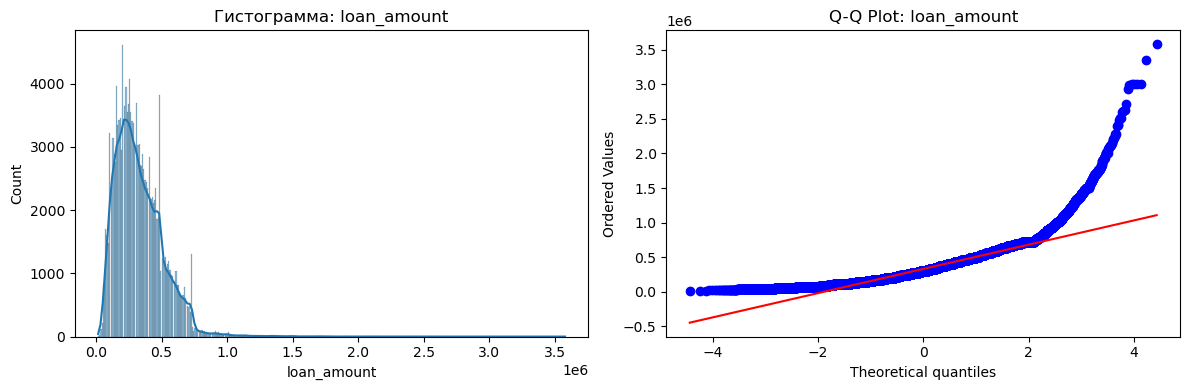

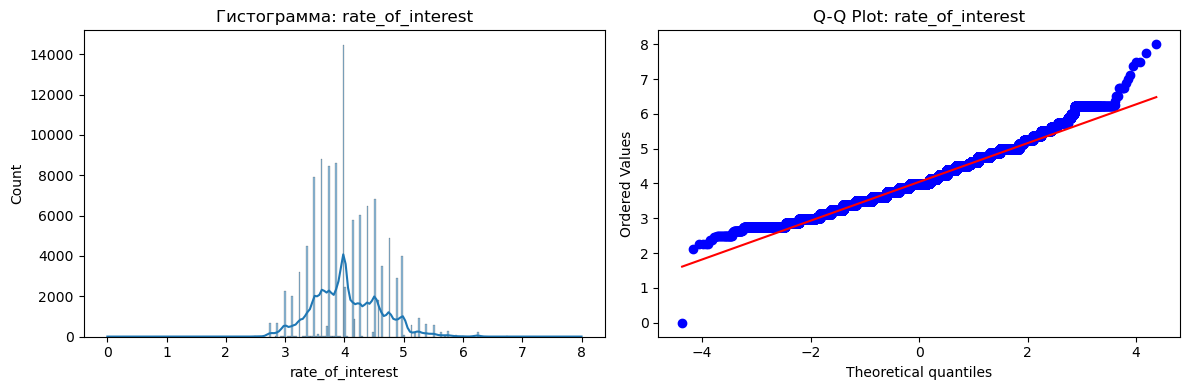

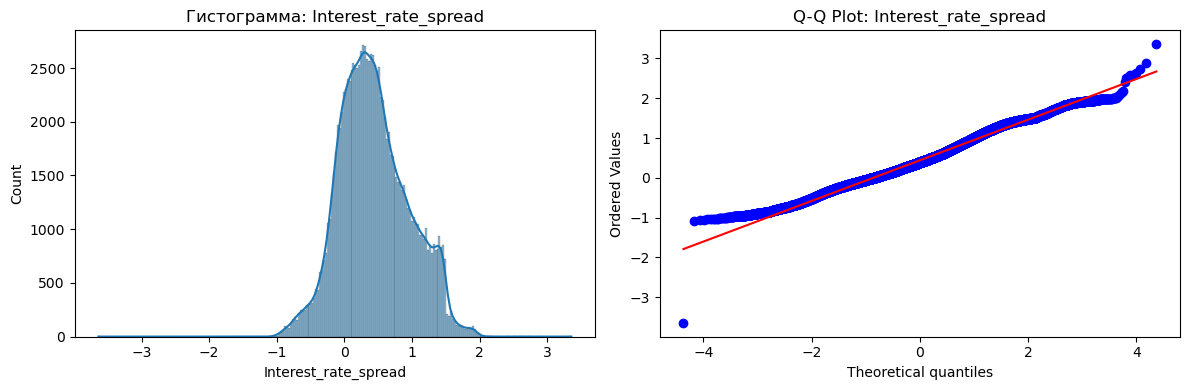

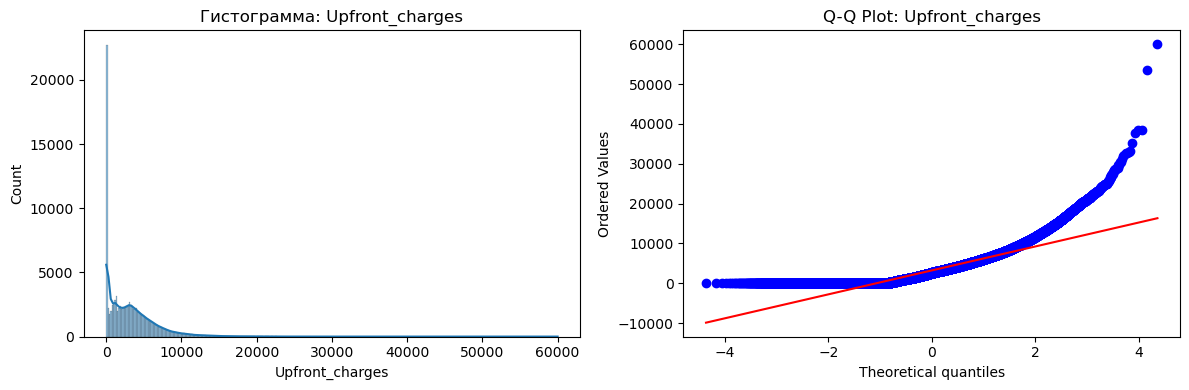

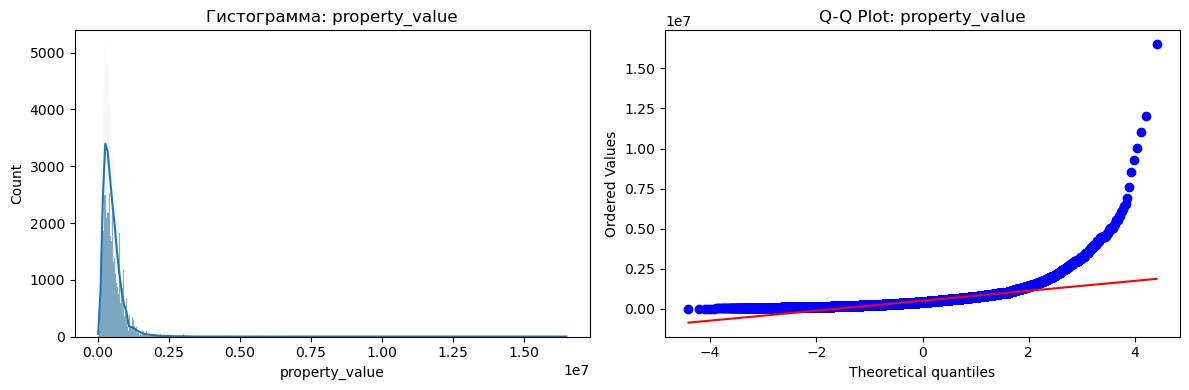

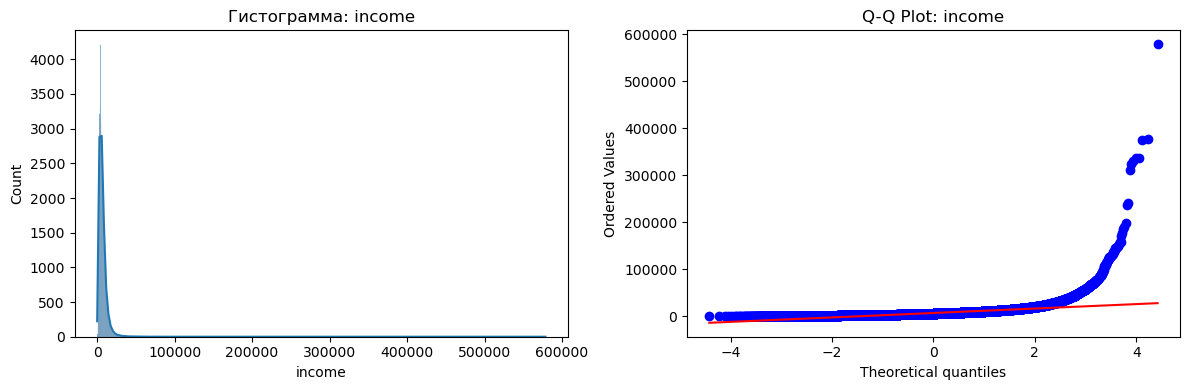

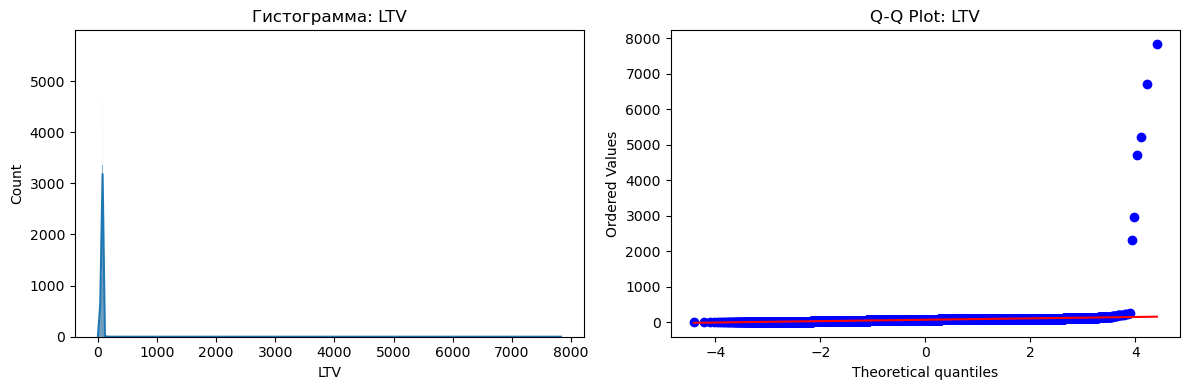

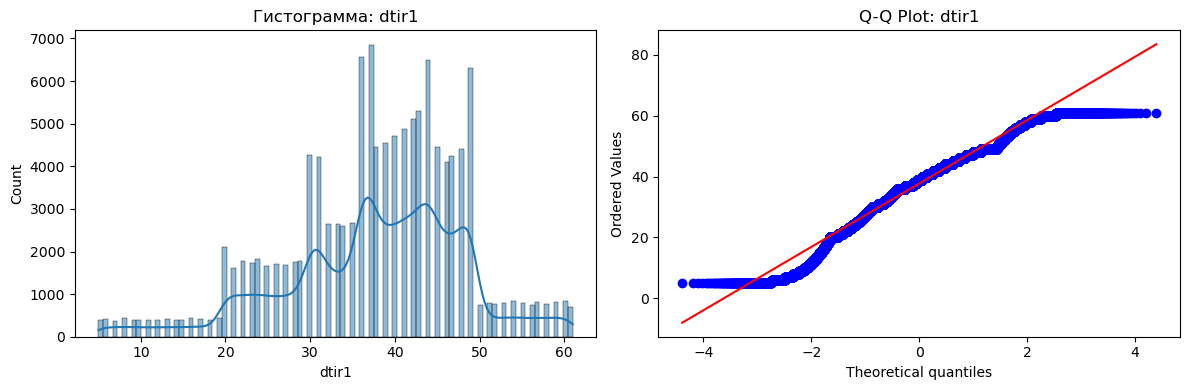

In [8]:
# Оставляем только числовые колонки
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    if col not in ['term', 'Credit_Score', 'Status']:
        data = df[col].dropna()  # Убираем NaN
        
        # Визуализация
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        # Гистограмма
        sns.histplot(data, kde=True, ax=axes[0])
        axes[0].set_title(f"Гистограмма: {col}")
        
        # Q-Q Plot
        stats.probplot(data, dist="norm", plot=axes[1])
        axes[1].set_title(f"Q-Q Plot: {col}")
        
        plt.tight_layout()
        plt.show()

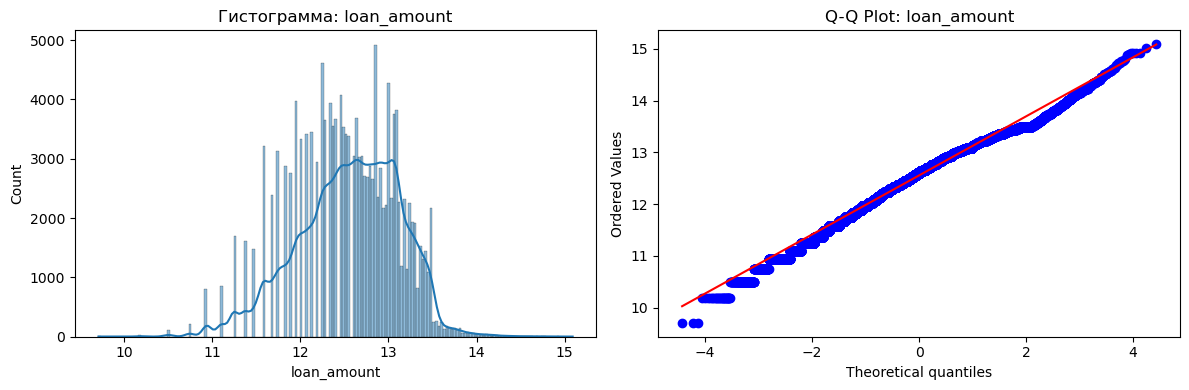

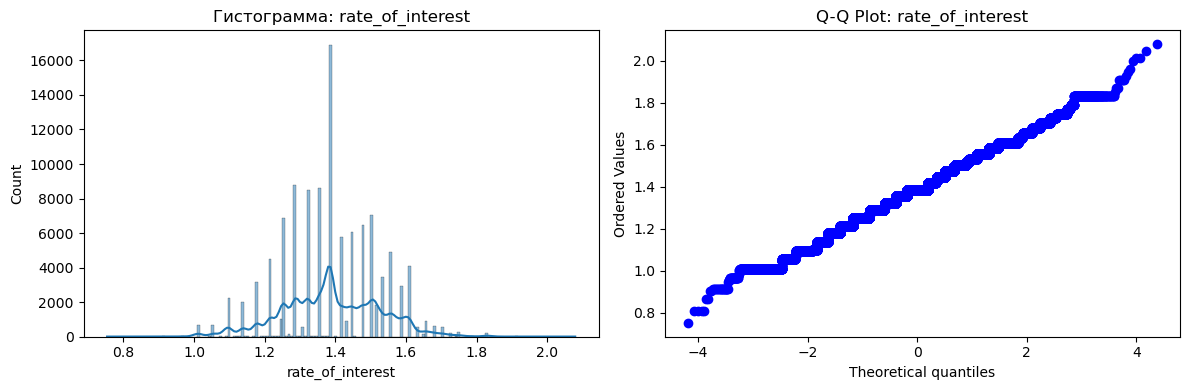

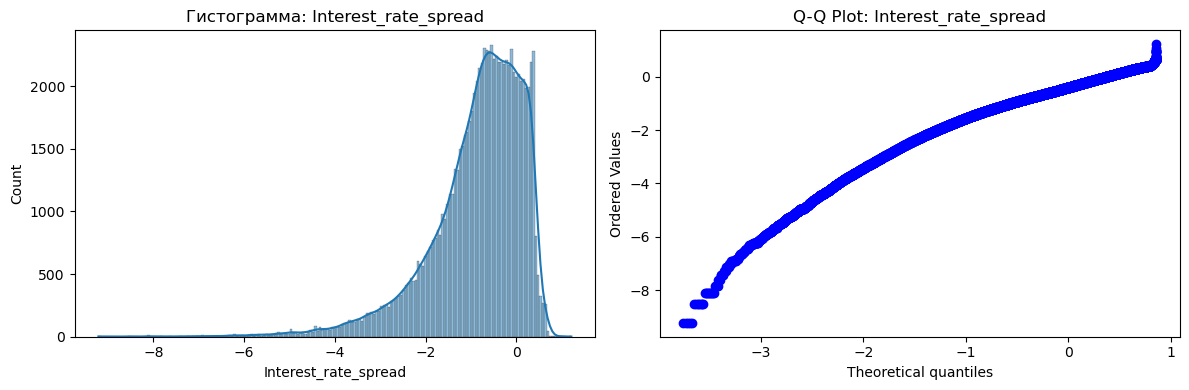

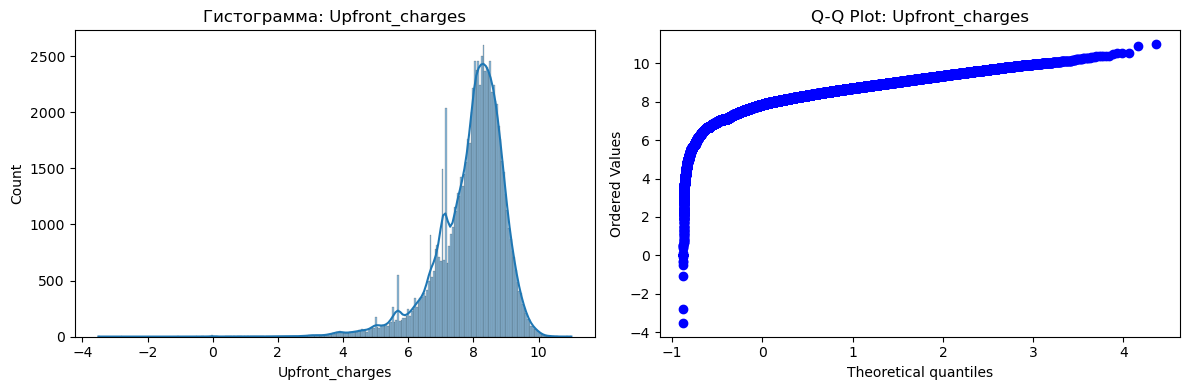

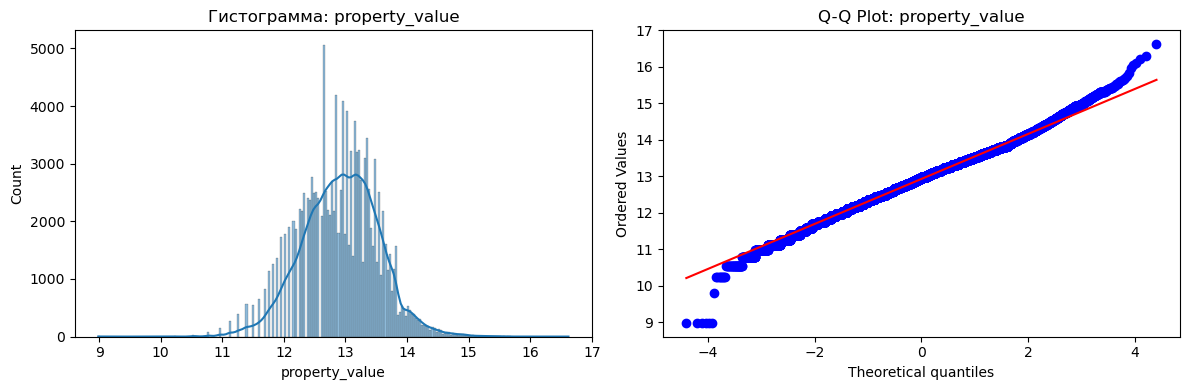

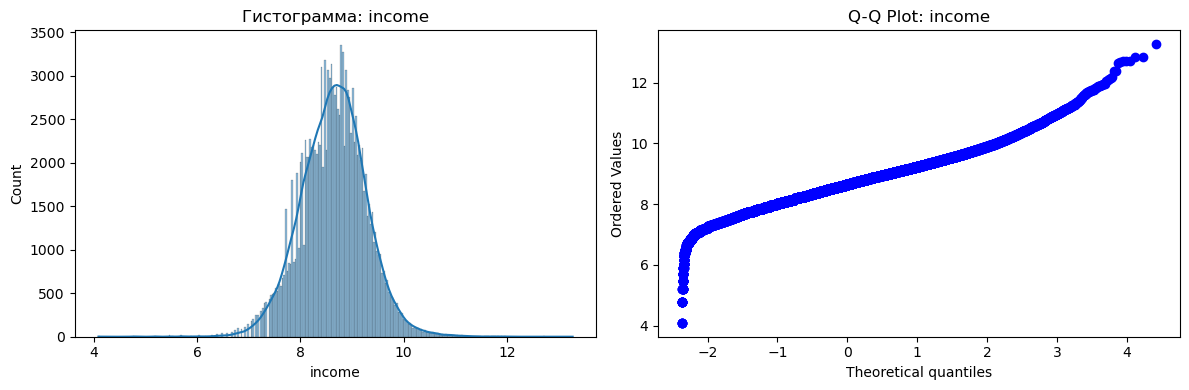

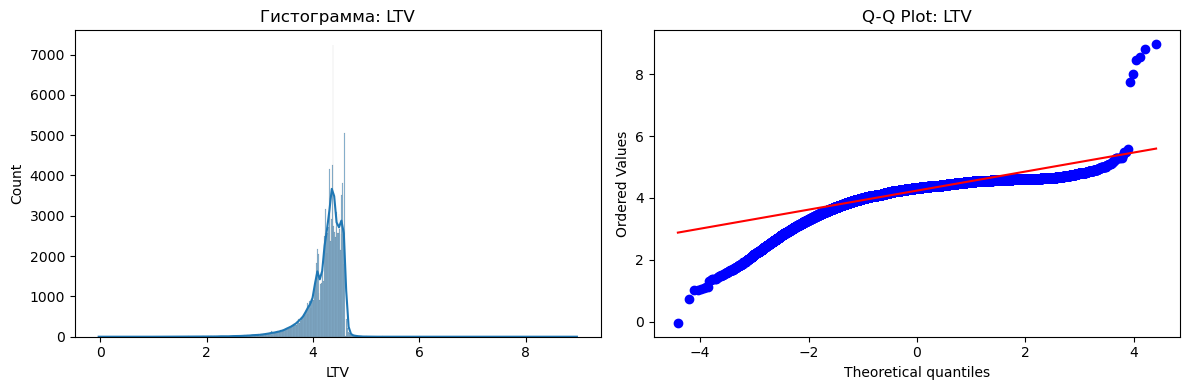

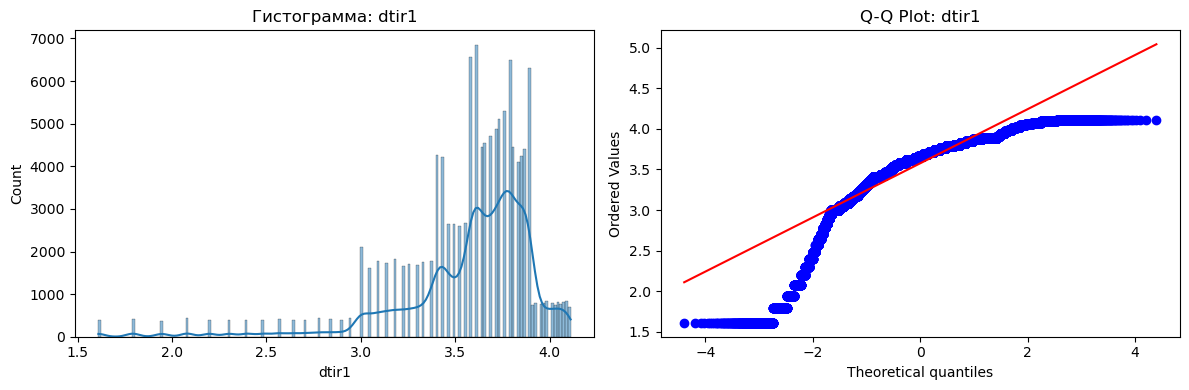

In [9]:
# проверка логарифмированием
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    if col not in ['term', 'Credit_Score', 'Status']:
        data = df[col].dropna()  # Убираем NaN
        data = np.log(data)
        # Визуализация
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        # Гистограмма
        sns.histplot(data, kde=True, ax=axes[0])
        axes[0].set_title(f"Гистограмма: {col}")
        
        # Q-Q Plot
        stats.probplot(data, dist="norm", plot=axes[1])
        axes[1].set_title(f"Q-Q Plot: {col}")
        
        plt.tight_layout()
        plt.show()

In [10]:
# Удаляем NaN перед тестами
data = df[num_cols].dropna()

# Список для хранения результатов
results = []

for i in num_cols:
    if col not in ['term', 'Credit_Score', 'Status']:
        for j in num_cols:
            if i == j:
                continue  # Пропускаем сравнение колонки с самой собой
    
            # Проверяем количество уникальных значений
            col1, col2 = data[i], data[j]
            if col1.nunique() < 2 or col2.nunique() < 2:
                results.append([i, j, np.nan, np.nan, np.nan, np.nan])
                continue
    
            # Тест Манна-Уитни (разница между распределениями)
            stat_mw, p_mw = mannwhitneyu(col1, col2, alternative="two-sided")
    
            # Корреляция Спирмена
            stat_spear, p_spear = spearmanr(col1, col2)
    
            # Сохраняем результаты
            results.append([i, j, stat_mw, p_mw, stat_spear, p_spear])


df_results = pd.DataFrame(results, columns=["Column_1", "Column_2", 
                                            "Mann-Whitney U", "Mann-Whitney p-value",
                                            "Spearman Correlation", "Spearman p-value"])

# Приводим "Column_1" и "Column_2" к отсортированному виду (чтобы найти дубликаты)
df_results["sorted_pair"] = df_results.apply(lambda x: " ".join(sorted([x["Column_1"], x["Column_2"]])), axis=1)

# Удаляем дубликаты пар (оставляем первую встреченную)
df_results = df_results.drop_duplicates(subset=["sorted_pair"]).drop(columns=["sorted_pair"]).reset_index(drop=True)

# Выводим таблицу
df_results.dropna()

Column_1              Column_2  Mann-Whitney U  \
0            loan_amount      rate_of_interest    1.026351e+10   
1            loan_amount  Interest_rate_spread    1.026351e+10   
2            loan_amount       Upfront_charges    1.026351e+10   
3            loan_amount                  term    1.026351e+10   
4            loan_amount        property_value    3.268083e+09   
5            loan_amount                income    1.026269e+10   
6            loan_amount          Credit_Score    1.026351e+10   
7            loan_amount                   LTV    1.026351e+10   
9            loan_amount                 dtir1    1.026351e+10   
10      rate_of_interest  Interest_rate_spread    1.026351e+10   
11      rate_of_interest       Upfront_charges    1.657970e+09   
12      rate_of_interest                  term    0.000000e+00   
13      rate_of_interest        property_value    0.000000e+00   
14      rate_of_interest                income    0.000000e+00   
15      rate_of_interest          Credit_Score    0.000000e+00   
16      rate_of_interest                   LTV    2.076690e+05   
18      rate_of_interest                 dtir1    8.939390e+05   
19  Interest_rate_spread       Upfront_charges    1.375639e+09   
20  Interest_rate_spread                  term    0.000000e+00   
21  Interest_rate_spread        property_value    0.000000e+00   
22  Interest_rate_spread                income    0.000000e+00   
23  Interest_rate_spread          Credit_Score    0.000000e+00   
24  Interest_rate_spread                   LTV    1.000000e+00   
26  Interest_rate_spread                 dtir1    0.000000e+00   
27       Upfront_charges                  term    8.239515e+09   
28       Upfront_charges        property_value    2.300000e+02   
29       Upfront_charges                income    2.249772e+09   
30       Upfront_charges          Credit_Score    7.856911e+09   
31       Upfront_charges                   LTV    8.539625e+09   
33       Upfront_charges                 dtir1    8.578913e+09   
34                  term        property_value    0.000000e+00   
35                  term                income    2.431130e+05   
36                  term          Credit_Score    0.000000e+00   
37                  term                   LTV    1.026259e+10   
39                  term                 dtir1    1.026351e+10   
40        property_value                income    1.026315e+10   
41        property_value          Credit_Score    1.026351e+10   
42        property_value                   LTV    1.026351e+10   
44        property_value                 dtir1    1.026351e+10   
45                income          Credit_Score    1.026044e+10   
46                income                   LTV    1.026351e+10   
48                income                 dtir1    1.026351e+10   
49          Credit_Score                   LTV    1.026351e+10   
51          Credit_Score                 dtir1    1.026351e+10   
53                   LTV                 dtir1    9.583379e+09   

    Mann-Whitney p-value  Spearman Correlation  Spearman p-value  
0                    0.0             -0.157092      0.000000e+00  
1                    0.0             -0.445859      0.000000e+00  
2                    0.0             -0.109727     7.762095e-269  
3                    0.0              0.204905      0.000000e+00  
4                    0.0              0.862628      0.000000e+00  
5                    0.0              0.660842      0.000000e+00  
6                    0.0              0.004304      1.706939e-01  
7                    0.0              0.085966     1.941683e-165  
9                    0.0              0.024261      1.134128e-14  
10                   0.0              0.560135      0.000000e+00  
11                   0.0             -0.114544     6.353314e-293  
12                   0.0              0.236485      0.000000e+00  
13                   0.0             -0.207249      0.000000e+00  
14                   0.0             -0.0

In [11]:
# Удаляем NaN перед тестами
data = df[num_cols].dropna()

# Список для хранения результатов
results = []

for i in num_cols:
    if col not in ['term', 'Credit_Score', 'Status']:
        for j in num_cols:
            if i == j:
                continue  # Пропускаем сравнение колонки с самой собой
    
            # Проверяем количество уникальных значений
            col1, col2 = data[i], data[j]
            if col1.nunique() < 2 or col2.nunique() < 2:
                results.append([i, j, np.nan, np.nan, np.nan, np.nan])
                continue
            col1, col2 = np.log(col1), np.log(col2)
            # Тест Манна-Уитни (разница между распределениями)
            stat_mw, p_mw = mannwhitneyu(col1, col2, alternative="two-sided")
    
            # Корреляция Спирмена
            stat_spear, p_spear = spearmanr(col1, col2)
    
            # Сохраняем результаты
            results.append([i, j, stat_mw, p_mw, stat_spear, p_spear])


df_results = pd.DataFrame(results, columns=["Column_1", "Column_2", 
                                            "Mann-Whitney U", "Mann-Whitney p-value",
                                            "Spearman Correlation", "Spearman p-value"])

# Приводим "Column_1" и "Column_2" к отсортированному виду (чтобы найти дубликаты)
df_results["sorted_pair"] = df_results.apply(lambda x: " ".join(sorted([x["Column_1"], x["Column_2"]])), axis=1)

# Удаляем дубликаты пар (оставляем первую встреченную)
df_results = df_results.drop_duplicates(subset=["sorted_pair"]).drop(columns=["sorted_pair"]).reset_index(drop=True)

# Выводим таблицу
df_results.dropna()

Column_1          Column_2  Mann-Whitney U  Mann-Whitney p-value  \
0        loan_amount  rate_of_interest    1.026351e+10                   0.0   
2        loan_amount   Upfront_charges    1.026351e+10                   0.0   
3        loan_amount              term    1.026351e+10                   0.0   
4        loan_amount    property_value    3.268083e+09                   0.0   
5        loan_amount            income    1.026269e+10                   0.0   
6        loan_amount      Credit_Score    1.026351e+10                   0.0   
7        loan_amount               LTV    1.026351e+10                   0.0   
9        loan_amount             dtir1    1.026351e+10                   0.0   
11  rate_of_interest   Upfront_charges    1.657970e+09                   0.0   
12  rate_of_interest              term    0.000000e+00                   0.0   
13  rate_of_interest    property_value    0.000000e+00                   0.0   
14  rate_of_interest            income    0.000000e+00                   0.0   
15  rate_of_interest      Credit_Score    0.000000e+00                   0.0   
16  rate_of_interest               LTV    2.076690e+05                   0.0   
18  rate_of_interest             dtir1    8.939390e+05                   0.0   
27   Upfront_charges              term    8.239515e+09                   0.0   
28   Upfront_charges    property_value    2.300000e+02                   0.0   
29   Upfront_charges            income    2.249772e+09                   0.0   
30   Upfront_charges      Credit_Score    7.856911e+09                   0.0   
31   Upfront_charges               LTV    8.539625e+09                   0.0   
33   Upfront_charges             dtir1    8.578913e+09                   0.0   
34              term    property_value    0.000000e+00                   0.0   
35              term            income    2.431130e+05                   0.0   
36              term      Credit_Score    0.000000e+00                   0.0   
37              term               LTV    1.026259e+10                   0.0   
39              term             dtir1    1.026351e+10                   0.0   
40    property_value            income    1.026315e+10                   0.0   
41    property_value      Credit_Score    1.026351e+10                   0.0   
42    property_value               LTV    1.026351e+10                   0.0   
44    property_value             dtir1    1.026351e+10                   0.0   
45            income      Credit_Score    1.026044e+10                   0.0   
46            income               LTV    1.026351e+10                   0.0   
48            income             dtir1    1.026351e+10                   0.0   
49      Credit_Score               LTV    1.026351e+10                   0.0   
51      Credit_Score             dtir1    1.026351e+10                   0.0   
53               LTV             dtir1    9.583379e+09                   0.0   

    Spearman Correlation  Spearman p-value  
0              -0.157092      0.000000e+00  
2              -0.109727     7.762095e-269  
3               0.204905      0.000000e+00  
4               0.862628      0.000000e+00  
5               0.660842      0.000000e+00  
6               0.004304      1.706939e-01  
7               0.085966     1.941683e-165  
9               0.024261      1.134128e-14  
11             -0.114544     6.353314e-293  
12              0.236485      0.000000e+00  
13             -0.207249      0.000000e+00  
14             -0.095855     2.280164e-205  
15             -0.004375      1.637613e-01  
16              0.114005     3.550164e-290  
18              0.062088      4.357653e-87  
27             -0.098635     2.161404e-217  
28             -0.093750     1.676034e-196  
29             -0.080439     4.892178e-145  
30             -0.002213      4.812709e-01  
31             -0.057918      5.200332e-76  
33             -0.017522      2.439115e-08  
34              0.091152     7.871844e-186  
35             -

**Проверка на нормальность распределения**

Проведен тест Шапиро-Уилка (p-value < 0.05 означает, что распределение не является нормальным).

Все числовые признаки НЕ имеют нормального распределения (p-value ≪ 0.05).

Гистограммы показывают сильную асимметрию и выбросы в данных (`loan_amount`, `property_value`, `income`, `LTV`).

## <center> Проверка на гетероскедантичность

In [12]:
num_cols

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1'],
      dtype='object')

In [13]:
# Проверка гетероскедастичности с помощью теста Бройша-Пагана

# Целевая переменная
y = df['Status']

# Предикторы
X = df[['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'property_value', 'income','LTV', 'dtir1']].fillna(df[num_cols].median())  # Заполним пропуски медианой
X = sm.add_constant(X)  # Добавляем константу

# Регрессионная модель
model = sm.OLS(y, X).fit()

# Тест Бройша-Пагана
bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, X)
print('Lagrange multiplier statistic', 'p-value (LM)', 'F-statistic', 'p-value (F)')
bp_test


Lagrange multiplier statistic p-value (LM) F-statistic p-value (F)


(7574.121652707805, 0.0, 997.5278089287327, 0.0)

Проверка на гетероскедастичность (тест Бройша-Пагана)

- Нулевая гипотеза теста Бройша–Пагана: ошибки модели имеют постоянную дисперсию (гомоскедастичны).
- Альтернативная гипотеза: дисперсия ошибок непостоянна (гетероскедастичность).

* p-value: < 0.05

**Вывод:**

Гетероскедастичность присутствует (ошибки модели не имеют равномерной дисперсии). Это значит, что разброс остатков модели зависит от значений предикторов, что может указывать на нестабильность модели и возможные проблемы с интерпретацией коэффициентов.

Так как наша цель заключается в построении надежной модели, можно:

- Попробовать логарифмировать переменные с высокой дисперсией.
- Использовать робастные оценки ошибок (например, HC3 в statsmodels).
- Применить регуляризацию (Lasso, Ridge) или метод главных компонент (PCA).

## <center> Двумерный анализ

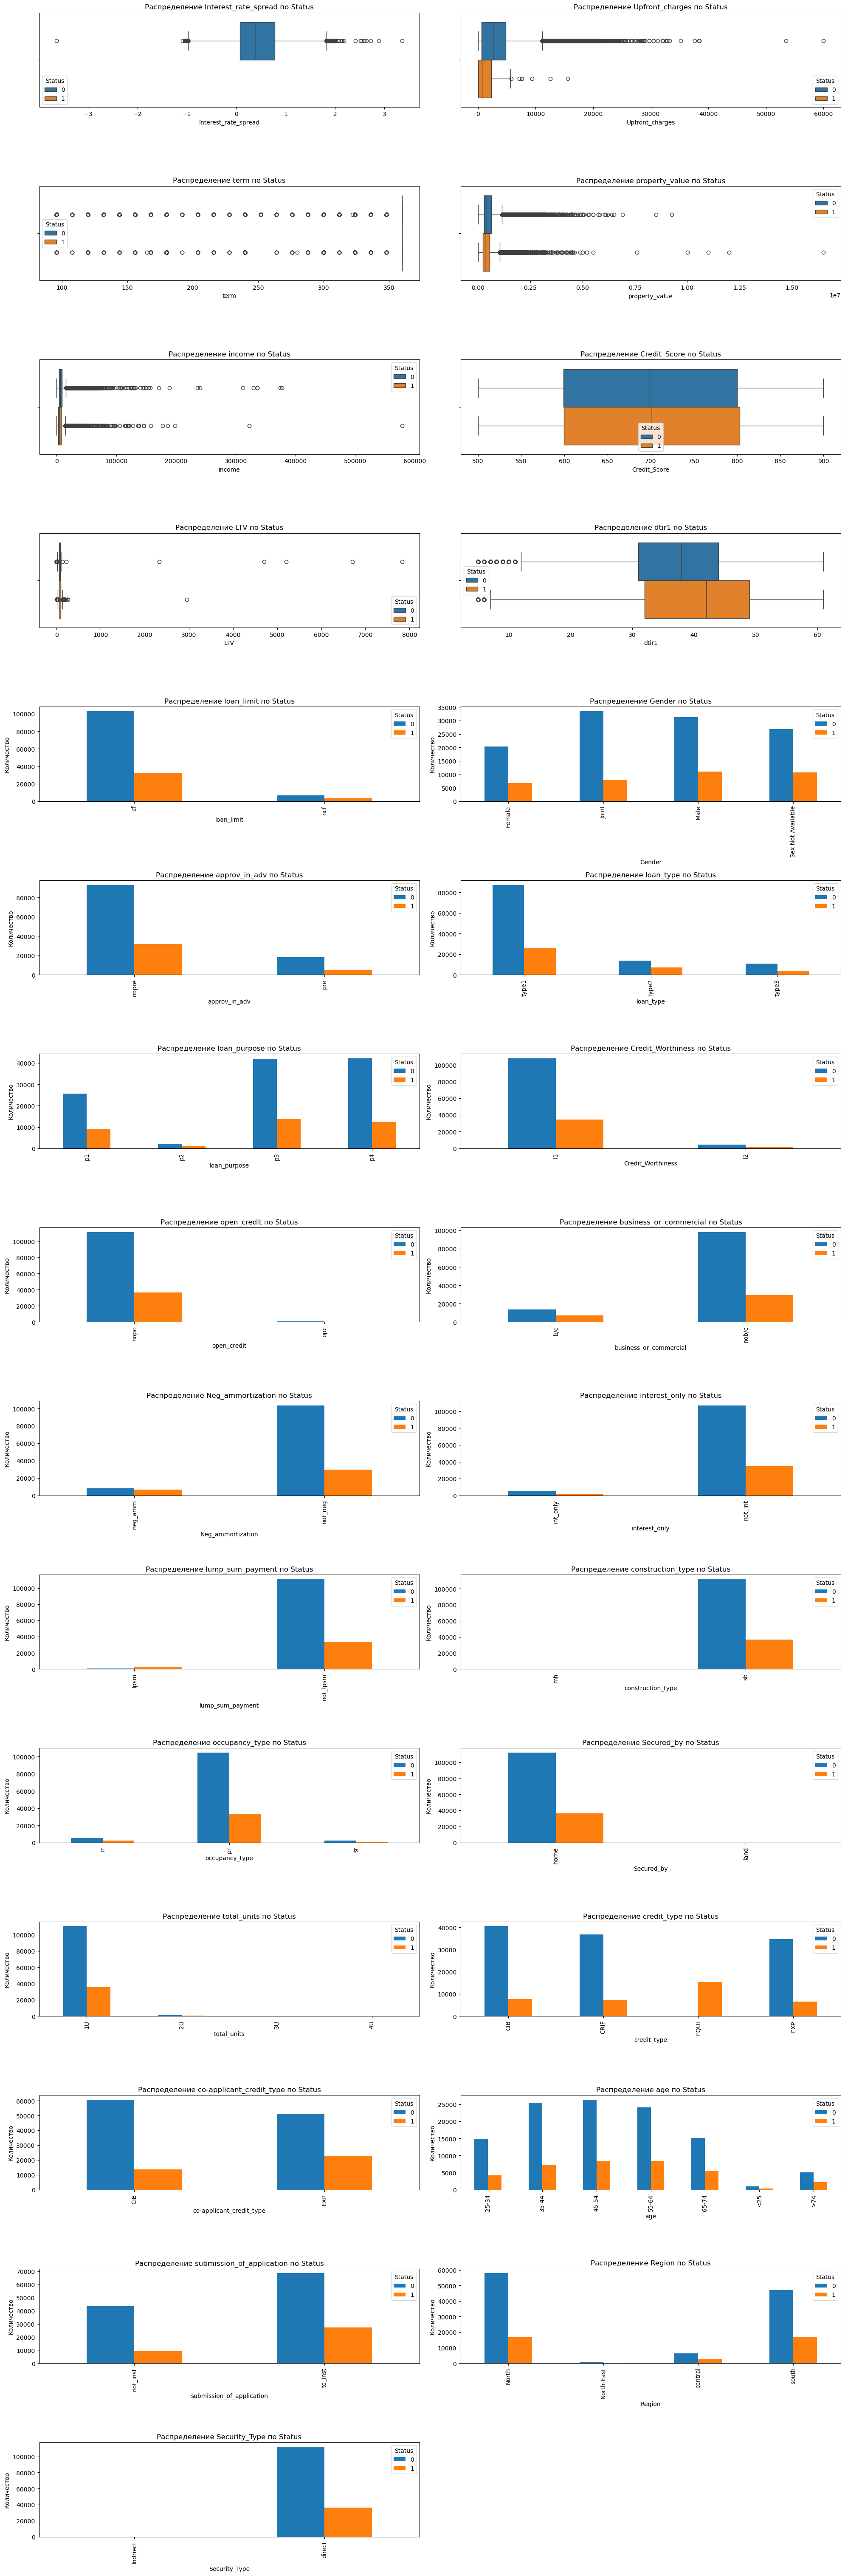

In [14]:
# Определяем целевую переменную
target_col = "Status"


# Определяем числовые и категориальные столбцы
num_cols = df.select_dtypes(include=['number']).columns.drop(target_col, errors='ignore')
cat_cols = df.select_dtypes(include=['object']).columns

# Объединяем все колонки в один список для анализа
all_cols = list(num_cols) + list(cat_cols)

# Устанавливаем количество графиков в строке
n_cols = 2
n_rows = math.ceil(len(all_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Построение графиков
for i, col in enumerate(all_cols[2:]):
    ax = axes[i]

    if col in num_cols:
        # Гистограммы для числовых столбцов, разделённые по целевой переменной
        sns.boxplot(data=df, x=col, hue=target_col, ax=ax)
        ax.set_title(f"Распределение {col} по {target_col}")
    else:
        # Столбчатые диаграммы для категориальных столбцов
        category_counts = df.groupby([col, target_col]).size().unstack().fillna(0)
        category_counts.plot(kind='bar', ax=ax)
        ax.set_title(f"Распределение {col} по {target_col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Количество")


# Скрываем лишние пустые графики
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### `Gender and Status`

- **Преобладание невозвратных кредитов**: Возвратных кредитов больше, чем невозвратных, по всем гендерным категориям.
- **Наибольшее количество**: Категории мужчин и женщин лидируют по количеству кредитов, причем возвратные кредиты составляют большинство.
- **Категория женщин**: Женщины-получатели имеют наименьшее количество как просроченных, так и не просроченных кредитов.

### `approv_in_adv and Status`

- **Большинство кредитов без предварительного одобрения**: Большинство кредитов без предварительного одобрения, при этом исполненных обязательств значительно больше, чем дефолтов.
- **Меньше предварительно одобренных кредитов**: Предварительно одобренных кредитов меньше, и возвратов больше, чем дефолтов.
- **Устойчивая тенденция возврата**: Возвратные кредиты преобладают в обеих категориях.

Это указывает на более высокие показатели по кредитам как с предварительным одобрением, так и без него, причем явное большинство приходится на последние.


### `open_credit and Status`

- **Большинство открытых кредитов (nopc)**: Большинство кредитов относятся к категории "nopc", при этом количество исполненных обязательств немного выше, чем дефолтов.
- **Меньшинство по открытым кредитам (opc)**: Категория "opc" имеет значительно меньше кредитов, при этом вернувших кредитов больше, чем дефолтов.

Это указывает на то, что займы без открытого кредита более распространены и дают лучшие результаты.


### `business_or_commercial and Status`

- **Большинство кредитов некоммерческого/коммерческого характера (nob/c)**: Подавляющее большинство кредитов являются некоммерческими, при этом исполненных обязательств значительно больше, чем дефолтов.
- **Корпоративное / коммерческое меньшинство (b/c)**: Бизнес-/коммерческих кредитов гораздо меньше, но дефолты все еще присутствуют, и количество исполненных обязательств несколько превышает их.

Это говорит о том, что некоммерческие кредиты более распространены и, как правило, имеют лучшие показатели с точки зрения погашения, тогда как коммерческие кредиты, хотя и в меньшем количестве, демонстрируют более сбалансированное разделение между дефолтом и исполнением обязательств.


### `Credit_Score and Status`

- **Просроченные кредиты**: Средний кредитный рейтинг около 700, с диапазоном от 500 до 800.
- **Кредиты без просрочек**: Средний кредитный рейтинг также около 700, с аналогичным диапазоном.

Резюме: Нет существенной разницы в распределении кредитных баллов между просроченными и не просроченными кредитами. Это указывает на то, что сам по себе кредитный рейтинг не является сильным отличием между двумя категориями.


### `age and Status`

- **Возрастные группы 35-64**: Невозвратные кредиты преобладают.
- **Возрастные группы <25 и >74**: На данные группы приходится меньше всего кредитов.

Резюме: Невозвратные кредиты значительно чаще встречаются среди заемщиков в возрасте 35-64 лет.





**Основные выводы:**

1. Гендер и статус кредита: Мужчины и совокупные заявители чаще получают кредиты, но и чаще не возвращают их.

2. Предварительное одобрение: Кредиты без предварительного одобрения — самые частые и самые стабильные.

3. Открытые кредиты: Кредиты без открытых обязательств (nopc) доминируют и имеют более благоприятный статус.

4. Тип кредита (коммерческий или нет): Некоммерческие кредиты — основной объем с преобладанием выплаченный кредитов.

5. Кредитный рейтинг: Практически не влияет, распределения идентичны.

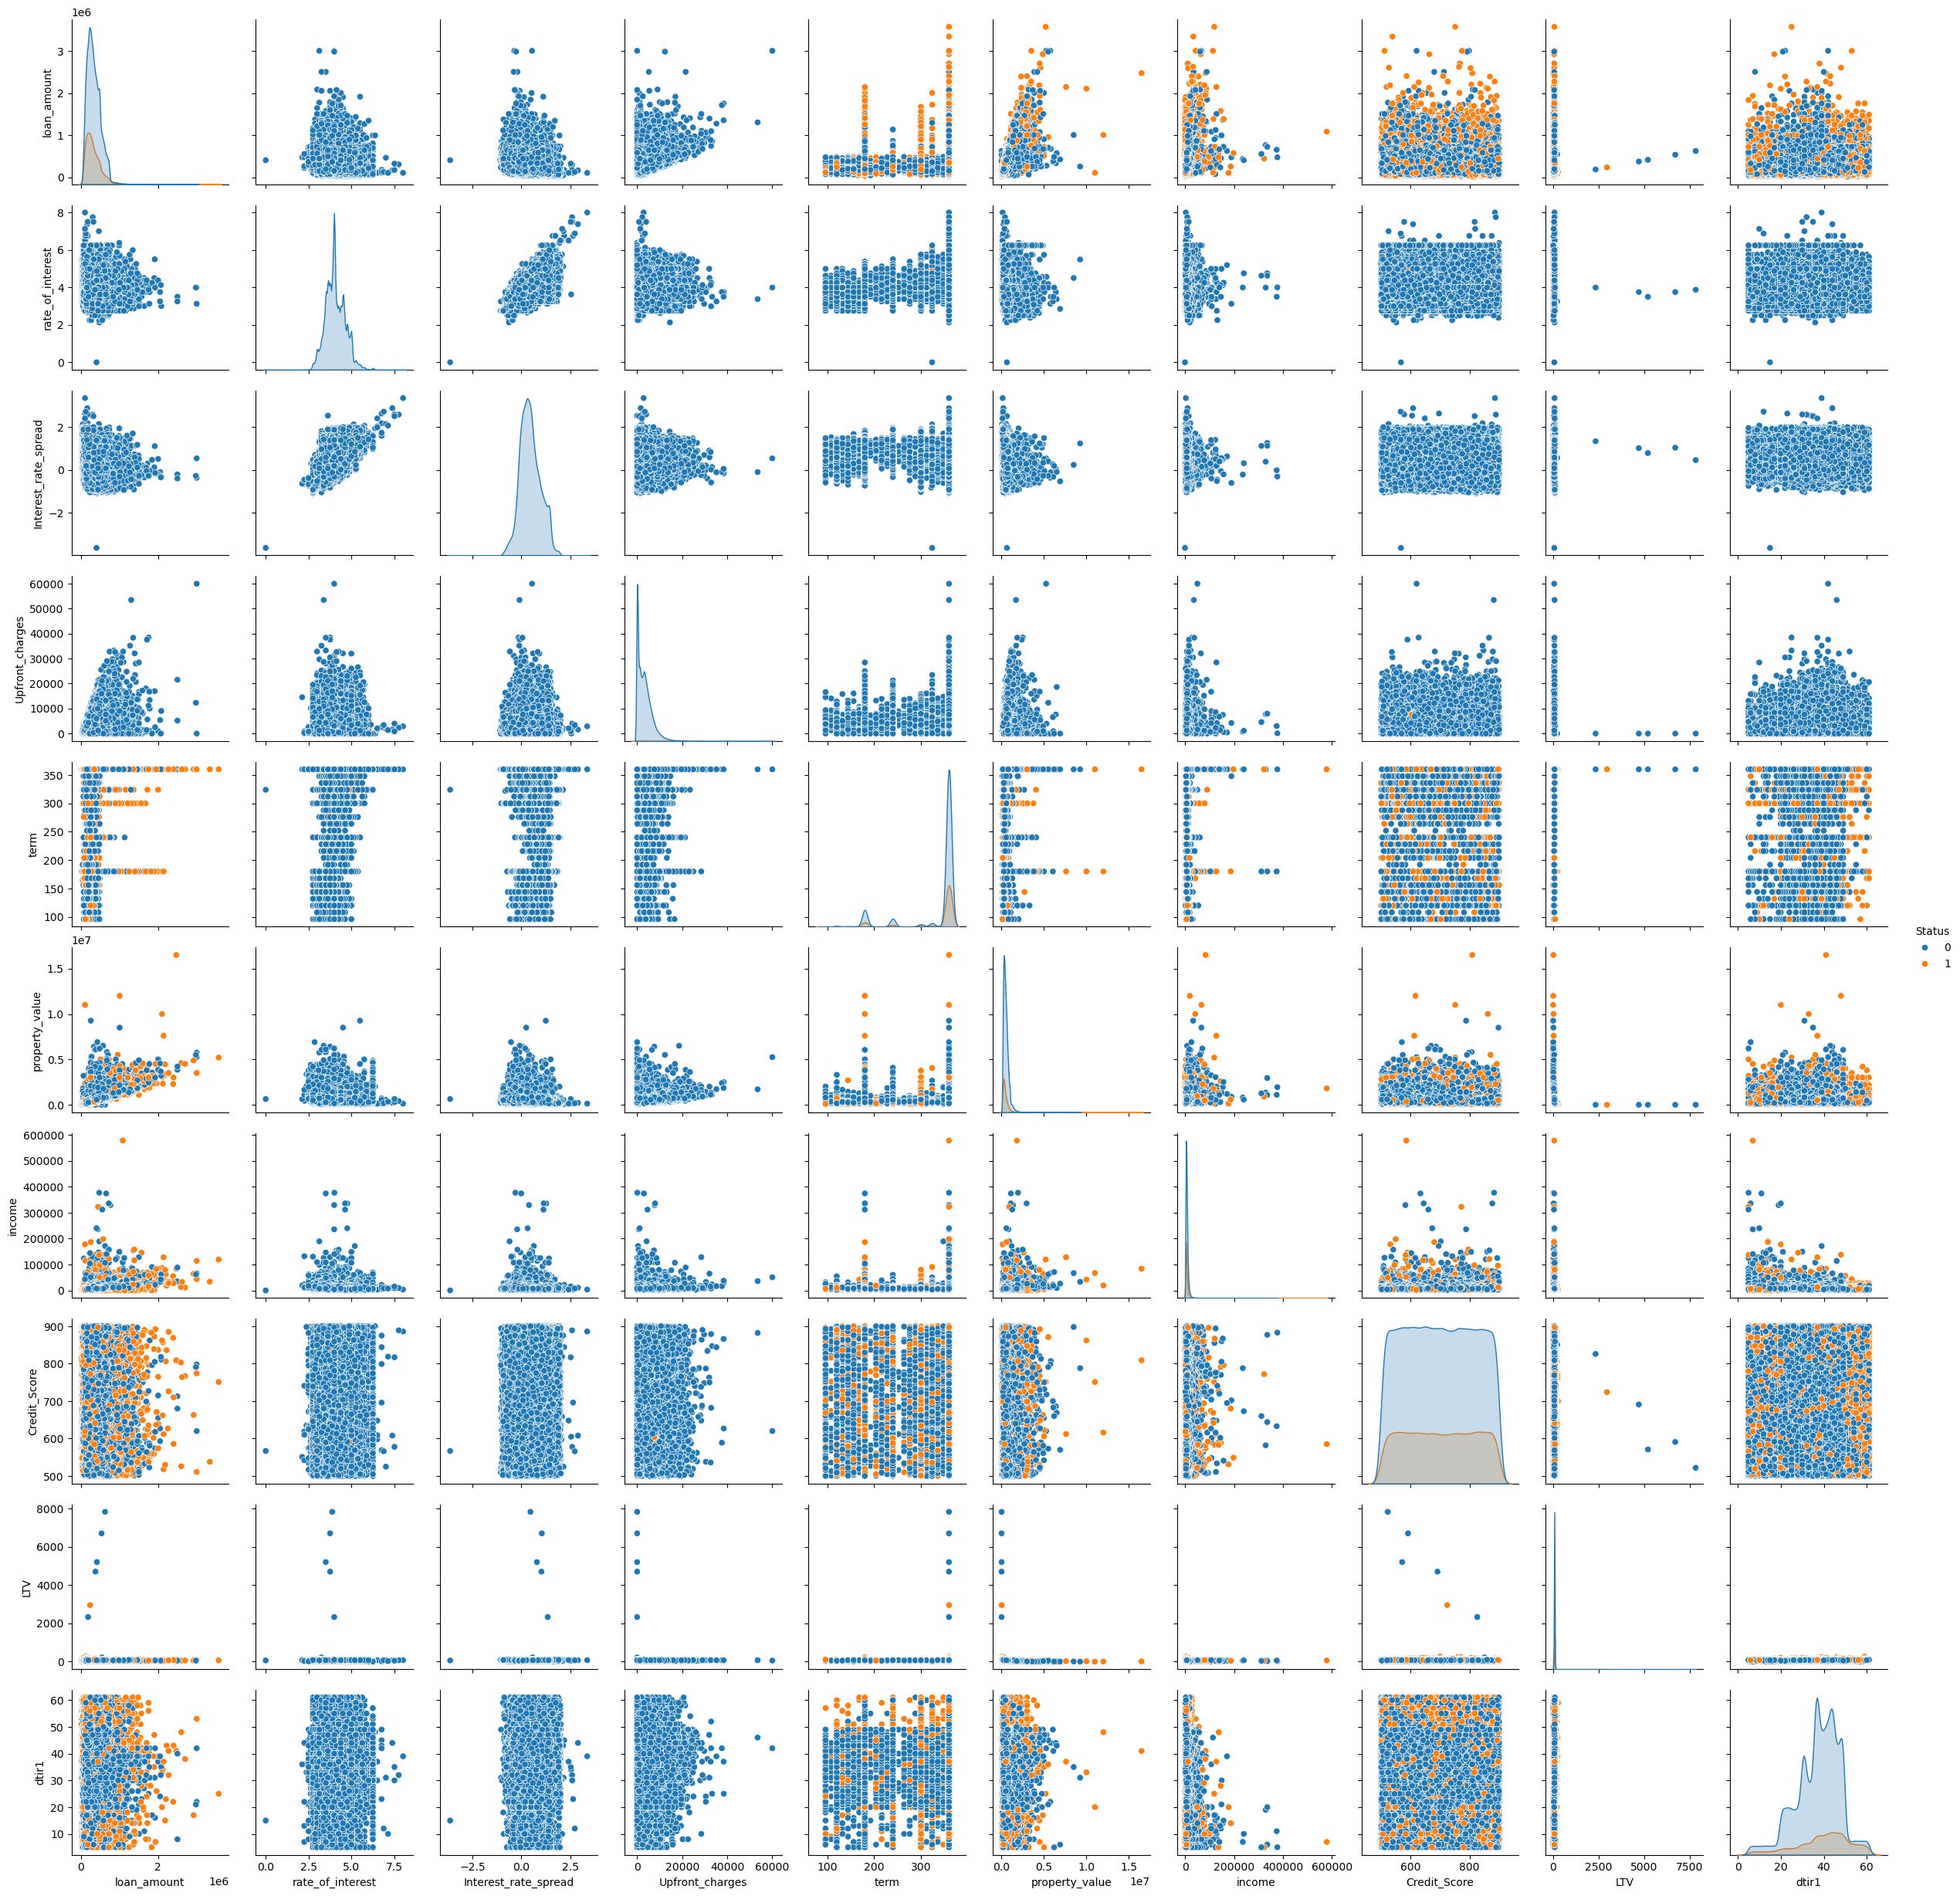

In [15]:
# Понимание взаимосвязи между всеми функциями

sns.pairplot(df, hue='Status')
plt.show()

Диагональные элементы: Они представляют распределение (гистограмму) отдельных переменных, показывая, как каждая переменная распределена по набору данных.
Попарные отношения: недиагональные графики показывают точечные диаграммы между парами переменных. Эти графики могут помочь выявить любые линейные или нелинейные взаимосвязи между переменными.
Например, существует четкая положительная корреляция между стоимостью недвижимости и доходом.
Разброс процентных ставок, по-видимому, имеет различную взаимосвязь с другими факторами, демонстрируя кластеризацию в определенных областях.
LTV и стоимость недвижимости демонстрируют некоторые закономерности, которые могут указывать на взаимосвязь, хотя она менее ясна.
Резюме: Эта матрица полезна для обнаружения корреляций, закономерностей и потенциальных выбросов среди множества переменных. Некоторые переменные, такие как стоимость недвижимости и доход, демонстрируют положительные корреляции, в то время как другие имеют более сложные или более слабые взаимосвязи.

**Вывод** Образцы данных по большинству признаков демонстрируют некоторые закономерности. Кроме того, они, по-видимому,сильно пересекаются по классам результатов, что затрудняет их различение. 

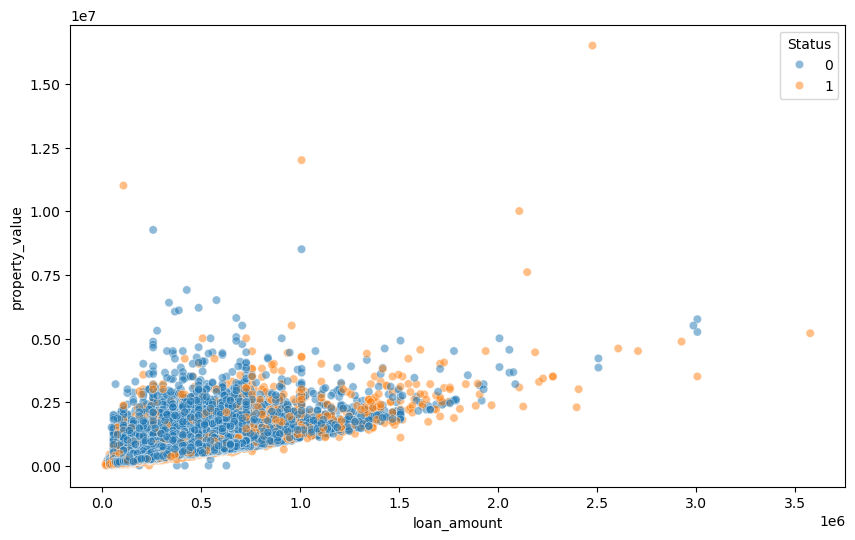

In [16]:
sns.scatterplot(data=df, x='loan_amount', y='property_value', hue='Status', alpha=0.5)
plt.show()

Этот точечный график показывает взаимосвязь между суммой кредита и стоимостью имущества в зависимости от статуса кредита (просроченный или не просроченный).:

Корреляция: Существует сильная положительная корреляция между суммой кредита и стоимостью имущества как по просроченным, так и по не просроченным кредитам. С увеличением суммы кредита увеличивается и стоимость имущества.

Кредиты без просрочек по сравнению с просроченными:

Кредиты без просрочек: Представленные оранжевыми точками, эти кредиты распределены по всему диапазону сумм кредитов и стоимости имущества, особенно по более высоким значениям.
Просроченные кредиты: Представленные синими точками, эти кредиты в большей степени сосредоточены на более низкой стоимости имущества и суммах кредитов, но по-прежнему наблюдается значительное количество просрочек по всему диапазону.

Резюме: Невозвратные кредиты обычно связаны с более высокой стоимостью имущества и суммами кредитов, в то время как невозвратные кредиты чаще встречаются в более низких диапазонах. Однако существует значительное совпадение, указывающее на то, что дефолты могут возникать в широком диапазоне сумм кредитов и стоимости имущества.

---

# <center> 3. Предварительная обработка данных

## <center> Опечатки

In [17]:
# правильность написания категориальных переменных
for col in df.columns:
    if df[col].dtype == "object":
        print(f"Unique values in {col} column are: {df[col].unique().tolist()}\n")

Unique values in loan_limit column are: ['cf', nan, 'ncf']

Unique values in Gender column are: ['Sex Not Available', 'Male', 'Joint', 'Female']

Unique values in approv_in_adv column are: ['nopre', 'pre', nan]

Unique values in loan_type column are: ['type1', 'type2', 'type3']

Unique values in loan_purpose column are: ['p1', 'p4', 'p3', 'p2', nan]

Unique values in Credit_Worthiness column are: ['l1', 'l2']

Unique values in open_credit column are: ['nopc', 'opc']

Unique values in business_or_commercial column are: ['nob/c', 'b/c']

Unique values in Neg_ammortization column are: ['not_neg', 'neg_amm', nan]

Unique values in interest_only column are: ['not_int', 'int_only']

Unique values in lump_sum_payment column are: ['not_lpsm', 'lpsm']

Unique values in construction_type column are: ['sb', 'mh']

Unique values in occupancy_type column are: ['pr', 'sr', 'ir']

Unique values in Secured_by column are: ['home', 'land']

Unique values in total_units column are: ['1U', '2U', '3U', '4U

Допустимы все категории, за исключением опечатки в столбце Security_Type . Indirect записывается как Indriect и изменяет значения в столбце occupancy_type .

In [18]:
df['Security_Type'] = df['Security_Type'].replace({'Indriect':'Indirect'}) 

Проверка, равен ли столбец LTV loan_amount , деленному на property_value , умноженному на 100

In [19]:
# Удаление всех повторяющихся строк (если таковые имеются)

counter = 0
r,c = original_df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mВывод:\033[0m Вывод: В наборе данных нет дубликатов')
else:
    print(f'\n\033[1mВывод:\033[0m Количество удаленных дубликатов ---> {r-df1.shape[0]}')


Вывод: Вывод: В наборе данных нет дубликатов


In [20]:
# Проверьте наличие пустых элементов

nvc = pd.DataFrame(df1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df1.shape[0],3)*100
nvc.reset_index().T

0                         1            2   \
index              lump_sum_payment  co-applicant_credit_type  total_units   
Total Null Values                 0                         0            0   
Percentage                      0.0                       0.0          0.0   

                           3               4                  5       6   \
index              Secured_by  occupancy_type  construction_type  Status   
Total Null Values           0               0                  0       0   
Percentage                0.0             0.0                0.0     0.0   

                              7            8       9             10  \
index              interest_only  credit_type  Region  Credit_Score   
Total Null Values              0            0       0             0   
Percentage                   0.0          0.0     0.0           0.0   

                            11                      12           13  \
index              loan_amount  business_or_commercial  open_credit   
Total Null Values            0                       0            0   
Percentage                 0.0                     0.0          0.0   

                                  14         15      16             17    18  \
index              Credit_Worthiness  loan_type  Gender  Security_Type  term   
Total Null Values                  0          0       0              0    41   
Percentage                       0.0        0.0     0.0            0.0   0.0   

                                  19            20   21  \
index              Neg_ammortization  loan_purpose  age   
Total Null Values                121           134  200   
Percentage                       0.1           0.1  0.1   

                                          22             23          24  \
index              submission_of_application  approv_in_adv  loan_limit   
Total Null Values                        200            908        3344   
Percentage                               0.1            0.6         2.2   

                       25              26     27     28                29  \
index              income  property_value    LTV  dtir1  rate_of_interest   
Total Null Values    9150           15098  15098  24121             36439   
Percentage            6.2            10.2   10.2   16.2              24.5   

                                     30               31  
index              Interest_rate_spread  Upfront_charges  
Total Null Values                 36639            39642  
Percentage                         24.6             26.7

## <center> Пропущенные значения

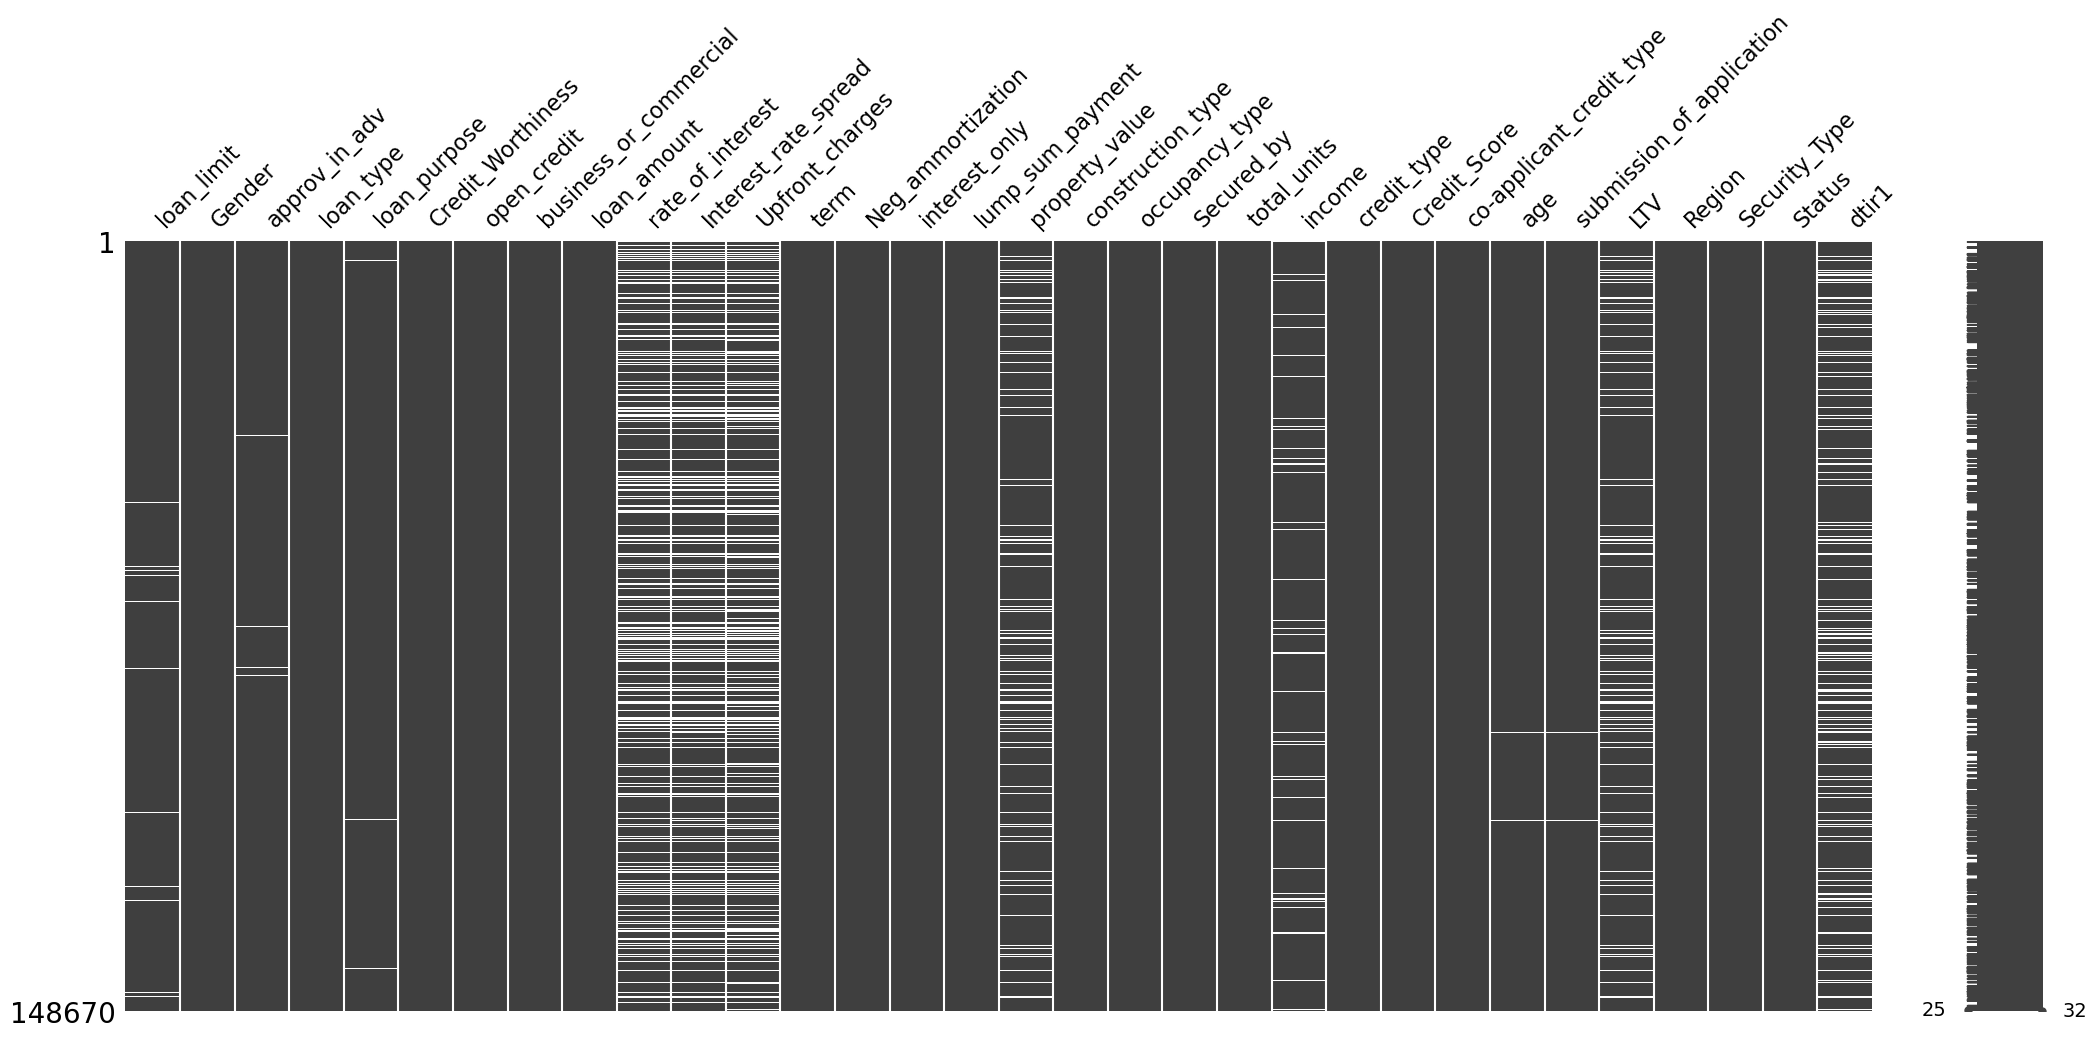

<Figure size 1500x900 with 0 Axes>

In [21]:
# график пропущенных значений
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

<Axes: >

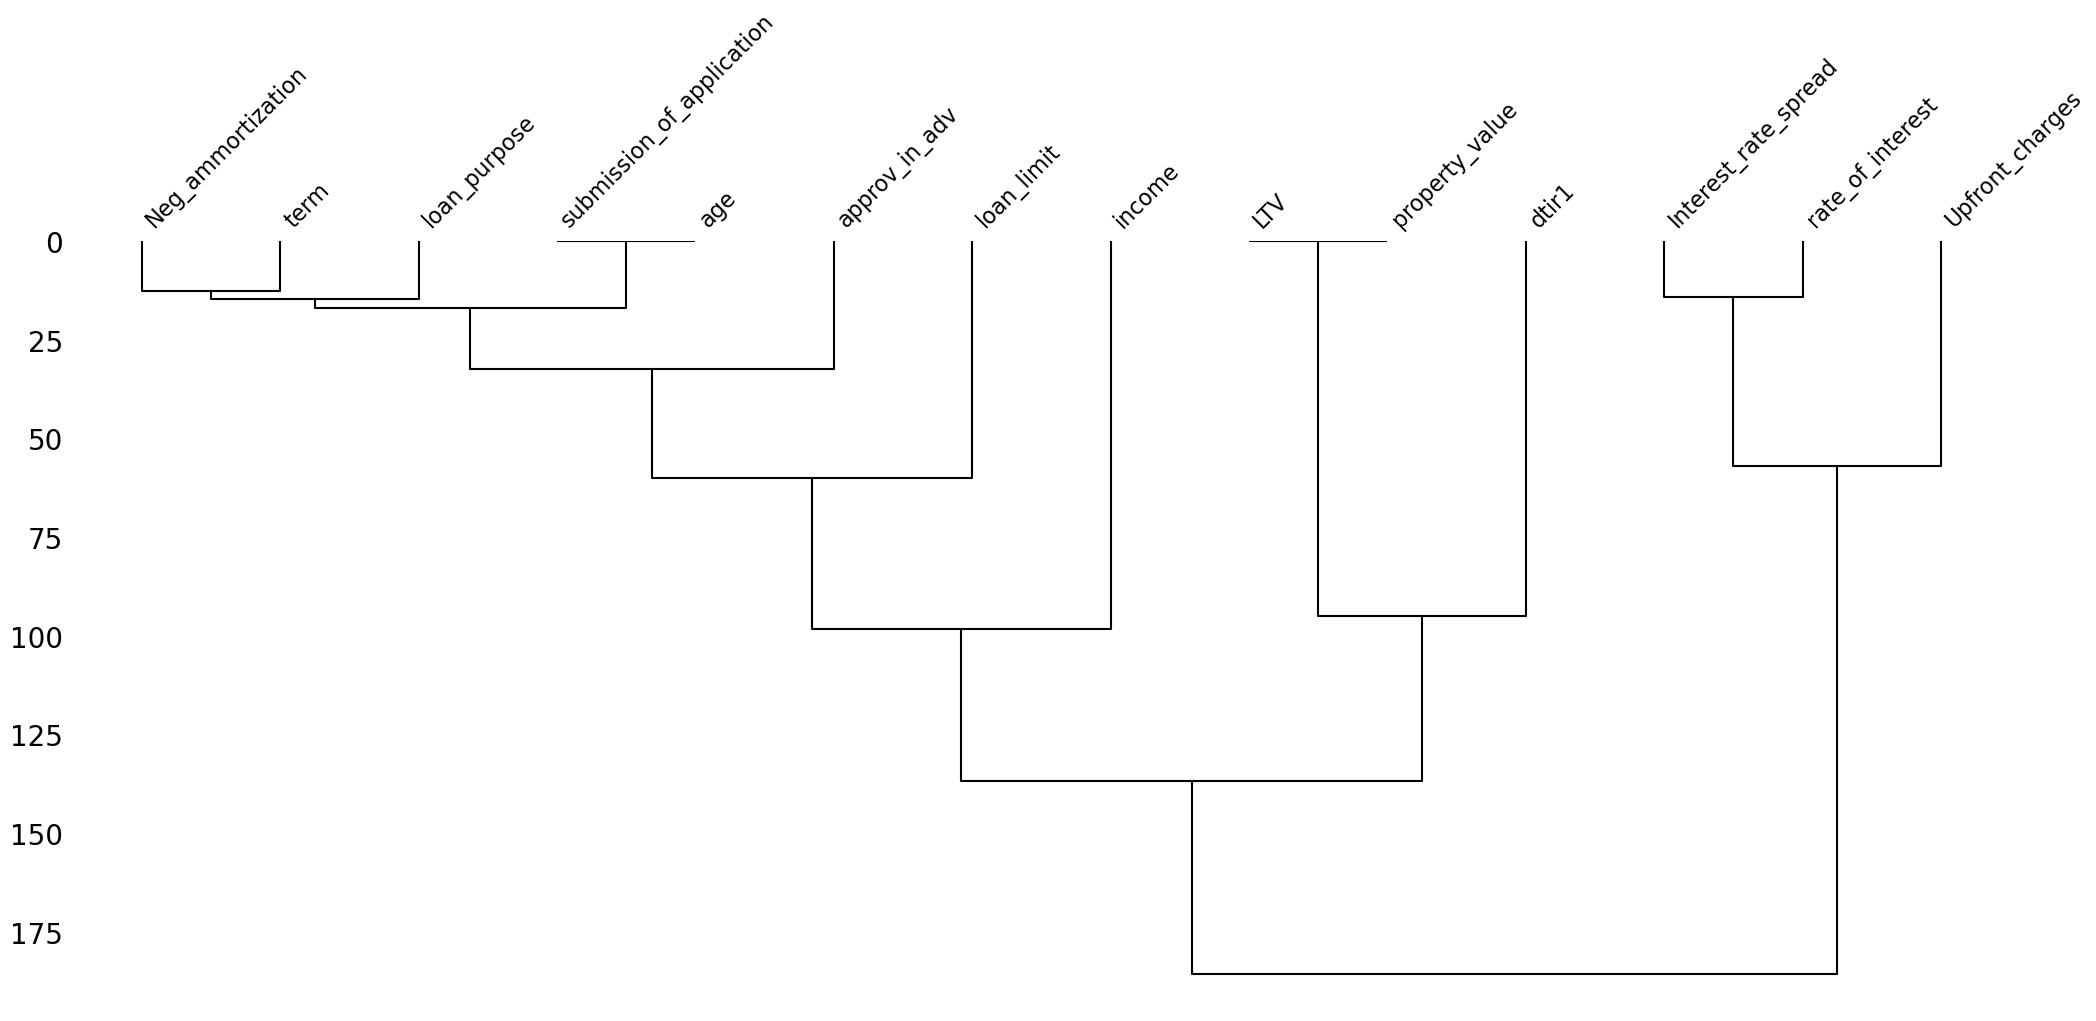

In [22]:
# Столбцы, содержащие пропущенные значения
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
# дендограмма
msno.dendrogram(df[missing_columns])

In [22]:
# проверим взаивосвязь пропусков с целевой переменной
df['nans'] = df.isnull().any(axis=1).astype(int)
accuracy = df['nans'] == df['Status']
print(np.mean([np.mean(accuracy[df['Status'] == i]) for i in range(2)]))
print([np.mean(accuracy[df['Status'] == i]) for i in range(2)])

0.9382135301836099
[0.8764270603672197, 1.0]


Похоже что в данных есть зависимоть между целевой переменной и пропусками. Мы не будем добавлять новый столбец в обучение моделей, так как есть вопросы к составленному датасету.

Мы будем предпологать что данной зависимости нет и исходить из других факторов влияющих на уход плательщика в дефолт

In [ ]:
df.drop('nans', axis=1, inplace=True)

**Вывод:** В данных довольно много пропусков. Давайте попробуем заполнить пропущенные значения.

In [23]:
from sklearn.impute import SimpleImputer

for i in nf:
    SI = SimpleImputer(strategy='mean')
    df[i] = SI.fit_transform(df[[i]])
    
for i in cf:
    SI = SimpleImputer(strategy='most_frequent')
    # выберите первый столбец (который представляет собой одномерный массив).
    df[i] = SI.fit_transform(df[[i]])[:, 0]

In [24]:
# Преобразование категориальных столбцов в числовые

df1 = df.copy()
ecc = nvc[nvc['Percentage'] != 0].index.values
dcc = [i for i in df.columns if i not in ecc]

# Целевая переменная
MAP={}
for i,e in enumerate(df1[target].unique()):
    MAP[e] = i
df1[target] = df1[target].map(MAP)
print('Отображение целевой переменной --->',MAP)

df3 = df1[dcc]
fcc = [i for i in cf if i not in ecc]

#One-Hot Binay Encoding
oh = True
dm = True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1m\nОднократное кодирование функций:\033[0m")
        print(i); oh = False
        df3[i] = pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique() > 2 and df3[i].nunique()<17):
        if dm == True: print("\n\033[1mФиктивное кодирование объектов:\033[0m")
        print(i); dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

Отображение целевой переменной ---> {1: 0, 0: 1}

Однократное кодирование функций:
co-applicant_credit_type
Secured_by
construction_type
Security_Type
interest_only
lump_sum_payment
business_or_commercial
open_credit
Credit_Worthiness

Фиктивное кодирование объектов:
loan_type
occupancy_type
Region
Gender
total_units
credit_type


(148670, 29)

## <center> Удаление выбросов

In [25]:
# Удаление выброса:
df4 = df3.copy()

for i in [i for i in df4.columns]:
    if df4[i].nunique() >= 12:
        Q1 = df4[i].quantile(0.2)
        Q3 = df4[i].quantile(0.8)
        IQR = Q3 - Q1
        df4 = df4[df4[i] <= (Q3+(1.5 * IQR))]
        df4 = df4[df4[i] >= (Q1-(1.5 * IQR))]
df4 = df4.reset_index(drop=True)
display(df4.head())
print('\n\033[1mВывод:\033[0m До удаления выбросов набор данных содержал {} выборок.'.format(df1.shape[0]))
print('\033[1mВывод:\033[0m После удаления выбросов в наборе данных теперь есть {} выборки.'.format(df4.shape[0]))

Credit_Worthiness  open_credit  business_or_commercial  loan_amount   term  \
0              False        False                    True     116500.0  360.0   
1              False        False                   False     206500.0  360.0   
2              False        False                    True     406500.0  360.0   
3              False        False                    True     456500.0  360.0   
4              False        False                    True     696500.0  360.0   

   interest_only  lump_sum_payment  construction_type  Secured_by  \
0           True              True               True       False   
1           True             False               True       False   
2           True              True               True       False   
3           True              True               True       False   
4           True              True               True       False   

   Credit_Score  co-applicant_credit_type  Security_Type  Status  \
0         758.0                     False           True       0   
1         552.0                      True           True       0   
2         834.0                     False           True       1   
3         587.0                     False           True       1   
4         602.0                      True           True       1   

   loan_type_type2  loan_type_type3  occupancy_type_pr  occupancy_type_sr  \
0            False            False               True              False   
1             True            False               True              False   
2            False            False               True              False   
3            False            False               True              False   
4            False            False               True              False   

   Region_North-East  Region_central  Region_south  Gender_Joint  Gender_Male  \
0              False           False          True         False        False   
1              False           False         False         False         True   
2              False           False          True         False         True   
3              False           False         False         False         True   
4              False           False         False          True        False   

   Gender_Sex Not Available  total_units_2U  total_units_3U  total_units_4U  \
0                      True           False           False           False   
1                     False           False           False           False   
2                     False           False           False           False   
3                     False           False           False           False   
4                     False           False           False           False   

   credit_type_CRIF  credit_type_EQUI  credit_type_EXP  
0             False             False             True  
1             False              True            False  
2             False             False             True  
3             False             False             True  
4              True             False            False


Вывод: До удаления выбросов набор данных содержал 148670 выборок.
Вывод: После удаления выбросов в наборе данных теперь есть 120695 выборки.


## <center> Исправление дисбаланса

In [26]:
# Исправление дисбаланса с помощью техники SMOTE 
df5 = df4.copy()

print('Original class distribution:')
print(df5[target].value_counts())

xf = df5.columns
X = df5.drop([target],axis=1)
Y = df5[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
Status
1    91699
0    28996
Name: count, dtype: int64

Class distribution after applying SMOTE Technique:
Status
0    91699
1    91699
Name: count, dtype: int64


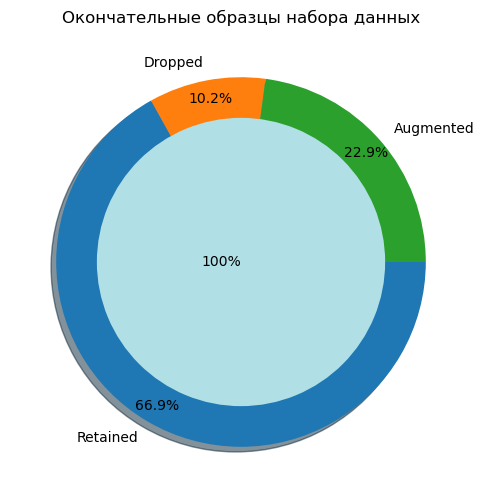


Вывод:Окончательный набор данных после очистки содержит 183398 выборки и 29 столбцы.


In [27]:
# Окончательный размер набора данных после выполнения предварительной обработки

df = df5.copy()
plt.title('Окончательные образцы набора данных')
plt.pie([df.shape[0], original_df.shape[0] - df4.shape[0], df5.shape[0] - df4.shape[0]], radius=1, shadow=True,
        labels=['Retained', 'Dropped', 'Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0, 0, 0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mВывод:\033[0mОкончательный набор данных после очистки содержит {} выборки и {} столбцы.'.format(df.shape[0], df.shape[1]))

---

# <center> 4. Преобразование данных

In [28]:
# Разделение вводных данных на обучающие и тестовые наборы

df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Начальный набор ---> ',X.shape, Y.shape, '\nОбучающий набор ---> ', Train_X.shape, Train_Y.shape, '\nТестовый набор ---> ', Test_X.shape, Test_Y.shape)

Начальный набор --->  (183398, 28) (183398,) 
Обучающий набор --->  (146718, 28) (146718,) 
Тестовый набор --->  (36680, 28) (36680,)


In [29]:
#Масштабирование объектов (стандартизация)
# z = (x - μ) / σ
# 𝑥 — оригинальное значение,
# μ — среднее значение признака,
# σ — стандартное отклонение признака.

std = StandardScaler()

print('\033[1mСтандартизация тренировочного набора'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mСтандартизация на тестовом наборе'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                              Стандартизация тренировочного набора                              


Credit_Worthiness   open_credit  business_or_commercial   loan_amount  \
count       1.467180e+05  1.467180e+05            1.467180e+05  1.467180e+05   
mean       -1.317273e-17  6.780080e-18           -7.373337e-17  2.127492e-16   
std         1.000003e+00  1.000003e+00            1.000003e+00  1.000003e+00   
min        -2.028396e-01 -6.958521e-02           -2.612063e+00 -1.849775e+00   
25%        -2.028396e-01 -6.958521e-02            3.828391e-01 -7.391883e-01   
50%        -2.028396e-01 -6.958521e-02            3.828391e-01 -1.497530e-01   
75%        -2.028396e-01 -6.958521e-02            3.828391e-01  6.754565e-01   
max         4.930003e+00  1.437087e+01            3.828391e-01  3.504746e+00   

           term  interest_only  lump_sum_payment  construction_type  \
count  146718.0   1.467180e+05      1.467180e+05       1.467180e+05   
mean        0.0   2.529939e-16      1.937166e-16       1.027473e-15   
std         0.0   1.000003e+00      1.000003e+00       1.000003e+00   
min         0.0  -5.447466e+00     -7.420474e+00      -7.660104e+01   
25%         0.0   1.835716e-01      1.347623e-01       1.305465e-02   
50%         0.0   1.835716e-01      1.347623e-01       1.305465e-02   
75%         0.0   1.835716e-01      1.347623e-01       1.305465e-02   
max         0.0   1.835716e-01      1.347623e-01       1.305465e-02   

         Secured_by  Credit_Score  co-applicant_credit_type  Security_Type  \
count  1.467180e+05  1.467180e+05              1.467180e+05   1.467180e+05   
mean  -1.297901e-17 -1.370351e-15             -5.104432e-17   1.027473e-15   
std    1.000003e+00  1.000003e+00              1.000003e+00   1.000003e+00   
min   -2.637603e-02 -1.721679e+00             -1.251717e+00  -7.660104e+01   
25%   -2.637603e-02 -8.651015e-01             -1.251717e+00   1.305465e-02   
50%   -2.637603e-02 -7.694177e-03              7.989028e-01   1.305465e-02   
75%   -2.637603e-02  8.708309e-01              7.989028e-01   1.305465e-02   
max    3.791321e+01  1.723517e+00              7.989028e-01   1.305465e-02   

       loan_type_type2  loan_type_type3  occupancy_type_pr  occupancy_type_sr  \
count     1.467180e+05     1.467180e+05       1.467180e+05       1.467180e+05   
mean     -7.361230e-18    -3.545013e-17      -2.782739e-16       3.070408e-17   
std       1.000003e+00     1.000003e+00       1.000003e+00       1.000003e+00   
min      -5.268012e-01    -4.056802e-01      -4.367649e+00      -1.642459e-01   
25%      -5.268012e-01    -4.056802e-01       2.289561e-01      -1.642459e-01   
50%      -5.268012e-01    -4.056802e-01       2.289561e-01      -1.642459e-01   
75%      -5.268012e-01    -4.056802e-01       2.289561e-01      -1.642459e-01   
max       1.898249e+00     2.464996e+00       2.289561e-01       6.088433e+00   

       Region_North-East  Region_central  Region_south  Gender_Joint  \
count       1.467180e+05    1.467180e+05  1.467180e+05  1.467180e+05   
mean       -3.879175e-17   -2.227741e-17  6.334532e-17 -9.162794e-17   
std         1.000003e+00    1.000003e+00  1.000003e+00  1.000003e+00   
min        -1.103149e-01   -2.975324e-01 -1.010593e+00 -6.760359e-01   
25%        -1.103149e-01   -2.975324e-01 -1.010593e+00 -6.760359e-01   
50%        -1.103149e-01   -2.975324e-01  9.895177e-01 -6.760359e-01   
75%        -1.103149e-01   -2.975324e-01  9.895177e-01  1.479211e+00   
max         9.064958e+00    3.360979e+00  9.895177e-01  1.479211e+00   

        Gender_Male  Gender_Sex Not Available  total_units_2U  total_units_3U  \
count  1.467180e+05              1.467180e+05    1.467180e+05    1.467180e+05   
mean  -2.682975e-17             -4.479696e-17    1.288215e-17   -4.610455e-17   
std    1.000003e+00              1.000003e+00    1.000003e+00    1.000003e+00   
min   -7.452865e-01             -6.774382e-01   -1.277225e-01   -6.228603e-02   
25%   -7.452865e-01             -6.774382e-01   -1.277225e-01   -6.228603e-02   
50%   -7.452865e-01             -6.774382e-01   -1.277225e-01   -6.228603e-02 


                                Стандартизация на тестовом наборе                                


Credit_Worthiness   open_credit  business_or_commercial   loan_amount  \
count       36680.000000  36680.000000            36680.000000  36680.000000   
mean            0.010422      0.007184               -0.006221     -0.005348   
std             1.024299      1.050103                1.006904      0.996081   
min            -0.202840     -0.069585               -2.612063     -1.859116   
25%            -0.202840     -0.069585                0.382839     -0.798132   
50%            -0.202840     -0.069585                0.382839     -0.149753   
75%            -0.202840     -0.069585                0.382839      0.675457   
max             4.930003     14.370871                0.382839      3.504746   

          term  interest_only  lump_sum_payment  construction_type  \
count  36680.0   36680.000000      36680.000000       36680.000000   
mean       0.0      -0.008019          0.004173           0.008877   
std        0.0       1.020869          0.984686           0.565722   
min        0.0      -5.447466         -7.420474         -76.601044   
25%        0.0       0.183572          0.134762           0.013055   
50%        0.0       0.183572          0.134762           0.013055   
75%        0.0       0.183572          0.134762           0.013055   
max        0.0       0.183572          0.134762           0.013055   

         Secured_by  Credit_Score  co-applicant_credit_type  Security_Type  \
count  36680.000000  36680.000000              36680.000000   36680.000000   
mean      -0.009827      0.001330                  0.001576       0.008877   
std        0.792226      0.998110                  0.999655       0.565722   
min       -0.026376     -1.721679                 -1.251717     -76.601044   
25%       -0.026376     -0.860380                 -1.251717       0.013055   
50%       -0.026376      0.000919                  0.798903       0.013055   
75%       -0.026376      0.866526                  0.798903       0.013055   
max       37.913214      1.723517                  0.798903       0.013055   

       loan_type_type2  loan_type_type3  occupancy_type_pr  occupancy_type_sr  \
count     36680.000000     36680.000000       36680.000000       36680.000000   
mean          0.009315         0.009269           0.006018          -0.009804   
std           1.006338         1.009470           0.987463           0.970489   
min          -0.526801        -0.405680          -4.367649          -0.164246   
25%          -0.526801        -0.405680           0.228956          -0.164246   
50%          -0.526801        -0.405680           0.228956          -0.164246   
75%          -0.526801        -0.405680           0.228956          -0.164246   
max           1.898249         2.464996           0.228956           6.088433   

       Region_North-East  Region_central  Region_south  Gender_Joint  \
count       36680.000000    36680.000000  36680.000000  36680.000000   
mean            0.002750        0.001991      0.000477      0.001210   
std             1.012248        1.003056      1.000008      1.000499   
min            -0.110315       -0.297532     -1.010593     -0.676036   
25%            -0.110315       -0.297532     -1.010593     -0.676036   
50%            -0.110315       -0.297532      0.989518     -0.676036   
75%            -0.110315       -0.297532      0.989518      1.479211   
max             9.064958        3.360979      0.989518      1.479211   

        Gender_Male  Gender_Sex Not Available  total_units_2U  total_units_3U  \
count  36680.000000              36680.000000    36680.000000    36680.000000   
mean      -0.003780                 -0.003297        0.002439        0.003185   
std        0.998879                  0.998691        1.009359        1.025160   
min       -0.745286                 -0.677438       -0.127723       -0.062286   
25%       -0.745286                 -0.677438       -0.127723       -0.062286   
50%       -0.745286                 -0.677438       -0.127723       -0.062286   
75%   

---

# <center> 5. Извлечение признаков

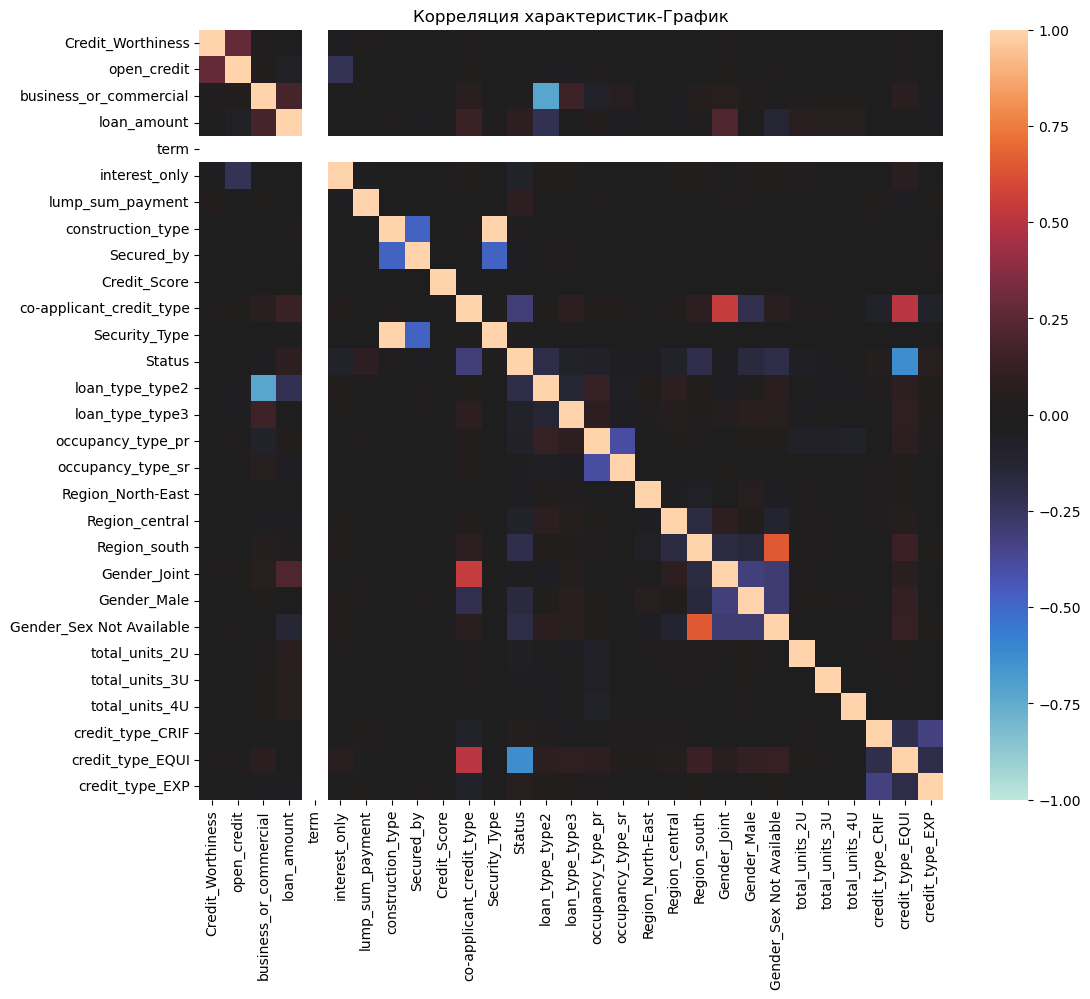

In [30]:
# Проверка корреляции

features = df.columns
plt.figure(figsize=[12,10])
plt.title('Корреляция характеристик-График')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0) #, 
plt.show()

**Вывод:** \
Корреляционная диаграмма между переменными содержит много информации о взаимосвязи между ними. В наборе данных, по-видимому, наблюдается сильная мультиколлинеарность.

Давайте проверим с помощью различных методов, можем ли мы улучшить производительность модели, выполнив этапы отбора/извлечения признаков, чтобы устранить эту мультиколлинеарность...

**Стратегия:** \
Мы можем устранить эту мультиколлинеарность с помощью трех методов:
1. Ручной метод — коэффициент инфляции дисперсии (VIF)
2. Автоматический метод — рекурсивное исключение признаков (RFE)
3. Метод разложения — анализ главных компонент (PCA)

## 5a. Ручной метод - VIF

  0%|                                                    | 0/27 [00:00<?, ?it/s]

[]


  4%|█▋                                          | 1/27 [00:42<18:37, 42.97s/it]

[0.8718710431479497, 0.8718710431479497]
['construction_type']


  7%|███▎                                        | 2/27 [01:25<17:43, 42.56s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term']


 11%|████▉                                       | 3/27 [02:19<19:13, 48.08s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type']


 15%|██████▌                                     | 4/27 [03:06<18:10, 47.43s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment']


 19%|████████▏                                   | 5/27 [03:47<16:33, 45.15s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score']


 22%|█████████▊                                  | 6/27 [04:24<14:52, 42.50s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only']


 26%|███████████▍                                | 7/27 [04:56<12:57, 38.86s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr']


 30%|█████████████                               | 8/27 [05:27<11:35, 36.63s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial']


 33%|██████████████▋                             | 9/27 [05:57<10:19, 34.39s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type']


 37%|███████████████▉                           | 10/27 [06:25<09:12, 32.48s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south']


 41%|█████████████████▌                         | 11/27 [06:46<07:43, 28.94s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south', 'loan_amount']


 44%|███████████████████                        | 12/27 [07:05<06:27, 25.82s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south', 'loan_amount', 'credit_type_EQUI']


 48%|████████████████████▋                      | 13/27 [07:20<05:15, 22.53s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south', 'loan_amount', 'credit_type_EQUI', 'Gender_Male']


 52%|██████████████████████▎                    | 14/27 [07:33<04:16, 19.72s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south', 'loan_amount', 'credit_type_EQUI', 'Gender_Male', 'Gender_Sex Not Available']


 56%|███████████████████████▉                   | 15/27 [07:45<03:30, 17.52s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south', 'loan_amount', 'credit_type_EQUI', 'Gender_Male', 'Gender_Sex Not Available', 'Gender_Joint']


 59%|█████████████████████████▍                 | 16/27 [07:57<02:52, 15.66s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south', 'loan_amount', 'credit_type_EQUI', 'Gender_Male', 'Gender_Sex Not Available', 'Gender_Joint', 'loan_type_type2']


 63%|███████████████████████████                | 17/27 [08:07<02:19, 13.96s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south', 'loan_amount', 'credit_type_EQUI', 'Gender_Male', 'Gender_Sex Not Available', 'Gender_Joint', 'loan_type_type2', 'Credit_Worthiness']


 67%|████████████████████████████▋              | 18/27 [08:14<01:47, 11.90s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south', 'loan_amount', 'credit_type_EQUI', 'Gender_Male', 'Gender_Sex Not Available', 'Gender_Joint', 'loan_type_type2', 'Credit_Worthiness', 'loan_type_type3']


 70%|██████████████████████████████▎            | 19/27 [08:21<01:22, 10.37s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south', 'loan_amount', 'credit_type_EQUI', 'Gender_Male', 'Gender_Sex Not Available', 'Gender_Joint', 'loan_type_type2', 'Credit_Worthiness', 'loan_type_type3', 'Region_central']


 74%|███████████████████████████████▊           | 20/27 [08:26<01:01,  8.84s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south', 'loan_amount', 'credit_type_EQUI', 'Gender_Male', 'Gender_Sex Not Available', 'Gender_Joint', 'loan_type_type2', 'Credit_Worthiness', 'loan_type_type3', 'Region_central', 'credit_type_CRIF']


 78%|█████████████████████████████████▍         | 21/27 [08:31<00:46,  7.72s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south', 'loan_amount', 'credit_type_EQUI', 'Gender_Male', 'Gender_Sex Not Available', 'Gender_Joint', 'loan_type_type2', 'Credit_Worthiness', 'loan_type_type3', 'Region_central', 'credit_type_CRIF', 'credit_type_EXP']


 81%|███████████████████████████████████        | 22/27 [08:32<00:29,  5.83s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south', 'loan_amount', 'credit_type_EQUI', 'Gender_Male', 'Gender_Sex Not Available', 'Gender_Joint', 'loan_type_type2', 'Credit_Worthiness', 'loan_type_type3', 'Region_central', 'credit_type_CRIF', 'credit_type_EXP', 'open_credit']


 85%|████████████████████████████████████▋      | 23/27 [08:33<00:17,  4.37s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south', 'loan_amount', 'credit_type_EQUI', 'Gender_Male', 'Gender_Sex Not Available', 'Gender_Joint', 'loan_type_type2', 'Credit_Worthiness', 'loan_type_type3', 'Region_central', 'credit_type_CRIF', 'credit_type_EXP', 'open_credit', 'Secured_by']


 89%|██████████████████████████████████████▏    | 24/27 [08:34<00:09,  3.25s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south', 'loan_amount', 'credit_type_EQUI', 'Gender_Male', 'Gender_Sex Not Available', 'Gender_Joint', 'loan_type_type2', 'Credit_Worthiness', 'loan_type_type3', 'Region_central', 'credit_type_CRIF', 'credit_type_EXP', 'open_credit', 'Secured_by', 'occupancy_type_sr']


 96%|█████████████████████████████████████████▍ | 26/27 [08:35<00:01,  1.74s/it]

[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]
['construction_type', 'term', 'Security_Type', 'lump_sum_payment', 'Credit_Score', 'interest_only', 'occupancy_type_pr', 'business_or_commercial', 'co-applicant_credit_type', 'Region_south', 'loan_amount', 'credit_type_EQUI', 'Gender_Male', 'Gender_Sex Not Available', 'Gender_Joint', 'loan_type_type2', 'Credit_Worthiness', 'loan_type_type3', 'Region_central', 'credit_type_CRIF', 'credit_type_EXP', 'open_credit', 'Secured_by', 'occupancy_type_sr', 'Region_North-East']
[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718

100%|███████████████████████████████████████████| 27/27 [08:35<00:00, 19.09s/it]


[0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497, 0.8718710431479497]


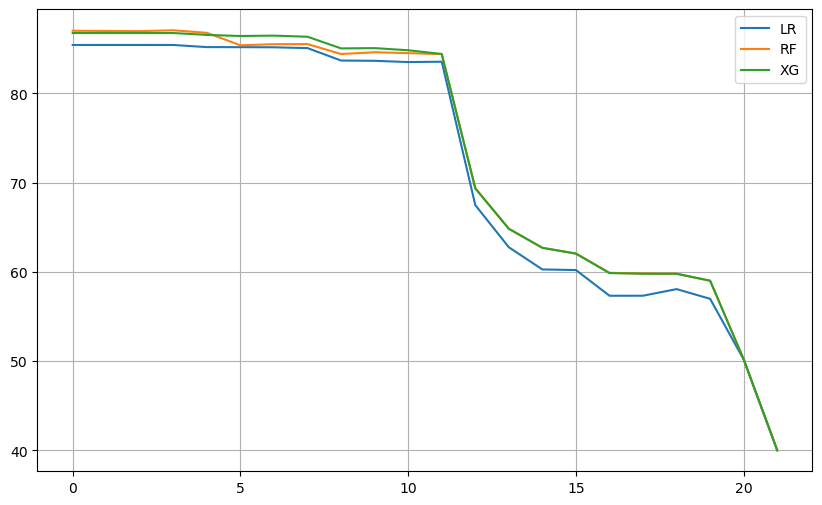

In [31]:
# Вычислите VIFS для устранения мультиколлинеарности

DROP = []; scores = []; scores1 = []; scores2 = []; scores3 = []

scores.append(f1_score(Test_Y, LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std)))
scores1.append(f1_score(Test_Y, LogisticRegression().fit(Train_X_std.drop(DROP, axis=1), Train_Y).predict(Test_X_std.drop(DROP, axis=1)), average='weighted') * 100)

scores2.append(f1_score(Test_Y, RandomForestClassifier().fit(Train_X_std.drop(DROP, axis=1), Train_Y).predict(Test_X_std.drop(DROP, axis=1)), average='weighted') * 100)

scores3.append(f1_score(Test_Y, XGBClassifier().fit(Train_X_std.drop(DROP, axis=1), Train_Y).predict(Test_X_std.drop(DROP, axis=1)), average='weighted') * 100)

for i in tqdm(range(len(X.columns.values) - 1)):
    vif = pd.DataFrame()
    Xs = X.drop(DROP, axis=1)
    print(DROP)
    vif['Features'] = Xs.columns
    vif['VIF'] = [variance_inflation_factor(Xs.values.astype(int), i) for i in range(Xs.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    vif.reset_index(drop=True, inplace=True)
    DROP.append(vif.Features[0])
    if vif.VIF[0]>1:
        scores.append(f1_score(Test_Y, LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std)))
        scores1.append(f1_score(Test_Y, LogisticRegression().fit(Train_X_std.drop(DROP, axis=1), Train_Y).predict(Test_X_std.drop(DROP, axis=1)), average='weighted') * 100)
        scores2.append(f1_score(Test_Y, RandomForestClassifier().fit(Train_X_std.drop(DROP, axis=1), Train_Y).predict(Test_X_std.drop(DROP, axis=1)), average='weighted') * 100)
        scores3.append(f1_score(Test_Y, XGBClassifier().fit(Train_X_std.drop(DROP, axis=1), Train_Y).predict(Test_X_std.drop(DROP, axis=1)), average='weighted') * 100)
    print(scores)
    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
plt.legend()
plt.grid()

## 5b. Автоматический метод - RFE

100%|███████████████████████████████████████████| 28/28 [06:28<00:00, 13.87s/it]


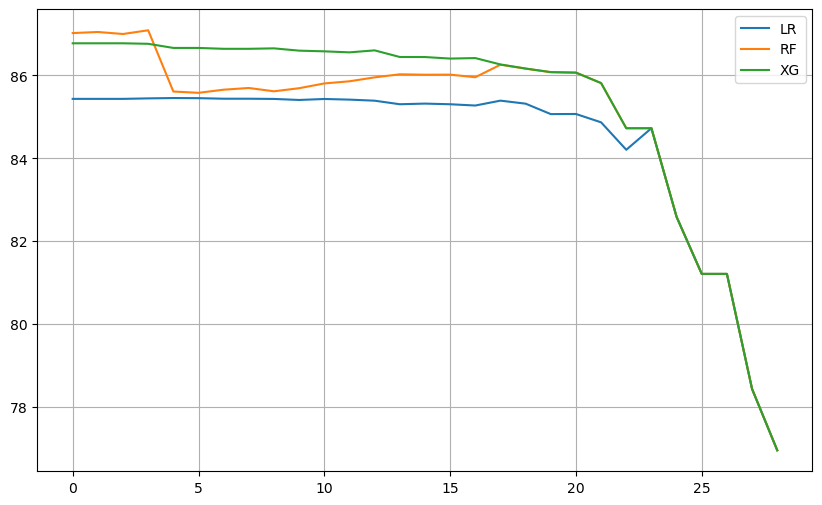

In [32]:
# Применение рекурсивного устранения признаков

# Запуск RFE с выходным значением переменной, равным 10
LR = LogisticRegression()#.fit(Train_X_std, Train_Y)
scores1=[]; scores2=[]; scores3=[]
scores1.append(f1_score(Test_Y, LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std), average='weighted') * 100)
scores2.append(f1_score(Test_Y, RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std), average='weighted') * 100)
scores3.append(f1_score(Test_Y, XGBClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std), average='weighted') * 100)

for i in tqdm(range(len(X.columns.values))):
    rfe = RFE(LR, n_features_to_select=len(Train_X_std.columns) - i)   
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores1.append(f1_score(Test_Y, LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]), average='weighted') * 100)
    scores2.append(f1_score(Test_Y, RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]), average='weighted') * 100)
    scores3.append(f1_score(Test_Y, XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]), average='weighted') * 100)
    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
plt.legend()
plt.grid()
plt.show()

## 5c. PCA

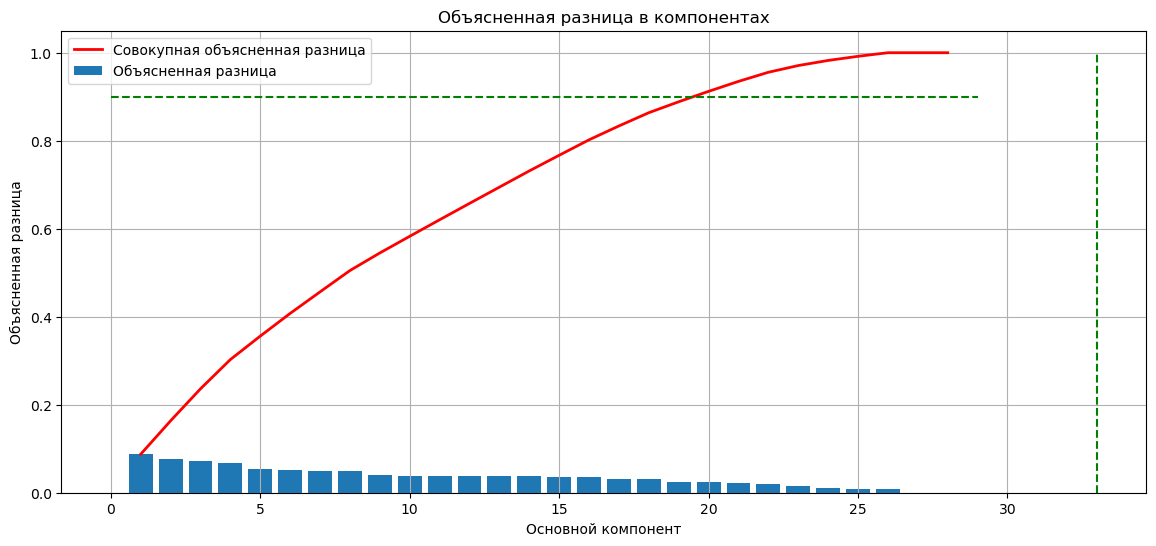

In [33]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca.n_components_ + 1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Объясненная разница')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Совокупная объясненная разница', color='red')
plt.plot([0, pca.n_components_ + 1],[0.90, 0.90], 'g--')
plt.plot([33, 33], [0, 1], 'g--')
ax.set_title('Объясненная разница в компонентах')
ax.set_xlabel('Основной компонент')
ax.set_ylabel('Объясненная разница')
plt.grid()
plt.legend()
plt.show()

**Диаграмма объяснённой дисперсии**

При анализе главных компонент (PCA, Principal Component Analysis). Он показывает, насколько каждая главная компонента (основной компонент) объясняет вариативность (разнообразие) в данных.

**Синие столбцы** — индивидуальная объяснённая дисперсия каждой компоненты. Показывают, сколько информации (вариации в данных) объясняет каждая из компонент по отдельности.
Например, первые 2–3 компоненты объясняют больше всего, остальные дают всё меньше.

**Красная линия** — накопленная (совокупная) объяснённая дисперсия.
Она показывает, сколько всего информации охвачено при добавлении первых N компонент.
Например, по графику видно, что к ~20 компонентам объясняется почти 100% дисперсии.

**Зелёная пунктирная горизонтальная линия** — уровень порога объяснённой дисперсии (например, 90%).
Зелёная пунктирная вертикальная линия — количество компонент, необходимое, чтобы достичь этого порога.

По этому графику видно, что около 20 компонент достаточно, чтобы сохранить 90% информации.
Остальные компоненты (после 20-й) вносят совсем небольшой вклад и могут быть отброшены для упрощения модели.

In [34]:
# Получим компоненты (веса признаков в каждой главной компоненте)
components_df = pd.DataFrame(pca.components_, 
                            columns=Train_X_std.columns  # список названий признаков
                        )

n_components_available = components_df.shape[0]

for i in range(min(3, n_components_available)):
    print(f"\nГлавная компонента {i + 1}")
    display(components_df.iloc[i].sort_values(ascending=False).head(10))


Главная компонента 1


construction_type           0.626190
Security_Type               0.626190
co-applicant_credit_type    0.044263
Gender_Joint                0.031585
loan_amount                 0.031132
credit_type_EQUI            0.031045
business_or_commercial      0.030046
Region_south                0.020098
Gender_Sex Not Available    0.012205
Credit_Worthiness           0.005444
Name: 0, dtype: float64


Главная компонента 2


Gender_Joint                0.449103
co-applicant_credit_type    0.435280
business_or_commercial      0.426618
loan_amount                 0.320940
credit_type_EQUI            0.230013
loan_type_type3             0.158625
occupancy_type_sr           0.081276
total_units_3U              0.040677
Region_central              0.040480
total_units_2U              0.035021
Name: 1, dtype: float64


Главная компонента 3


Gender_Sex Not Available    0.572515
Region_south                0.545000
credit_type_EQUI            0.332065
co-applicant_credit_type    0.316589
loan_type_type2             0.151174
occupancy_type_pr           0.097607
loan_type_type3             0.061991
interest_only               0.058012
Secured_by                  0.019539
Credit_Worthiness           0.008947
Name: 2, dtype: float64

`construction_type` и `Security_Type` — доминирующие. Возможно, они сильно варьируются между наблюдениями и дают наибольший вклад в структурную разницу в данных.
Остальные признаки имеют существенно меньший вклад, но могут добавлять дополнительную дисперсию.

  0%|                                                    | 0/28 [00:00<?, ?it/s]

Форма окончательного преобразованного набора обучающих функций:
(146718, 28)

Форма окончательного преобразованного набора тестовых функций:
(36680, 28)


  4%|█▌                                         | 1/28 [02:08<57:36, 128.02s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 27)

Форма окончательного преобразованного набора тестовых функций:
(36680, 27)


  7%|███                                        | 2/28 [04:16<55:42, 128.54s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 26)

Форма окончательного преобразованного набора тестовых функций:
(36680, 26)


 11%|████▌                                      | 3/28 [06:23<53:09, 127.57s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 25)

Форма окончательного преобразованного набора тестовых функций:
(36680, 25)


 14%|██████▏                                    | 4/28 [08:31<51:04, 127.67s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 24)

Форма окончательного преобразованного набора тестовых функций:
(36680, 24)


 18%|███████▋                                   | 5/28 [10:06<44:28, 116.02s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 23)

Форма окончательного преобразованного набора тестовых функций:
(36680, 23)


 21%|█████████▏                                 | 6/28 [11:43<40:08, 109.48s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 22)

Форма окончательного преобразованного набора тестовых функций:
(36680, 22)


 25%|██████████▊                                | 7/28 [13:21<37:02, 105.85s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 21)

Форма окончательного преобразованного набора тестовых функций:
(36680, 21)


 29%|████████████▎                              | 8/28 [14:57<34:12, 102.63s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 20)

Форма окончательного преобразованного набора тестовых функций:
(36680, 20)


 32%|█████████████▊                             | 9/28 [16:34<31:54, 100.75s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 19)

Форма окончательного преобразованного набора тестовых функций:
(36680, 19)


 36%|███████████████▎                           | 10/28 [18:11<29:53, 99.62s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 18)

Форма окончательного преобразованного набора тестовых функций:
(36680, 18)


 39%|████████████████▉                          | 11/28 [19:40<27:22, 96.61s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 17)

Форма окончательного преобразованного набора тестовых функций:
(36680, 17)


 43%|██████████████████▍                        | 12/28 [21:05<24:47, 92.97s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 16)

Форма окончательного преобразованного набора тестовых функций:
(36680, 16)


 46%|███████████████████▉                       | 13/28 [22:09<21:00, 84.03s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 15)

Форма окончательного преобразованного набора тестовых функций:
(36680, 15)


 50%|█████████████████████▌                     | 14/28 [23:33<19:40, 84.29s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 14)

Форма окончательного преобразованного набора тестовых функций:
(36680, 14)


 54%|███████████████████████                    | 15/28 [24:49<17:43, 81.77s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 13)

Форма окончательного преобразованного набора тестовых функций:
(36680, 13)


 57%|████████████████████████▌                  | 16/28 [25:34<14:07, 70.62s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 12)

Форма окончательного преобразованного набора тестовых функций:
(36680, 12)


 61%|██████████████████████████                 | 17/28 [26:18<11:30, 62.73s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 11)

Форма окончательного преобразованного набора тестовых функций:
(36680, 11)


 64%|███████████████████████████▋               | 18/28 [27:02<09:29, 56.96s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 10)

Форма окончательного преобразованного набора тестовых функций:
(36680, 10)


 68%|█████████████████████████████▏             | 19/28 [28:08<08:56, 59.63s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 9)

Форма окончательного преобразованного набора тестовых функций:
(36680, 9)


 71%|██████████████████████████████▋            | 20/28 [29:13<08:09, 61.18s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 8)

Форма окончательного преобразованного набора тестовых функций:
(36680, 8)


 75%|████████████████████████████████▎          | 21/28 [29:59<06:37, 56.83s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 7)

Форма окончательного преобразованного набора тестовых функций:
(36680, 7)


 79%|█████████████████████████████████▊         | 22/28 [30:48<05:26, 54.35s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 6)

Форма окончательного преобразованного набора тестовых функций:
(36680, 6)


 82%|███████████████████████████████████▎       | 23/28 [31:30<04:13, 50.62s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 5)

Форма окончательного преобразованного набора тестовых функций:
(36680, 5)


 86%|████████████████████████████████████▊      | 24/28 [32:15<03:16, 49.04s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 4)

Форма окончательного преобразованного набора тестовых функций:
(36680, 4)


 89%|██████████████████████████████████████▍    | 25/28 [33:03<02:25, 48.60s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 3)

Форма окончательного преобразованного набора тестовых функций:
(36680, 3)


 93%|███████████████████████████████████████▉   | 26/28 [33:29<01:24, 42.04s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 2)

Форма окончательного преобразованного набора тестовых функций:
(36680, 2)


 96%|█████████████████████████████████████████▍ | 27/28 [33:58<00:38, 38.06s/it]

Форма окончательного преобразованного набора обучающих функций:
(146718, 1)

Форма окончательного преобразованного набора тестовых функций:
(36680, 1)


100%|███████████████████████████████████████████| 28/28 [34:33<00:00, 74.06s/it]


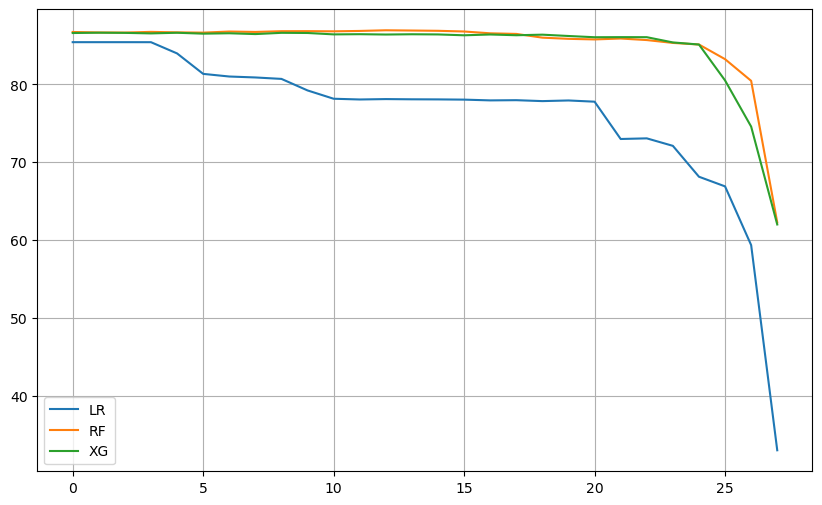

In [35]:
#Применение преобразований PCA

scores1.append(f1_score(Test_Y, LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std), average='weighted') * 100)
scores2.append(f1_score(Test_Y, RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std), average='weighted') * 100)
scores3.append(f1_score(Test_Y, XGBClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std), average='weighted') * 100)

scores1 = []; scores2 = []; scores3 = []
for i in tqdm(range(len(X.columns.values))):
    pca = PCA(n_components=Train_X_std.shape[1] - i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    print('Форма окончательного преобразованного набора обучающих функций:')
    print(Train_X_std_pca.shape)
    Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

    Test_X_std_pca = pca.transform(Test_X_std)
    print('\nФорма окончательного преобразованного набора тестовых функций:')
    print(Test_X_std_pca.shape)
    Test_X_std_pca = pd.DataFrame(Test_X_std_pca)
    
    scores1.append(f1_score(Test_Y, LogisticRegression().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca), average='weighted') * 100)
    scores2.append(f1_score(Test_Y, RandomForestClassifier().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca), average='weighted') * 100)
    scores3.append(f1_score(Test_Y, XGBClassifier().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca), average='weighted') * 100)

    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
plt.legend()
plt.grid()
plt.show()

**Вывод:** в методах VIF, RFE и PCA мы заметили, что при удалении некоторых мультиколлинеарных признаков результаты улучшились. Но чтобы избежать «проклятия размерности», мы можем зафиксировать 90% дисперсии данных, объясняемой первыми n компонентами PCA.

In [36]:
# Завершаем работу над функциями, включенными в короткий список

rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns) - 10)   # -10
rfe = rfe.fit(Train_X_std, Train_Y)

print(f1_score(Test_Y, LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]), average='weighted') * 100)
print(f1_score(Test_Y, RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]), average='weighted') * 100)
print(f1_score(Test_Y, XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]), average='weighted') * 100)
    
Train_X_std = Train_X_std[Train_X_std.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X_std.columns[rfe.support_]]

print(Train_X_std.shape)
print(Test_X_std.shape)

85.41641332339283
85.83584512490921
86.55643950669756
(146718, 18)
(36680, 18)


---

## Сохраним результат

In [37]:
Train_X_std.to_csv('Train_X_std.csv', index=False)
Test_X_std.to_csv('Test_X_std.csv', index=False)
Train_Y.to_csv('Train_Y.csv', index=False)
Test_Y.to_csv('Test_Y.csv', index=False)

Train_X.to_csv('Train_X.csv', index=False)
Test_X.to_csv('Test_X.csv', index=False)

In [38]:
Train_X_std = pd.read_csv('Train_X_std.csv')
Test_X_std = pd.read_csv('Test_X_std.csv')
Train_Y = pd.read_csv('Train_Y.csv')
Test_Y = pd.read_csv('Test_Y.csv')

Train_X = pd.read_csv('Train_X.csv')
Test_X = pd.read_csv('Test_X.csv')

---

# <center> 6. Моделирование

---

In [39]:
# Преобразование данных в numpy-массивы (для самописных моделей)
Train_X_num = Train_X_std.values
Train_Y_num = Train_Y.values.ravel()
Test_X_num = Test_X_std.values
Test_Y_num = Test_Y.values.ravel()

In [40]:
# Давайте сначала создадим таблицу для хранения результатов различных моделей

Evaluation_Results = pd.DataFrame(np.zeros((11, 5)), columns=['Accuracy', 'Precision',
                                                            'Recall', 'F1-score',
                                                            'AUC-ROC score'])
Evaluation_Results.index=['OneRule Classifier (OR)',
                        'Logistic Regression (LR)',
                        'Decision Tree Classifier (DT)',
                        'Random Forest Classifier (RF)',
                        'Naïve Bayes Classifier (NB)',
                        'Support Vector Machine (SVM)',
                        'K Nearest Neighbours (KNN)',
                        'Gradient Boosting (GB)',
                        'Extreme Gradient Boosting (XGB)',
                        'BaggingClassifier (BC)',
                        'MLPClassifier (MLP)'
                        ]
Evaluation_Results

Accuracy  Precision  Recall  F1-score  \
OneRule Classifier (OR)               0.0        0.0     0.0       0.0   
Logistic Regression (LR)              0.0        0.0     0.0       0.0   
Decision Tree Classifier (DT)         0.0        0.0     0.0       0.0   
Random Forest Classifier (RF)         0.0        0.0     0.0       0.0   
Naïve Bayes Classifier (NB)           0.0        0.0     0.0       0.0   
Support Vector Machine (SVM)          0.0        0.0     0.0       0.0   
K Nearest Neighbours (KNN)            0.0        0.0     0.0       0.0   
Gradient Boosting (GB)                0.0        0.0     0.0       0.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   
BaggingClassifier (BC)                0.0        0.0     0.0       0.0   
MLPClassifier (MLP)                   0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
OneRule Classifier (OR)                    0.0  
Logistic Regression (LR)                   0.0  
Decision Tree Classifier (DT)              0.0  
Random Forest Classifier (RF)              0.0  
Naïve Bayes Classifier (NB)                0.0  
Support Vector Machine (SVM)               0.0  
K Nearest Neighbours (KNN)                 0.0  
Gradient Boosting (GB)                     0.0  
Extreme Gradient Boosting (XGB)            0.0  
BaggingClassifier (BC)                     0.0  
MLPClassifier (MLP)                        0.0

In [41]:
# Давайте определим функции для обобщения результатов прогнозирования.

# Функция обобщения результатов классификации
def Classification_Summary(pred,pred_prob, i):
    Evaluation_Results.iloc[i]['Accuracy'] = round(accuracy_score(Test_Y, pred), 3) * 100   
    Evaluation_Results.iloc[i]['Precision'] = round(precision_score(Test_Y, pred, average='weighted'), 3) * 100
    Evaluation_Results.iloc[i]['Recall'] = round(recall_score(Test_Y, pred, average='weighted'), 3) * 100
    Evaluation_Results.iloc[i]['F1-score'] = round(f1_score(Test_Y, pred, average='weighted'), 3) * 100
    Evaluation_Results.iloc[i]['AUC-ROC score'] = round(roc_auc_score(Test_Y, pred_prob[:, 1], multi_class='ovr'), 3) * 100
    print('{}{}\033[1m {} \033[0m{}{}\n'.format('<' * 3, '-' * 25,Evaluation_Results.index[i], '-' * 25, '>' * 3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred), 3) * 100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'), 3) * 100))
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Функция визуализации
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred) * 100, 2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

---

## 1. OneRule Classifier

In [42]:
class OneRuleClassifier:
    def __init__(self, n_bins=5):
        self.n_bins = n_bins  # Количество бинов для дискретизации числовых признаков
        self.best_feature = None  # Лучший признак для классификации
        self.rules = None  # Правила классификации
        self.majority_class = None  # наиболее частый класс
        self.class_counts = None  # Количество объектов каждого класса
        self.feature_value_counts = None  # Распределение значений признаков
        self.classes = None  # Уникальные классы в данных
        
    # Дискретизация числовых признаков
    def _discretize(self, X):
        X_discretized = np.zeros_like(X, dtype=str)  # Создание массива для дискретизированных данных
        for i in range(X.shape[1]):
            if np.issubdtype(X[:, i].dtype, np.number):  # Если признак числовой
                bins = np.linspace(X[:, i].min(), X[:, i].max() + 1e-10, self.n_bins + 1)  # Создание бинов
                X_discretized[:, i] = np.digitize(X[:, i], bins[:-1], right=False).astype(str)  # Дискретизация
            else:
                X_discretized[:, i] = X[:, i].astype(str)  # Категориальные признаки остаются неизменными
        return X_discretized
    
    def fit(self, X, y):
        # Обучение классификатора
        X_discretized = self._discretize(X)  # Дискретизация признаков
        self.classes = np.unique(y)  # Сохранение уникальных классов
        self.class_counts = np.bincount(y)  # Подсчет объектов каждого класса
        self.majority_class = np.argmax(self.class_counts)  # Определение мажоритарного класса
        
        min_error = float('inf')  # Минимальная ошибка (для выбора лучшего признака)
        n_features = X_discretized.shape[1]  # Количество признаков
        self.feature_value_counts = {}  # Инициализация словаря для распределения значений признаков
        
        for feature_idx in tqdm(range(n_features)):  # Перебор всех признаков
            feature_values = np.unique(X_discretized[:, feature_idx])  # Уникальные значения признака
            rules = {}  # Правила для текущего признака
            error = 0  # Ошибки для текущего признака
            value_counts = {}  # Распределение классов для значений признака
            
            for value in feature_values:  # Перебор значений признака
                mask = X_discretized[:, feature_idx] == value  # Маска для текущего значения
                if np.sum(mask) == 0:  # Если значение отсутствует
                    continue
                labels = y[mask]  # Метки классов для текущего значения
                class_counts = np.bincount(labels, minlength=len(self.classes))  # Подсчет классов
                most_frequent_class = np.argmax(class_counts)  # Наиболее частый класс
                rules[value] = most_frequent_class  # Сохранение правила
                value_counts[value] = class_counts  # Сохранение распределения классов
                error += np.sum(labels != most_frequent_class)  # Подсчет ошибок
                
            if error < min_error:  # Если текущий признак лучше
                min_error = error
                self.best_feature = feature_idx  # Сохранение лучшего признака
                self.rules = rules  # Сохранение правил
                self.feature_value_counts = value_counts  # Сохранение распределения значений
        
        if self.rules is None:  # Если правила не созданы
            self.rules = {}
            self.best_feature = None
            self.feature_value_counts = {}

    def predict(self, X):
        # Предсказание классов
        X_discretized = self._discretize(X)  # Дискретизация признаков
        predictions = np.zeros(X.shape[0], dtype=int)  # Инициализация массива предсказаний
        
        if self.best_feature is None:  # Если нет правил, предсказывать мажоритарный класс
            return np.full(X.shape[0], self.majority_class)
        
        for i in range(X.shape[0]):  # Перебор всех объектов
            feature_value = X_discretized[i, self.best_feature]  # Значение лучшего признака
            if feature_value in self.rules:  # Если значение есть в правилах
                predictions[i] = self.rules[feature_value]
            else:
                predictions[i] = self.majority_class  # Иначе предсказывать мажоритарный класс
        
        return predictions
    
    def predict_proba(self, X):
        # Предсказание вероятностей классов
        X_discretized = self._discretize(X)  # Дискретизация признаков
        probabilities = np.zeros((X.shape[0], len(self.classes)))  # Инициализация массива вероятностей
        
        if self.best_feature is None:  # Если нет правил, возвращать равномерные вероятности
            total_count = max(np.sum(self.class_counts), 1e-10)
            default_proba = self.class_counts / total_count
            return np.tile(default_proba, (X.shape[0], 1))
        
        for i in range(X.shape[0]):  # Перебор всех объектов
            feature_value = X_discretized[i, self.best_feature]  # Значение лучшего признака
            if feature_value in self.feature_value_counts:  # Если значение есть в распределении
                class_counts = self.feature_value_counts[feature_value]
                total_count = max(np.sum(class_counts), 1e-10)
                probabilities[i] = class_counts / total_count
            else:
                total_count = max(np.sum(self.class_counts), 1e-10)
                probabilities[i] = self.class_counts / total_count  # Иначе использовать общее распределение классов
        
        return probabilities

100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 195.29it/s]


<<<------------------------- OneRule Classifier (OR) ------------------------->>>

Accuracy = 78.0%
F1 Score = 77.0%

 Confusiton Matrix:
 [[10404  8057]
 [    0 18219]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.56      0.72     18461
           1       0.69      1.00      0.82     18219

    accuracy                           0.78     36680
   macro avg       0.85      0.78      0.77     36680
weighted avg       0.85      0.78      0.77     36680



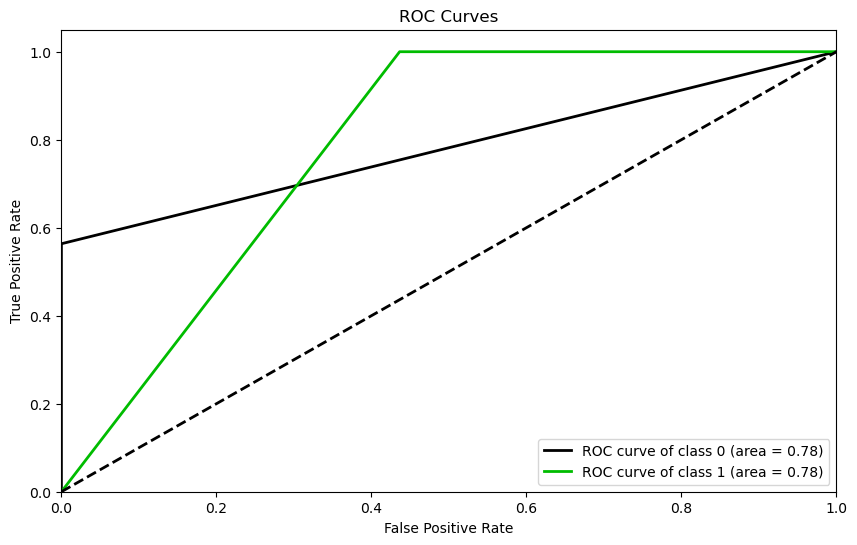

In [43]:
# Инициализация и обучение модели
OR_classifier = OneRuleClassifier()
OR_classifier.fit(Train_X_num, Train_Y_num)

# Предсказание на тестовой выборке
pred_OR = OR_classifier.predict(Test_X_num)

# Проверка вероятностей (predict_proba)
proba_OR = OR_classifier.predict_proba(Test_X_num)

Classification_Summary(pred_OR, proba_OR, 0)

---

## 2. Logistic Regression:

<<<------------------------- Logistic Regression (LR) ------------------------->>>

Accuracy = 85.6%
F1 Score = 85.39999999999999%

 Confusiton Matrix:
 [[13478  4983]
 [  302 17917]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.84     18461
           1       0.78      0.98      0.87     18219

    accuracy                           0.86     36680
   macro avg       0.88      0.86      0.85     36680
weighted avg       0.88      0.86      0.85     36680



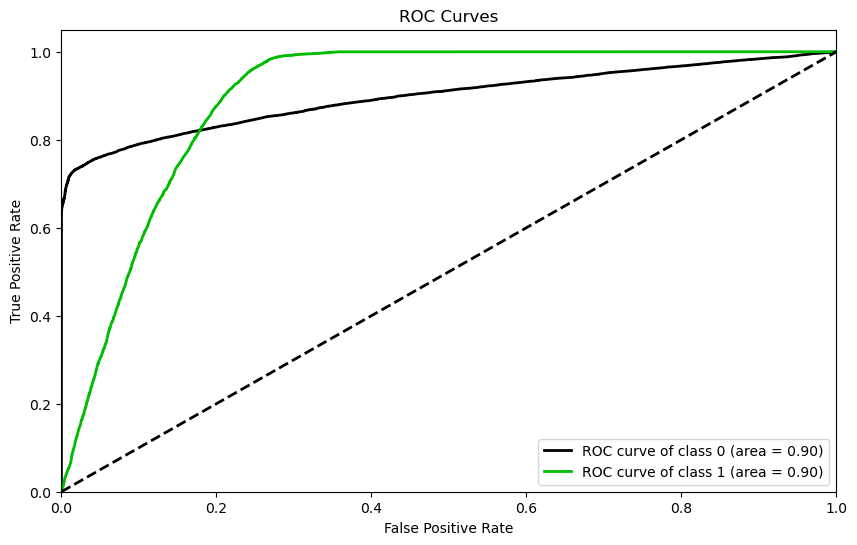


Интерпретация результатов логистической регрессии:



In [44]:
# Построение классификатора логистической регрессии

LR_model = LogisticRegression(C=0.005192484252870098, penalty='l2', solver='newton-cg')

# space = dict()
# space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
# space['penalty'] = ['l2'] #'none', 'l1', 'l2', 'elasticnet'
# space['C'] = loguniform(1e-5, 100)

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)
# RCV.fit(Train_X_std, Train_Y)
# print(RCV.best_params_)

LR = LR_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred, pred_prob, 1)

print('\n\033[1mИнтерпретация результатов логистической регрессии:\n\033[0m')

# print('intercept ', LR.intercept_[0])
# print('classes', LR.classes_)
# display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

---

## 3. Decisoin Tree Classfier:

<<<------------------------- Decision Tree Classifier (DT) ------------------------->>>

Accuracy = 86.3%
F1 Score = 86.1%

 Confusiton Matrix:
 [[13955  4506]
 [  537 17682]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85     18461
           1       0.80      0.97      0.88     18219

    accuracy                           0.86     36680
   macro avg       0.88      0.86      0.86     36680
weighted avg       0.88      0.86      0.86     36680



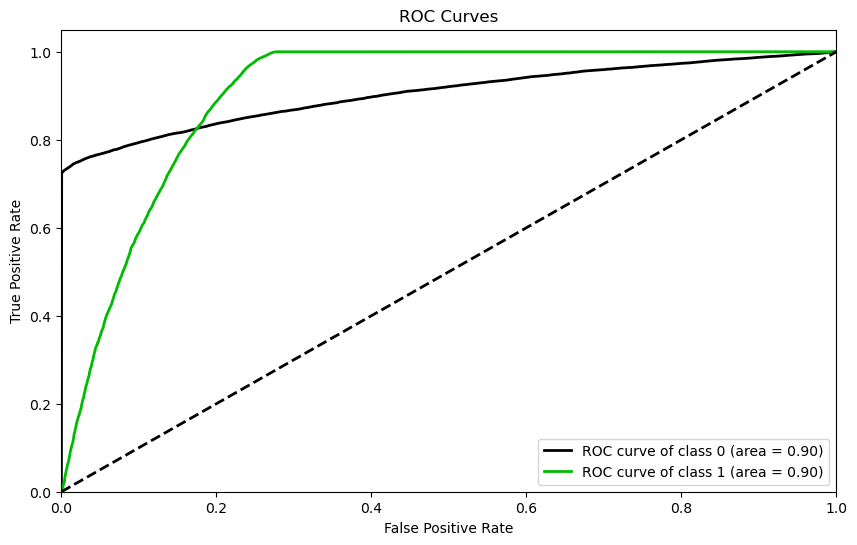

In [45]:
# Построение классификатора дерева решений

DT_model = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features=20, min_samples_leaf=16)

# param_dist = {"max_depth": [3, None],
#               "max_features": randint(1, len(features)-1),
#               "min_samples_leaf": randint(1, len(features)-1),
#               "criterion": ["gini", "entropy"]}

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)
# RCV.fit(Train_X_std, Train_Y)
# print(RCV.best_params_)

DT = DT_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred, pred_prob, 2)

# print('\n\033[1mИнтерпретация выходных данных дерева принятия решений:\n\033[0m')
# tree.plot_tree(DT)
# plt.show()

---

## 4. Random Forest Classfier:

<<<------------------------- Random Forest Classifier (RF) ------------------------->>>

Accuracy = 86.6%
F1 Score = 86.4%

 Confusiton Matrix:
 [[13920  4541]
 [  383 17836]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.85     18461
           1       0.80      0.98      0.88     18219

    accuracy                           0.87     36680
   macro avg       0.89      0.87      0.86     36680
weighted avg       0.89      0.87      0.86     36680



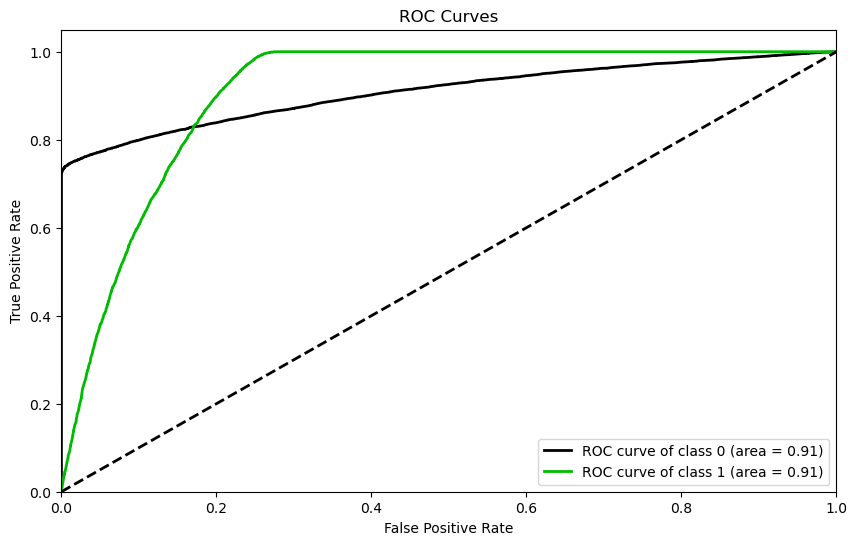


Интерпретация выходных данных случайного леса:



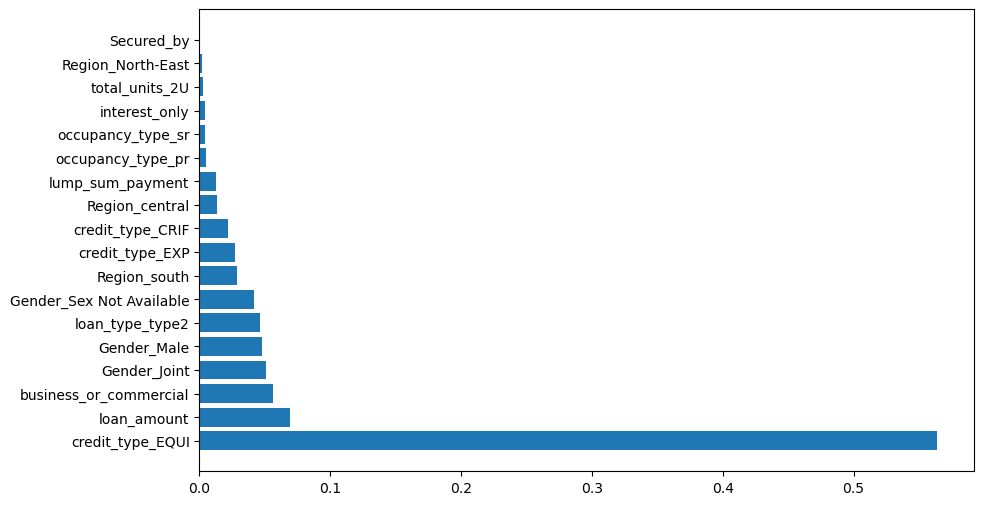

In [46]:
# Построение классификатора случайных лесов

RF_model = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=100, bootstrap=True)

# param_dist={'bootstrap': [True, False],
#             'max_depth': [10, 20, 50, 100, None],
#             'max_features': ['auto', 'sqrt'],
#             'min_samples_leaf': [1, 2, 4],
#             'min_samples_split': [2, 5, 10],
#             'n_estimators': [50, 100]}

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)
# RCV.fit(Train_X_std, Train_Y)
# print(RCV.best_params_)

RF = RF_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred, pred_prob, 3)

print('\n\033[1mИнтерпретация выходных данных случайного леса:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

---

## 5. Naive Bayes Classfier:

<<<------------------------- Naïve Bayes Classifier (NB) ------------------------->>>

Accuracy = 81.8%
F1 Score = 81.5%

 Confusiton Matrix:
 [[12678  5783]
 [  885 17334]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.69      0.79     18461
           1       0.75      0.95      0.84     18219

    accuracy                           0.82     36680
   macro avg       0.84      0.82      0.82     36680
weighted avg       0.84      0.82      0.82     36680



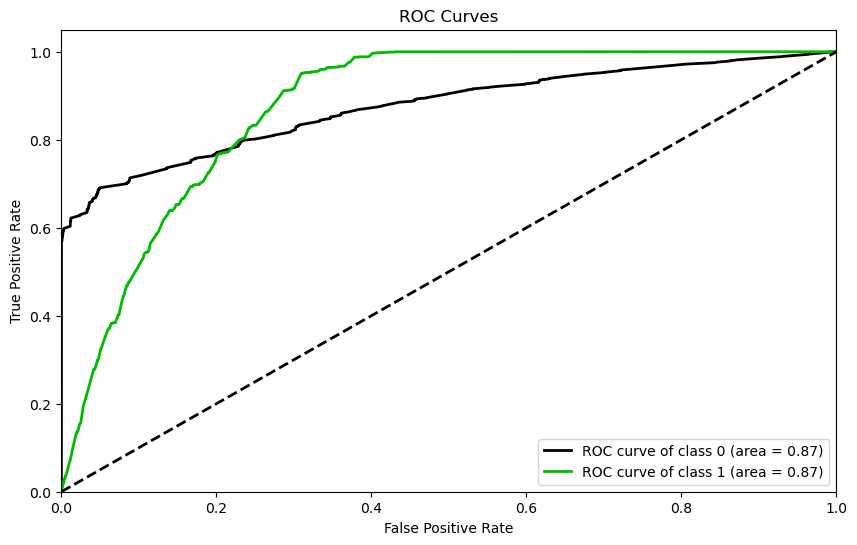

In [47]:
# Построение наивного Байесовского классификатора

NB_model = BernoulliNB(alpha=0.1)

# params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)
# RCV.fit(Train_X_std, Train_Y)
# print(RCV.best_params_)

NB = NB_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred, pred_prob, 4)

---

## 6. Support Vector Machine Classfier:

In [48]:
class SupportVectorMachineClassifier:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, max_iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        
    def _hinge_loss(self, X, y, weights, bias):
        n_samples = X.shape[0]
        distances = y * (np.dot(X, weights) + bias)
        losses = np.maximum(0, 1 - distances)
        return np.sum(losses) / n_samples + 0.5 * self.lambda_param * np.sum(weights ** 2)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Convert labels to {-1, 1}
        y_ = np.where(y == 0, -1, 1)
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        
        # Gradient descent
        for _ in tqdm(range(self.max_iterations)):
            # Compute distances
            distances = y_ * (np.dot(X, self.weights) + self.bias)
            
            # Gradient for weights
            condition = distances < 1  # Where hinge loss is non-zero
            dw = self.lambda_param * self.weights - np.dot(X.T, y_ * condition) / n_samples
            db = -np.sum(y_ * condition) / n_samples
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def predict(self, X):
        # Compute decision function
        decision = np.dot(X, self.weights) + self.bias
        return (decision >= 0).astype(int)
    
    def predict_proba(self, X):
        # Compute decision function (distance to hyperplane)
        decision = np.dot(X, self.weights) + self.bias
        
        # Convert distances to probabilities using sigmoid
        proba_class_1 = self._sigmoid(decision)
        
        # Return probabilities for both classes
        return np.vstack((1 - proba_class_1, proba_class_1)).T

In [49]:
# # # Построение машинного классификатора опорных векторов

# SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

# # # svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
# # #              "gamma": [.01, .1, 1, 5, 10, 100],
# # #              "kernel": ["rbf"],
# # #              "random_state": [1]}

# # # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# # #RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

# # SVM_model = SVM()  # Инициализация модели
# SVM_model.fit(Train_X_std, Train_Y)  # Обучение модели
# pred = SVM_model.predict(Test_X_std)  # Прогнозирование
# pred_prob = SVM_model.predict_proba(Test_X_std)  # Прогнозирование вероятностей
# Classification_Summary(pred, pred_prob, 4)

100%|███████████████████████████████████████| 1000/1000 [00:19<00:00, 51.78it/s]


<<<------------------------- Support Vector Machine (SVM) ------------------------->>>

Accuracy = 81.5%
F1 Score = 81.2%

 Confusiton Matrix:
 [[12463  5998]
 [  779 17440]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79     18461
           1       0.74      0.96      0.84     18219

    accuracy                           0.82     36680
   macro avg       0.84      0.82      0.81     36680
weighted avg       0.84      0.82      0.81     36680



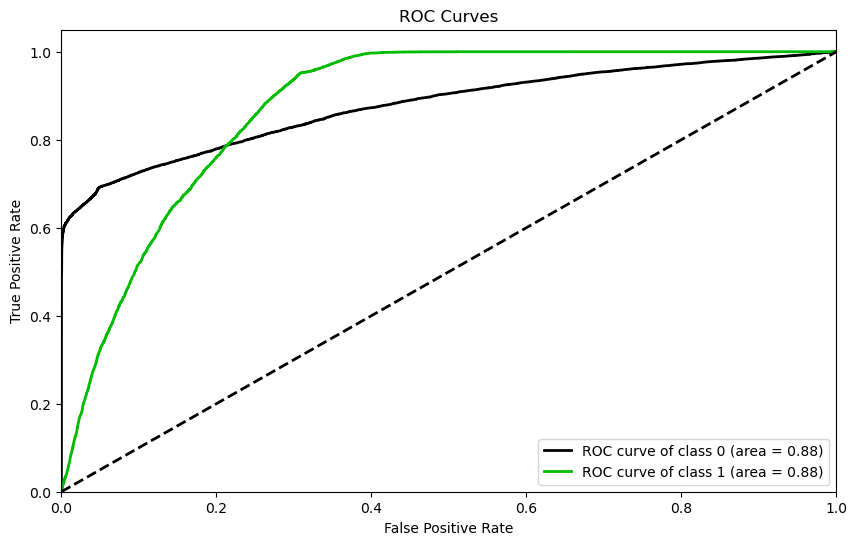

In [50]:
# Инициализация и обучение модели
SVC_classifier = SupportVectorMachineClassifier()
SVC_classifier.fit(Train_X_num, Train_Y_num)

# Предсказание на тестовой выборке
pred_SVC = SVC_classifier.predict(Test_X_num)

# Проверка вероятностей (predict_proba)
proba_SVC = SVC_classifier.predict_proba(Test_X_num)

Classification_Summary(pred_SVC, proba_SVC, 5)

---

## 7. K-Nearest Neighbours Classfier:

<<<------------------------- K Nearest Neighbours (KNN) ------------------------->>>

Accuracy = 85.0%
F1 Score = 85.0%

 Confusiton Matrix:
 [[14302  4159]
 [ 1331 16888]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.84     18461
           1       0.80      0.93      0.86     18219

    accuracy                           0.85     36680
   macro avg       0.86      0.85      0.85     36680
weighted avg       0.86      0.85      0.85     36680



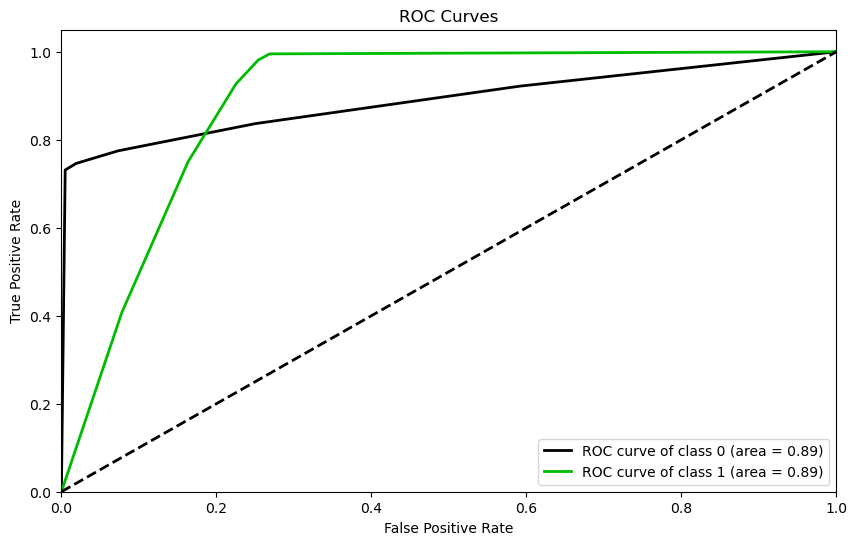

In [51]:
# Построение классификатора соседей K-Neareset

KNN_model = KNeighborsClassifier()

# knn_param = {"n_neighbors": [i for i in range(1,30,5)],
#              "weights": ["uniform", "distance"],
#              "algorithm": ["ball_tree", "kd_tree", "brute"],
#              "leaf_size": [1, 10, 30],
#              "p": [1,2]}

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)
# RCV.fit(Train_X_std, Train_Y)
# print(RCV.best_params_)

KNN = KNN_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred, pred_prob, 6)

---

## 8. Gradient Boosting Classfier:

<<<------------------------- Gradient Boosting (GB) ------------------------->>>

Accuracy = 86.6%
F1 Score = 86.4%

 Confusiton Matrix:
 [[13705  4756]
 [  162 18057]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85     18461
           1       0.79      0.99      0.88     18219

    accuracy                           0.87     36680
   macro avg       0.89      0.87      0.86     36680
weighted avg       0.89      0.87      0.86     36680



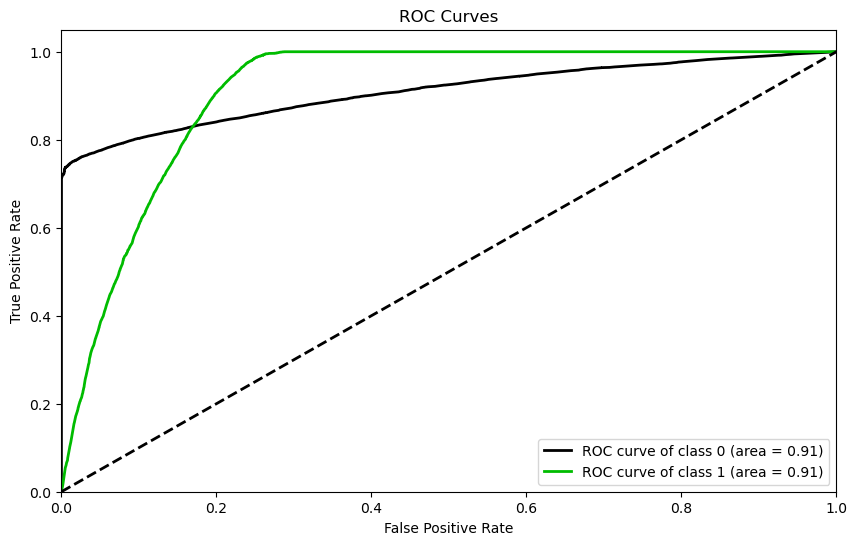

In [52]:
# Построение классификатора повышения градиента

GB_model = GradientBoostingClassifier()

# param_dist = {
#     "n_estimators":[5,20,100,500],
#     "max_depth":[1,3,5,7,9],
#     "learning_rate":[0.01,0.1,1,10,100]
# }

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)
# RCV.fit(Train_X_std, Train_Y)
# print(RCV.best_params_)

GB = GB_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred, pred_prob, 7)

---

## 9. Extreme Gradient Boosting Classfier:

<<<------------------------- Extreme Gradient Boosting (XGB) ------------------------->>>

Accuracy = 86.7%
F1 Score = 86.6%

 Confusiton Matrix:
 [[13843  4618]
 [  247 17972]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85     18461
           1       0.80      0.99      0.88     18219

    accuracy                           0.87     36680
   macro avg       0.89      0.87      0.87     36680
weighted avg       0.89      0.87      0.87     36680



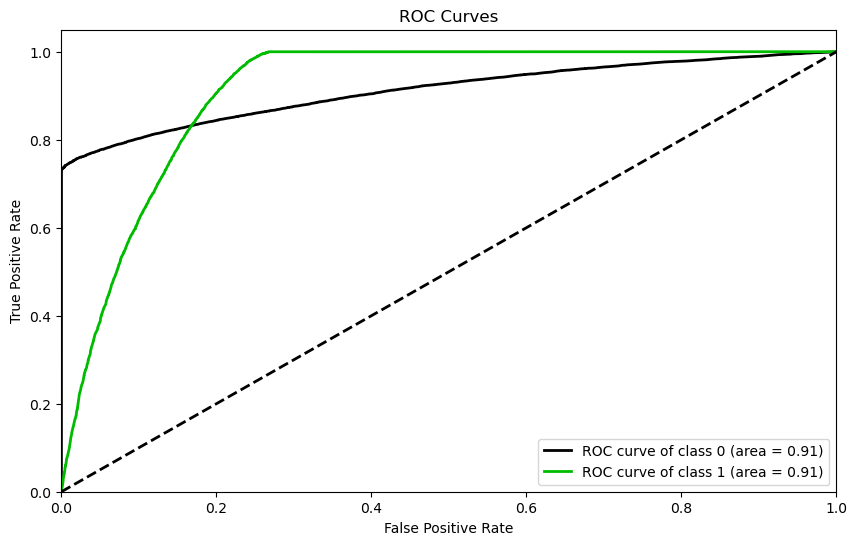

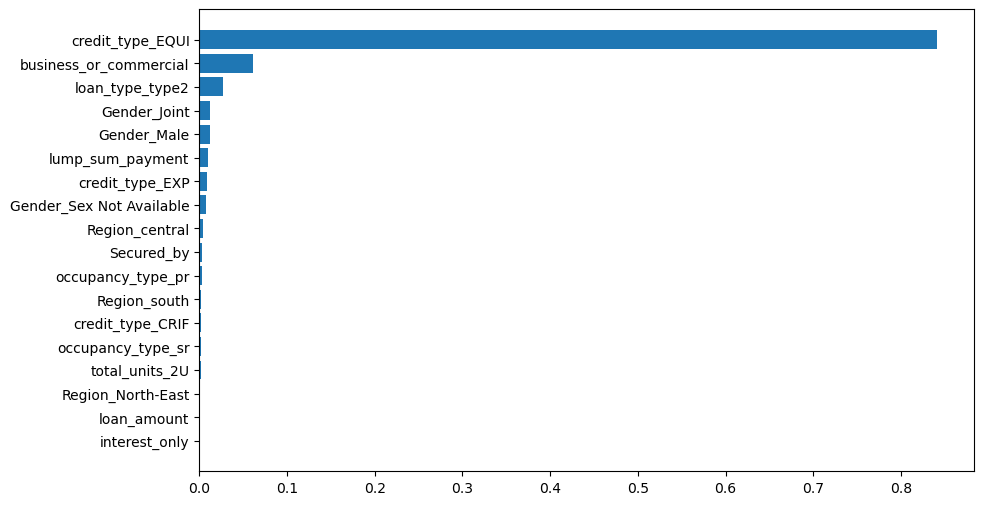

In [53]:
# Создание классификатора экстремального повышения градиента

XGB_model = XGBClassifier()#.fit(Train_X_std, Train_Y, eval_metric='logloss')

# param_dist = {
#     "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
#     "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
#     "min_child_weight" : [ 1, 3, 5, 7 ],
#     "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
# }

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

XGB = XGB_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred, pred_prob, 8)

xgbf=pd.DataFrame(XGB.feature_importances_, index=Train_X_std.columns).sort_values(by=0)
plt.barh(xgbf.index,xgbf.values[:,0])
plt.show()

## 10. BaggingClassifier

<<<------------------------- BaggingClassifier (BC) ------------------------->>>

Accuracy = 86.7%
F1 Score = 86.5%

 Confusiton Matrix:
 [[13912  4549]
 [  346 17873]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85     18461
           1       0.80      0.98      0.88     18219

    accuracy                           0.87     36680
   macro avg       0.89      0.87      0.86     36680
weighted avg       0.89      0.87      0.86     36680



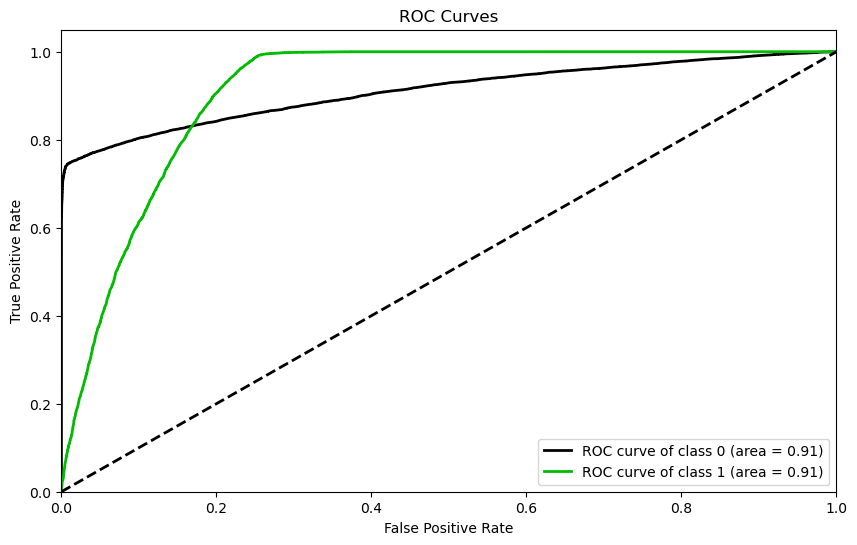

In [54]:
# Создаём BaggingClassifier с деревьями решений
BC_model = BaggingClassifier( # n_estimators=100, max_samples=0.9, max_features=0.7, bootstrap=True, random_state=42, oob_score=True
    estimator=DecisionTreeClassifier(),  # Базовая модель (дерево решений)
    n_estimators=1000,  # Количество моделей в ансамбле
    max_samples=0.9,   # Доля данных для каждой модели (80%)
    max_features=0.7,  # Доля признаков для каждой модели (100%)
    bootstrap=True,    # Разрешаем выборку с повторениями
    random_state=42,
    oob_score=True
)

# param_dist = {
#     'n_estimators': np.arange(1, 30, 5),  # Количество моделей в ансамбле
#     'max_samples': [ 0.5, 0.7, 0.8, 1.0],  # Доля данных для каждой модели (80%)
#     'max_features': [ 0.5, 0.7, 1.0],  # Доля признаков для каждой модели (100%)
#     'bootstrap': [True, False],  # Разрешаем выборку с повторениями
#     'oob_score': [True, False]
# }

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# RCV = RandomizedSearchCV(BC_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)
# RCV.fit(Train_X_std, Train_Y)
# print(RCV.best_params_)

BC = BC_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = BC.predict(Test_X_std)
pred_prob = BC.predict_proba(Test_X_std)
Classification_Summary(pred, pred_prob, 9)

## 11. MLP

<<<------------------------- MLPClassifier (MLP) ------------------------->>>

Accuracy = 86.7%
F1 Score = 86.5%

 Confusiton Matrix:
 [[13826  4635]
 [  246 17973]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85     18461
           1       0.79      0.99      0.88     18219

    accuracy                           0.87     36680
   macro avg       0.89      0.87      0.87     36680
weighted avg       0.89      0.87      0.87     36680



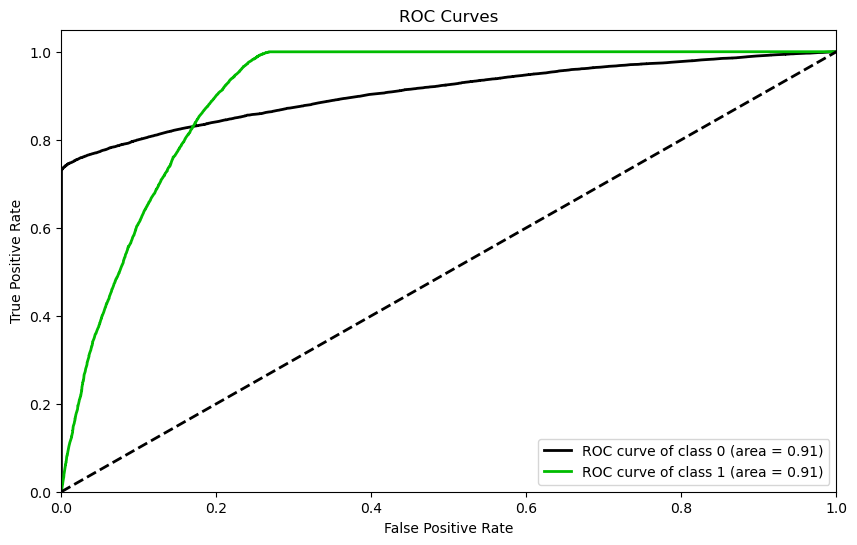

In [55]:
from sklearn.neural_network import MLPClassifier

NN_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         activation='relu',
                         batch_size=32,
                         hidden_layer_sizes=(100,),
                         max_iter=300,
                         random_state=42)

NN_model.fit(Train_X_std, Train_Y)

pred = NN_model.predict(Test_X_std)
pred_prob = NN_model.predict_proba(Test_X_std)
Classification_Summary(pred, pred_prob, 10)

# Результаты

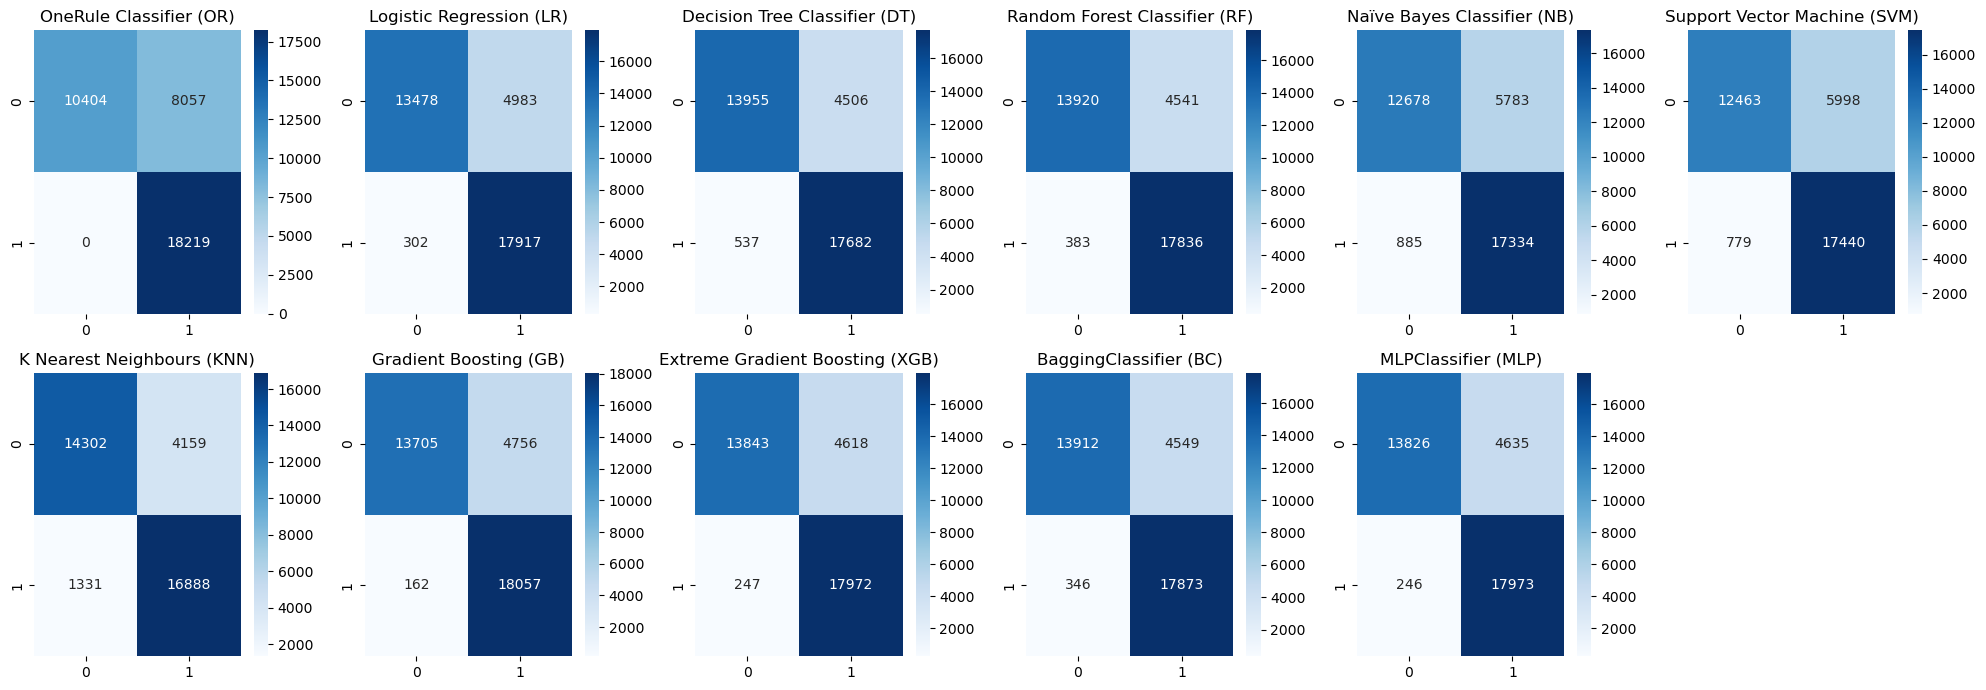

In [56]:
#Построение матрицы путаницы для всех прогнозных моделей
labels = ['Defaulter','Not-Defaulter']

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns = labels
    cm.index = labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20, 3.5 * math.ceil(len(all_models) * len(labels) / 14)])
    
    for i in range(len(all_models)):
        if len(labels) <= 4:
            plt.subplot(2, 6, i + 1)
        else:
            plt.subplot(math.ceil(len(all_models) / 3), 3, i + 1)
        pred = all_models[i].predict(Test_X_num)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='Blues', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([OR_classifier, LR_model, DT_model, 
               RF_model, NB_model, 
               SVC_classifier, KNN_model,
                GB_model, XGB_model, 
                BC_model, NN_model
])

                                    Сравнение алгоритмов ML                                     


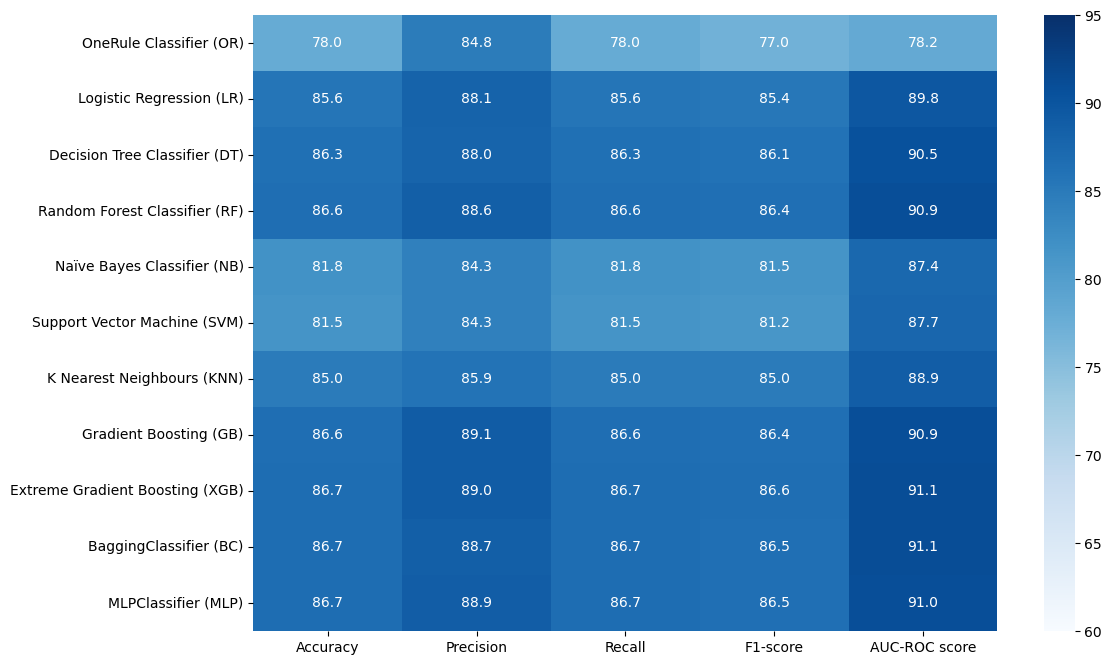

In [57]:
#Сравнение результатов всех моделей

print('\033[1mСравнение алгоритмов ML'.center(100))
plt.figure(figsize=[12,8])
sns.heatmap(Evaluation_Results, annot=True, vmin=60, vmax=95, cmap='Blues', fmt='.1f')
plt.show()

**Выводы:** для текущей задачи важнее сосредоточиться на показателе F1. Из приведённой выше тепловой карты можно заметить, что модели Boosting и RandomForest хорошо работают с текущим набором данных...

---

# <center> Результаты и выводы проекта

В рамках данного проекта была проведена комплексная работа по анализу, обработке и моделированию данных для предсказания риска дефолта заемщиков. Основные этапы и результаты исследования:

**Анализ данных:**

Проведен разведывательный анализ данных (EDA), который выявил ключевые закономерности, такие как:
Мужчины и совместные заемщики чаще берут кредиты, но также чаще допускают дефолты.
Кредиты без предварительного одобрения и с меньшими суммами чаще связаны с дефолтами.
Возраст заемщика (35–64 года) и его доход ($3000–$6000) являются важными факторами, влияющими на возвратность кредита.
Целевая переменная (Status) оказалась несбалансированной, что потребовало применения методов балансировки.
Предварительная обработка данных:

Были исправлены опечатки, удалены дубликаты и выбросы, а также заполнены пропущенные значения.

Для устранения дисбаланса классов применен метод SMOTE, который увеличил количество записей в меньшем классе.

Категориальные признаки были преобразованы в числовые с использованием методов One-Hot Encoding и бинарного кодирования.
Извлечение признаков:

Проведен анализ мультиколлинеарности с использованием VIF, RFE и PCA.

Удаление мультиколлинеарных признаков улучшило качество моделей, а использование PCA позволило сократить размерность данных, сохранив 90% объясненной дисперсии.
Моделирование:

Были протестированы различные алгоритмы классификации, включая логистическую регрессию, случайный лес, градиентный бустинг, XGBoost и другие.

Наилучшие результаты показали модели XGBoost и Random Forest, которые продемонстрировали высокие значения F1-метрики и AUC-ROC.
Логистическая регрессия, хотя и уступала по точности, показала себя как более интерпретируемая и вычислительно эффективная модель.

**Ключевые результаты:**

Модели XGBoost и Random Forest показали наилучшие результаты, что делает их предпочтительными для данной задачи.
Логистическая регрессия может быть использована как более простая альтернатива для интерпретации результатов.